# CREDIT EDA ASSIGNMENT

## Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected. When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision: 
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company. 

## Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study. In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

We have 2 datasets as explained below:

'application_data.csv' contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.

'previous_application.csv' contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.

## Reading and Understanding the Data

We will start by importing necessary libraries and reading the datasets.

In [132]:
#import the useful libraries.
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [133]:
application_data = pd.read_csv('application_data (4).csv')
application_data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                     0                        0.0                       0.0   
1                     0                        0.0                       0.0   
2                     0                        0.0                       0.0   
3                     0                        NaN                       NaN   
4                     0                        0.0                       0.0   
...                 ...                        ...                       ...   
307506                0                        NaN                       NaN   
307507                0                        NaN                       NaN   
307508                0                        1.0                       0.0   
307509                0                        0.0                       0.0   
307510                0                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                              0.0                        0.0   
1                              0.0                        0.0   
2                              0.0                        0.0   
3                              NaN                        NaN   
4                              

In [134]:
application_data.columns.to_list()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

In [135]:
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [136]:
application_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [137]:
application_data.isnull().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

**List columns with more than 40% missing values**

In [138]:
cols_40_percent_missing_values = application_data.columns[application_data.isnull().mean()*100>=40]
cols_40_percent_missing_values

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FO

In [139]:
# Delete the columns having more than 40% missing values

application_data = application_data.drop(cols_40_percent_missing_values,axis=1)
application_data.shape

(307511, 73)

**Changing Column Names for Better Understanding**

In [140]:
new_columns = ["Loan_ID","FLAG_Defalter","Loan_Type","Gender","Own_Car","Own_House","Client_Children","Annual_Income","Credit_Loan_Amount","Loan_Annuity","Goods_Price","Accompany_client","Client_Profession","Client_Education","Client_Marital_Status","Client_House_Status","Client_region_population","Client_age_in_days_time_of_application","Employment_days_at_time_of_application","DAYS_REGISTRATION","DAYS_ID_PUBLISH","FLAG_MOBILE_1_YES_0_NO","FLAG_EMP_PHONE_1_YES_0_NO","FLAG_HOME_PHONE_1_YES_0_NO","FLAG_CONT_MOBILE_1_YES_0_NO","FLAG_PHONE_1_YES_0_NO","FLAG_EMAIL_1_YES_0_NO","OCCUPATION_TYPE","Client_Family_Members","Client_Region_Rating","Client_Region_&_City_Rating","Day_of_Application","Hour_of_Application","FLAG_Client_Permanent_address_not_match_Contact_address_region","FLAG_Client_Permanent_address_not_match_work_address_region","FLAG_Client_Contact_address_not_match_work_address_region","FLAG_Client_Permanent_address_not_match_Contact_address_city","FLAG_Client_Permanent_address_not_match_work_address_city","FLAG_Client_Contact_address_not_match_work_address_city","Client_Organization_type","Client_Normalized_Score_External_Source_2","Client_Normalized_Score_External_Source_3","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]
application_data.columns = new_columns
application_data.head()

Loan_ID  FLAG_Defalter        Loan_Type Gender Own_Car Own_House  \
0   100002              1       Cash loans      M       N         Y   
1   100003              0       Cash loans      F       N         N   
2   100004              0  Revolving loans      M       Y         Y   
3   100006              0       Cash loans      F       N         Y   
4   100007              0       Cash loans      M       N         Y   

   Client_Children  Annual_Income  Credit_Loan_Amount  Loan_Annuity  ...  \
0                0       202500.0            406597.5       24700.5  ...   
1                0       270000.0           1293502.5       35698.5  ...   
2                0        67500.0            135000.0        6750.0  ...   
3                0       135000.0            312682.5       29686.5  ...   
4                0       121500.0            513000.0       21865.5  ...   

   FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0                 0                0                0                0   
1                 0                0                0                0   
2                 0                0                0                0   
3                 0                0                0                0   
4                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 73 columns]

In [141]:
application_data.shape

(307511, 73)

In [142]:
application_data.isnull().mean()*100

Loan_ID                        0.000000
FLAG_Defalter                  0.000000
Loan_Type                      0.000000
Gender                         0.000000
Own_Car                        0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 73, dtype: float64

### TREATMENT OF UNKNOWN VALUES

In [143]:
application_data.columns[application_data.dtypes == "object"]

Index(['Loan_Type', 'Gender', 'Own_Car', 'Own_House', 'Accompany_client',
       'Client_Profession', 'Client_Education', 'Client_Marital_Status',
       'Client_House_Status', 'OCCUPATION_TYPE', 'Day_of_Application',
       'Client_Organization_type'],
      dtype='object')

In [144]:
#Finding the value counts for each Catagorical columns

for i in application_data.columns[application_data.dtypes == "object"]:
     print((application_data[i].value_counts()))

Loan_Type
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64
Gender
F      202448
M      105059
XNA         4
Name: count, dtype: int64
Own_Car
N    202924
Y    104587
Name: count, dtype: int64
Own_House
Y    213312
N     94199
Name: count, dtype: int64
Accompany_client
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64
Client_Profession
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: count, dtype: int64
Client_Education
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree          

In [145]:
#Finding columns with "XNA", "XNA" "Unknown" values

for i in application_data.columns:
    if application_data[i].isin(["XNA", "Unknown"]).any():
        print(i)

Gender
Client_Marital_Status
Client_Organization_type


**Replacing the "XNA" and "unknown" values with high value counts or mode**

In [146]:
application_data["Gender"].replace("XNA", "F",inplace=True)
application_data["Gender"].value_counts()

Gender
F    202452
M    105059
Name: count, dtype: int64

In [147]:
application_data["Client_Marital_Status"].replace("Unknown", "Married",inplace=True)
application_data["Client_Marital_Status"].value_counts()

Client_Marital_Status
Married                 196434
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: count, dtype: int64

In [148]:
application_data["Client_Organization_type"].value_counts()

Client_Organization_type
Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 

**As observed, the category "XNA" appears 55,374 times, making it the second most frequent value in the dataset. Therefore, it would not be logical to substitute these values with the mode or treat them as missing data. If "XNA" truly represents an unknown category rather than missing information, it may hold meaningful insights, and thus, it is reasonable to retain it as a separate category.**

### TREATMENT OF MISSING VALUES

In [149]:
#Columns with Null Values
columns_with_null_values = application_data.columns[application_data.isnull().sum() != 0]
columns_with_null_values

Index(['Loan_Annuity', 'Goods_Price', 'Accompany_client', 'OCCUPATION_TYPE',
       'Client_Family_Members', 'Client_Normalized_Score_External_Source_2',
       'Client_Normalized_Score_External_Source_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [150]:
#Columns with String Values
string_columns = application_data.columns[application_data.dtypes == "object"]
string_columns

Index(['Loan_Type', 'Gender', 'Own_Car', 'Own_House', 'Accompany_client',
       'Client_Profession', 'Client_Education', 'Client_Marital_Status',
       'Client_House_Status', 'OCCUPATION_TYPE', 'Day_of_Application',
       'Client_Organization_type'],
      dtype='object')

In [151]:
#Columns with numeric Values
numeric_columns = application_data.columns[application_data.dtypes != "object"]
numeric_columns

Index(['Loan_ID', 'FLAG_Defalter', 'Client_Children', 'Annual_Income',
       'Credit_Loan_Amount', 'Loan_Annuity', 'Goods_Price',
       'Client_region_population', 'Client_age_in_days_time_of_application',
       'Employment_days_at_time_of_application', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_MOBILE_1_YES_0_NO',
       'FLAG_EMP_PHONE_1_YES_0_NO', 'FLAG_HOME_PHONE_1_YES_0_NO',
       'FLAG_CONT_MOBILE_1_YES_0_NO', 'FLAG_PHONE_1_YES_0_NO',
       'FLAG_EMAIL_1_YES_0_NO', 'Client_Family_Members',
       'Client_Region_Rating', 'Client_Region_&_City_Rating',
       'Hour_of_Application',
       'FLAG_Client_Permanent_address_not_match_Contact_address_region',
       'FLAG_Client_Permanent_address_not_match_work_address_region',
       'FLAG_Client_Contact_address_not_match_work_address_region',
       'FLAG_Client_Permanent_address_not_match_Contact_address_city',
       'FLAG_Client_Permanent_address_not_match_work_address_city',
       'FLAG_Client_Contact_address_not_ma

**Replacing missing values with modes for categorical values**

In [152]:
#Categorical columns to fill the null values
intersection = list(set(string_columns) & set(columns_with_null_values))
intersection

['Accompany_client', 'OCCUPATION_TYPE']

In [153]:
application_data['Accompany_client'].value_counts()

Accompany_client
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [154]:
application_data['Accompany_client'].isnull().sum()

np.int64(1292)

In [155]:
#replacing the missing values of column 'Accompany_client' with 'Unaccompanied'
mode = application_data['Accompany_client'].mode()[0]
application_data['Accompany_client'] = application_data['Accompany_client'].fillna(mode)
application_data['Accompany_client'].isnull().sum()

np.int64(0)

In [156]:
application_data['OCCUPATION_TYPE'].value_counts()/len(application_data)*100

OCCUPATION_TYPE
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: count, dtype: float64

In [157]:
application_data['OCCUPATION_TYPE'].isnull().sum()

np.int64(96391)

In [158]:
application_data['OCCUPATION_TYPE'].isnull().sum()/len(application_data)*100

np.float64(31.345545362604916)

**It is observed that the OCCUPATION_TYPE column in df_application_data contains 96,391 null values, which is a considerably large proportion of the data. Replacing these missing values with the mode could introduce bias into the analysis. Therefore, it is more appropriate to replace them with a distinct category, such as "Unknown", to preserve data integrity and avoid skewing the distribution.**

In [159]:
application_data['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

In [160]:
application_data['OCCUPATION_TYPE'].isnull().sum()

np.int64(0)

**REPLACING MISSING VALUES WITH MEAN OR MEDIAN FOR NUMERIC COLUMNS**

In [161]:
#Numerical columns to fill the null values
intersection1 = list(set(numeric_columns) & set(columns_with_null_values))
intersection1

['DEF_30_CNT_SOCIAL_CIRCLE',
 'Client_Normalized_Score_External_Source_2',
 'Client_Normalized_Score_External_Source_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'Loan_Annuity',
 'Client_Family_Members',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'Goods_Price',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_QRT']

In [162]:
# List of columns you want to plot
columns_to_plot = [
    'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'Client_Family_Members',
 'Client_Normalized_Score_External_Source_2',
 'Client_Normalized_Score_External_Source_3',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'Loan_Annuity',
 'DAYS_LAST_PHONE_CHANGE',
 'Goods_Price',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

# Create subplots: 4 rows, 4 columns (adjust based on the number of columns)
fig, axes = plt.subplots(4, 4, figsize=(20, 15))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through the columns and plot box plots
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=application_data[col], ax=axes[i])  # Create box plot
    axes[i].set_title(col)  # Set title to the column name

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

**Based on the box plot analysis, we observe that only the columns Client_Normalized_Score_External_Source_2 and Client_Normalized_Score_External_Source_3 show no outliers, making the mean an appropriate choice for imputing their missing values. For all other columns that contain outliers, we choose to replace the missing values with the median, as it is less affected by extreme values and provides a more reliable measure of central tendency in such cases.**

In [163]:
#Replacing the columns with outliers with median

col =[
    'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'Client_Family_Members',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'Loan_Annuity',
 'DAYS_LAST_PHONE_CHANGE',
 'Goods_Price',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

for i in col:
    med=application_data[i].median()
    application_data[i] = application_data[i].fillna(med)

In [164]:
application_data['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

np.int64(0)

In [165]:
#Replacing the columns without outliers with mean

col1 = [ "Client_Normalized_Score_External_Source_2", "Client_Normalized_Score_External_Source_3"]

for i in col1:
    mean=application_data[i].mean()
    application_data[i] = application_data[i].fillna(mean)

In [166]:
#Random checking if the values are filled

application_data["Client_Normalized_Score_External_Source_3"].isnull().sum()

np.int64(0)

In [167]:
#Checking if all the values have been filled with values
application_data.isnull().sum()

Loan_ID                       0
FLAG_Defalter                 0
Loan_Type                     0
Gender                        0
Own_Car                       0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 73, dtype: int64

In [168]:
application_data.columns.to_list()

['Loan_ID',
 'FLAG_Defalter',
 'Loan_Type',
 'Gender',
 'Own_Car',
 'Own_House',
 'Client_Children',
 'Annual_Income',
 'Credit_Loan_Amount',
 'Loan_Annuity',
 'Goods_Price',
 'Accompany_client',
 'Client_Profession',
 'Client_Education',
 'Client_Marital_Status',
 'Client_House_Status',
 'Client_region_population',
 'Client_age_in_days_time_of_application',
 'Employment_days_at_time_of_application',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBILE_1_YES_0_NO',
 'FLAG_EMP_PHONE_1_YES_0_NO',
 'FLAG_HOME_PHONE_1_YES_0_NO',
 'FLAG_CONT_MOBILE_1_YES_0_NO',
 'FLAG_PHONE_1_YES_0_NO',
 'FLAG_EMAIL_1_YES_0_NO',
 'OCCUPATION_TYPE',
 'Client_Family_Members',
 'Client_Region_Rating',
 'Client_Region_&_City_Rating',
 'Day_of_Application',
 'Hour_of_Application',
 'FLAG_Client_Permanent_address_not_match_Contact_address_region',
 'FLAG_Client_Permanent_address_not_match_work_address_region',
 'FLAG_Client_Contact_address_not_match_work_address_region',
 'FLAG_Client_Permanent_address_not_mat

**Converting "Client_age_in_days_time_of_application" column into "AGE" for readability and analysis**

In [169]:
application_data["Client_age_in_days_time_of_application"].head()

0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: Client_age_in_days_time_of_application, dtype: int64

In [170]:
application_data["Age"] = abs(application_data["Client_age_in_days_time_of_application"]//365)

# Drop 'Client_age_in_days_time_of_application' column
application_data.drop(["Client_age_in_days_time_of_application"], axis = 1, inplace = True)
application_data.head()

Loan_ID  FLAG_Defalter        Loan_Type Gender Own_Car Own_House  \
0   100002              1       Cash loans      M       N         Y   
1   100003              0       Cash loans      F       N         N   
2   100004              0  Revolving loans      M       Y         Y   
3   100006              0       Cash loans      F       N         Y   
4   100007              0       Cash loans      M       N         Y   

   Client_Children  Annual_Income  Credit_Loan_Amount  Loan_Annuity  ...  \
0                0       202500.0            406597.5       24700.5  ...   
1                0       270000.0           1293502.5       35698.5  ...   
2                0        67500.0            135000.0        6750.0  ...   
3                0       135000.0            312682.5       29686.5  ...   
4                0       121500.0            513000.0       21865.5  ...   

   FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0                 0                0                0   
1                 0                0                0   
2                 0                0                0   
3                 0                0                0   
4                 0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  Age  
0                        0.0                         1.0   26  
1                        0.0                         0.0   46  
2                        0.0                         0.0   53  
3                        0.0                         1.0   53  
4                        0.0                         0.0   55  

[5 rows x 73 columns]

**Converting 'Employment_days_at_time_of_application' column into "YEARS_EMPLOYED" for readablity and analysis**

In [171]:
application_data["Employment_days_at_time_of_application"].value_counts()

Employment_days_at_time_of_application
 365243    55374
-200         156
-224         152
-230         151
-199         151
           ...  
-11471         1
-12878         1
-10573         1
-12990         1
-14184         1
Name: count, Length: 12574, dtype: int64

**We observe an anomaly in the dataset where all employment day values are negative, except for 55,374 instances with the value 365243, which is both unusually large and positive. This pattern suggests a possible clerical error in the data. Therefore, we will treat the value 365243 as missing by replacing it with NaN, and subsequently impute the missing values using the median if the column contains outliers, or the mean if no outliers are present.**

In [172]:
application_data["Employment_days_at_time_of_application"].replace(365243, np.nan, inplace = True)

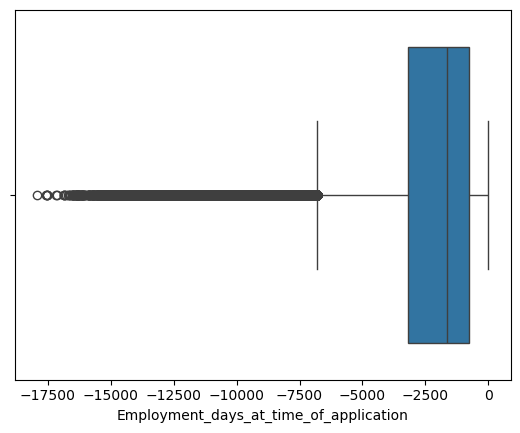

In [173]:
sns.boxplot(x=application_data["Employment_days_at_time_of_application"])
plt.show()

In [174]:
application_data["Employment_days_at_time_of_application"].isnull().sum()

np.int64(55374)

**We observe that there are outliers in the column, we will replace the null values with median**

In [175]:
#Replacing null values with median
median = application_data["Employment_days_at_time_of_application"].median()
application_data["Employment_days_at_time_of_application"].fillna(median, inplace = True)
application_data["Employment_days_at_time_of_application"].isnull().sum()

np.int64(0)

In [176]:
# Divide 'Employment_days_at_time_of_application' by 365 for "YEAR_EMPLOYED"
application_data['YEARS_EMPLOYED'] = abs(application_data['Employment_days_at_time_of_application']//365)

# Drop 'Employment_days_at_time_of_application' column
application_data.drop(['Employment_days_at_time_of_application'], axis = 1, inplace = True)

application_data.head()

Loan_ID  FLAG_Defalter        Loan_Type Gender Own_Car Own_House  \
0   100002              1       Cash loans      M       N         Y   
1   100003              0       Cash loans      F       N         N   
2   100004              0  Revolving loans      M       Y         Y   
3   100006              0       Cash loans      F       N         Y   
4   100007              0       Cash loans      M       N         Y   

   Client_Children  Annual_Income  Credit_Loan_Amount  Loan_Annuity  ...  \
0                0       202500.0            406597.5       24700.5  ...   
1                0       270000.0           1293502.5       35698.5  ...   
2                0        67500.0            135000.0        6750.0  ...   
3                0       135000.0            312682.5       29686.5  ...   
4                0       121500.0            513000.0       21865.5  ...   

   FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                 0                0                        0.0   
1                 0                0                        0.0   
2                 0                0                        0.0   
3                 0                0                        0.0   
4                 0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                        0.0   
4                       0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  Age  YEARS_EMPLOYED  
0                         1.0   26             2.0  
1                         0.0   46             4.0  
2                         0.0   53             1.0  
3                         1.0   53             9.0  
4                         0.0   55             9.0  

[5 rows x 73 columns]

### Outlier Treatment Capping and Flooring

In [177]:
#Outlier treatment is only done in numeric columns only
updated_numeric_col = application_data.columns[application_data.dtypes != ("object")]
updated_numeric_col

Index(['Loan_ID', 'FLAG_Defalter', 'Client_Children', 'Annual_Income',
       'Credit_Loan_Amount', 'Loan_Annuity', 'Goods_Price',
       'Client_region_population', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_MOBILE_1_YES_0_NO', 'FLAG_EMP_PHONE_1_YES_0_NO',
       'FLAG_HOME_PHONE_1_YES_0_NO', 'FLAG_CONT_MOBILE_1_YES_0_NO',
       'FLAG_PHONE_1_YES_0_NO', 'FLAG_EMAIL_1_YES_0_NO',
       'Client_Family_Members', 'Client_Region_Rating',
       'Client_Region_&_City_Rating', 'Hour_of_Application',
       'FLAG_Client_Permanent_address_not_match_Contact_address_region',
       'FLAG_Client_Permanent_address_not_match_work_address_region',
       'FLAG_Client_Contact_address_not_match_work_address_region',
       'FLAG_Client_Permanent_address_not_match_Contact_address_city',
       'FLAG_Client_Permanent_address_not_match_work_address_city',
       'FLAG_Client_Contact_address_not_match_work_address_city',
       'Client_Normalized_Score_External_Source_2',
       'Client_Normali

In [178]:
#We don't need to do outlier treatment for binary (0/1) indicators or categorical flags
numeric_col_without_flag = []
for col in updated_numeric_col:
    if "flag" not in col.lower():
        numeric_col_without_flag.append(col)

numeric_col_without_flag

['Loan_ID',
 'Client_Children',
 'Annual_Income',
 'Credit_Loan_Amount',
 'Loan_Annuity',
 'Goods_Price',
 'Client_region_population',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'Client_Family_Members',
 'Client_Region_Rating',
 'Client_Region_&_City_Rating',
 'Hour_of_Application',
 'Client_Normalized_Score_External_Source_2',
 'Client_Normalized_Score_External_Source_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'Age',
 'YEARS_EMPLOYED']

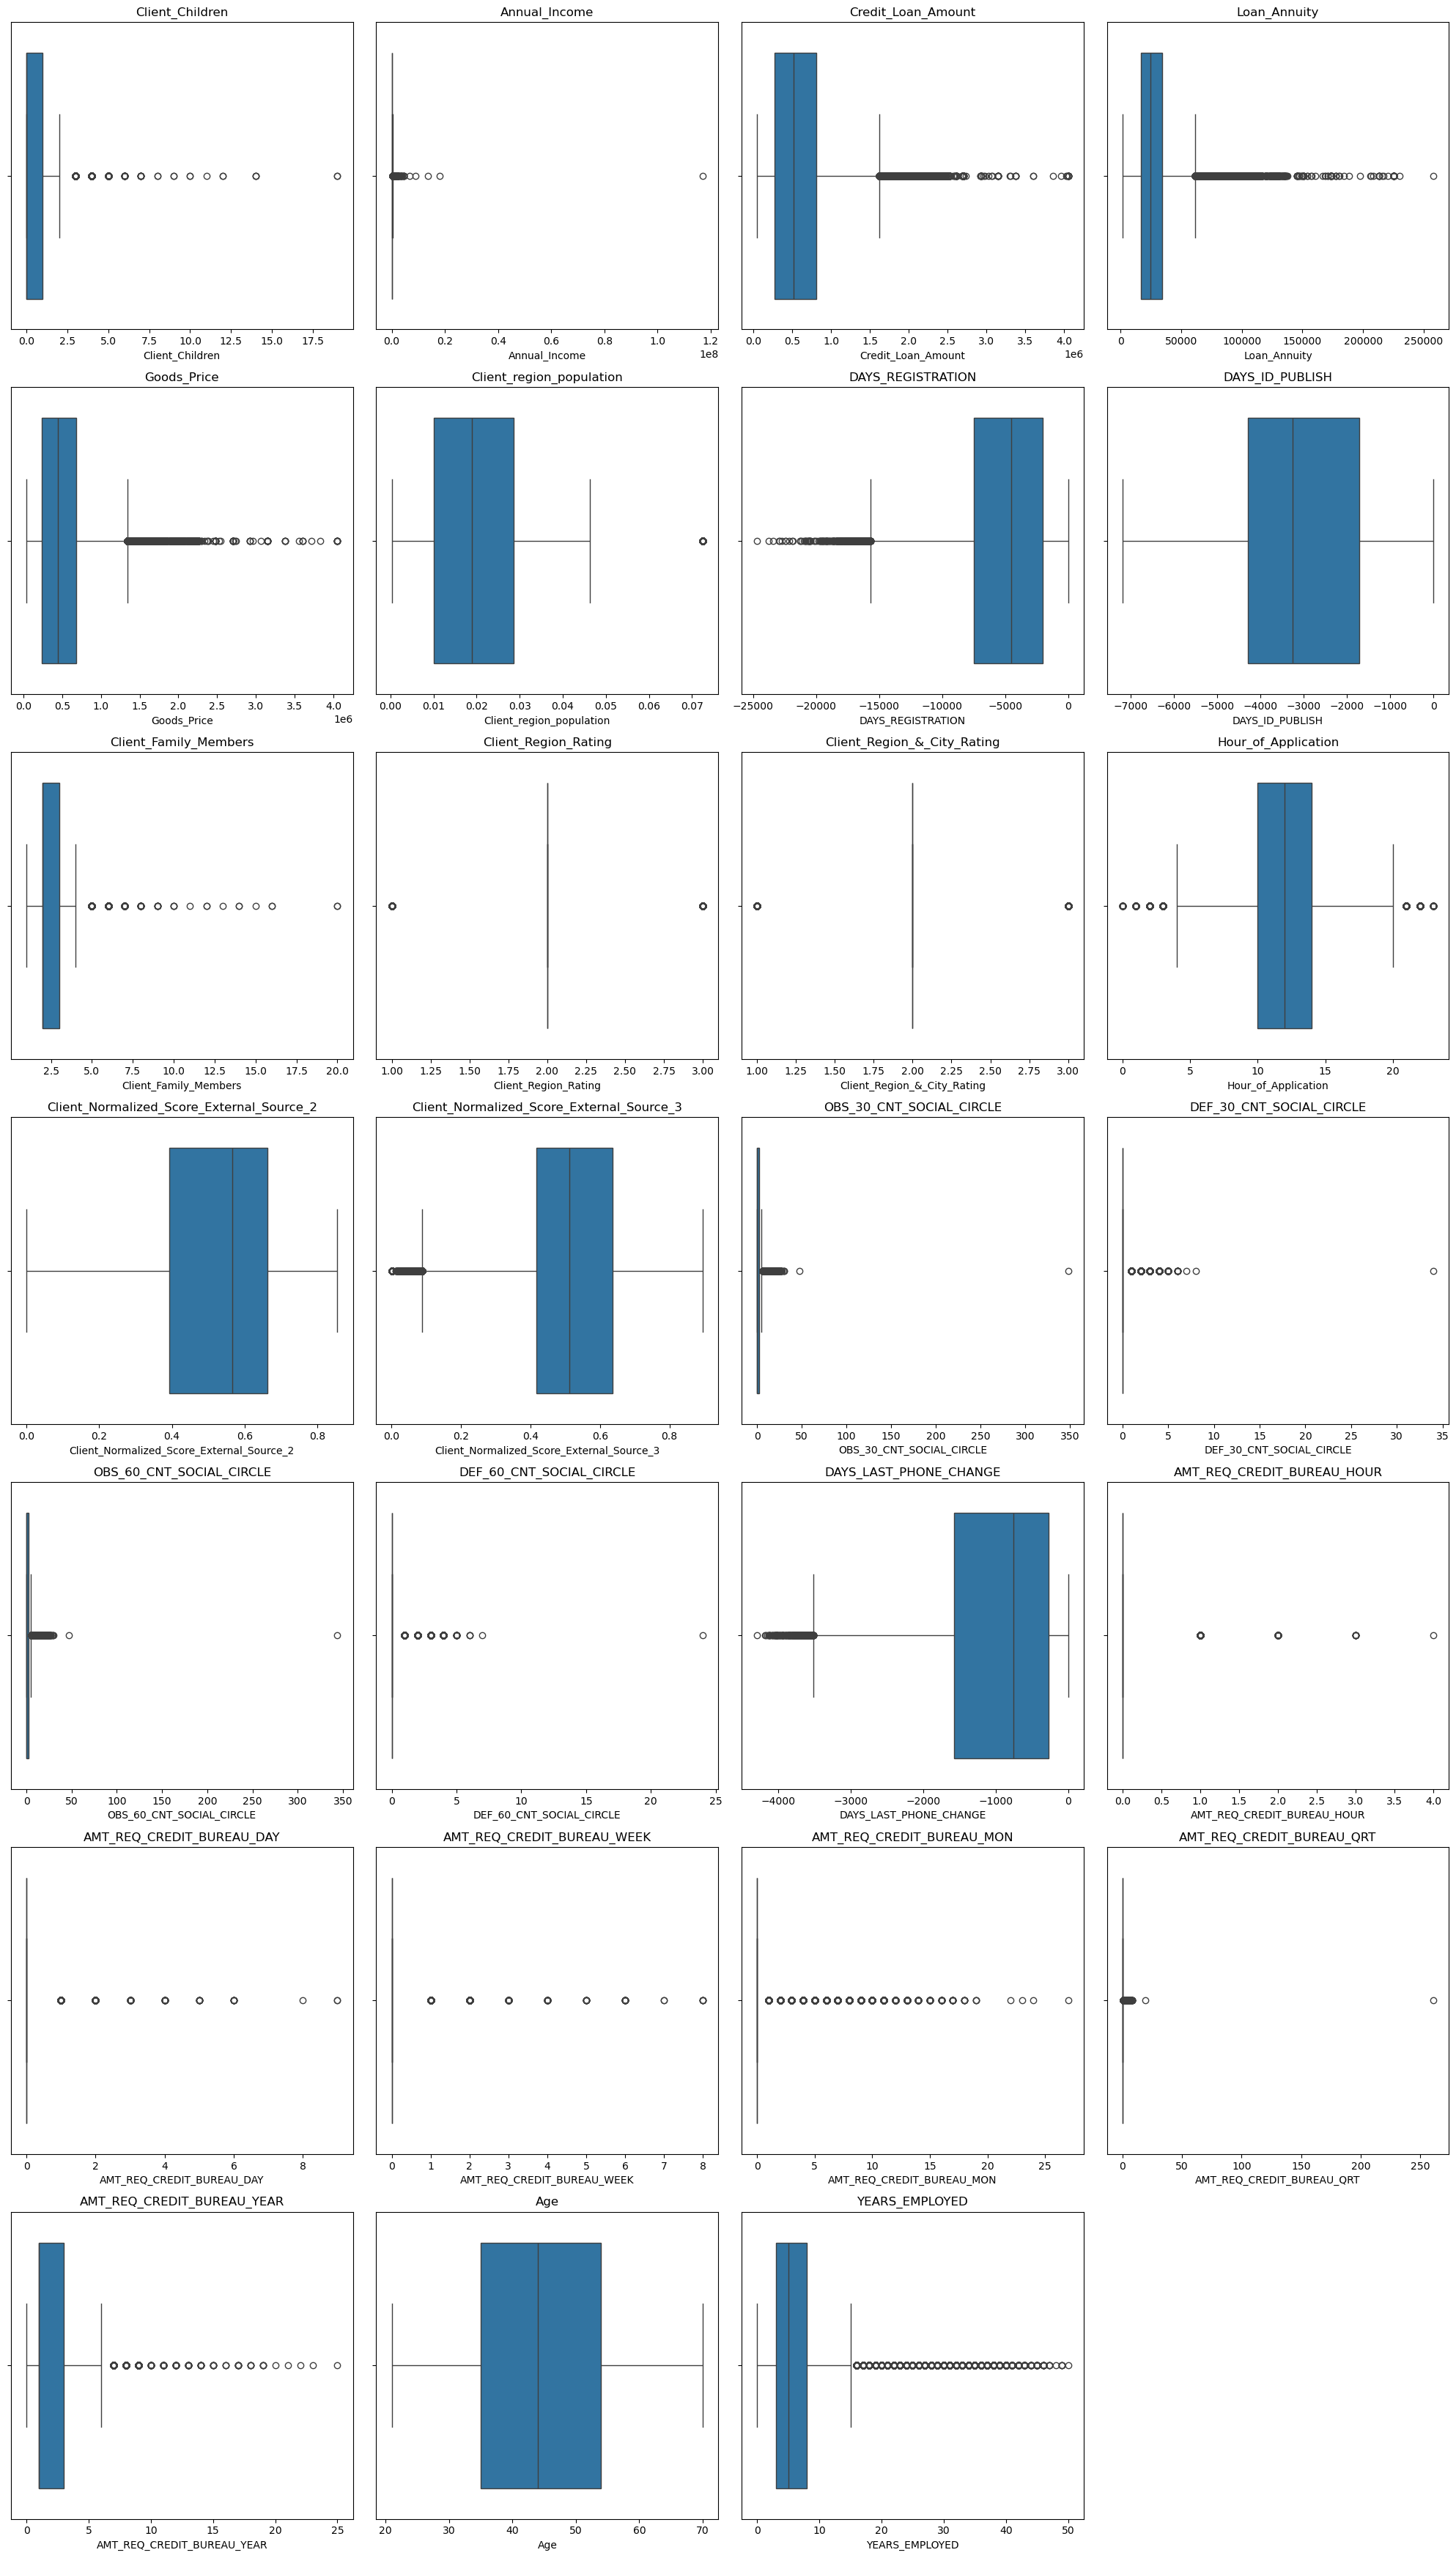

In [179]:
#Also, the loan_ID was irrevant, finding outliers using data visualization i.e., box plot

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define columns to plot
columns_to_plot = [
    'Client_Children', 'Annual_Income', 'Credit_Loan_Amount', 'Loan_Annuity',
    'Goods_Price', 'Client_region_population', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
    'Client_Family_Members', 'Client_Region_Rating', 'Client_Region_&_City_Rating', 
    'Hour_of_Application', 'Client_Normalized_Score_External_Source_2', 
    'Client_Normalized_Score_External_Source_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 
    'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 
    'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 
    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 
    'AMT_REQ_CREDIT_BUREAU_YEAR', 'Age', 'YEARS_EMPLOYED'
]

# Determine the number of rows needed (4 columns per row)
num_cols = 4
num_rows = int(np.ceil(len(columns_to_plot) / num_cols))

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flatten axes array
axes = axes.flatten()

# Loop through the columns and plot box plots
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=application_data[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots (if columns < total subplots)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [180]:
Outlier_col = [
    'Client_Children', 'Annual_Income', 'Credit_Loan_Amount', 'Loan_Annuity',
    'Goods_Price', 'Client_region_population', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
    'Client_Family_Members', 'Client_Region_Rating', 'Client_Region_&_City_Rating', 
    'Hour_of_Application', 'Client_Normalized_Score_External_Source_2', 
    'Client_Normalized_Score_External_Source_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 
    'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 
    'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 
    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 
    'AMT_REQ_CREDIT_BUREAU_YEAR', 'YEARS_EMPLOYED'
]

for col in Outlier_col:
    q1=application_data[col].quantile(0.25) # Q1 - 25th Percentile
    q3=application_data[col].quantile(0.75) # Q3 - 75th Percentile
    iqr=q3-q1                     # IQR - InterQuartile Range
    lower_whisker=q1-1.5*iqr      # Lower Bound
    upper_whisker=q3+1.5*iqr      # Upper Bound
    application_data[col]=np.where(application_data[col]>upper_whisker,upper_whisker,application_data[col]) #Capping
    application_data[col]=np.where(application_data[col]<lower_whisker,lower_whisker,application_data[col]) #Flooring

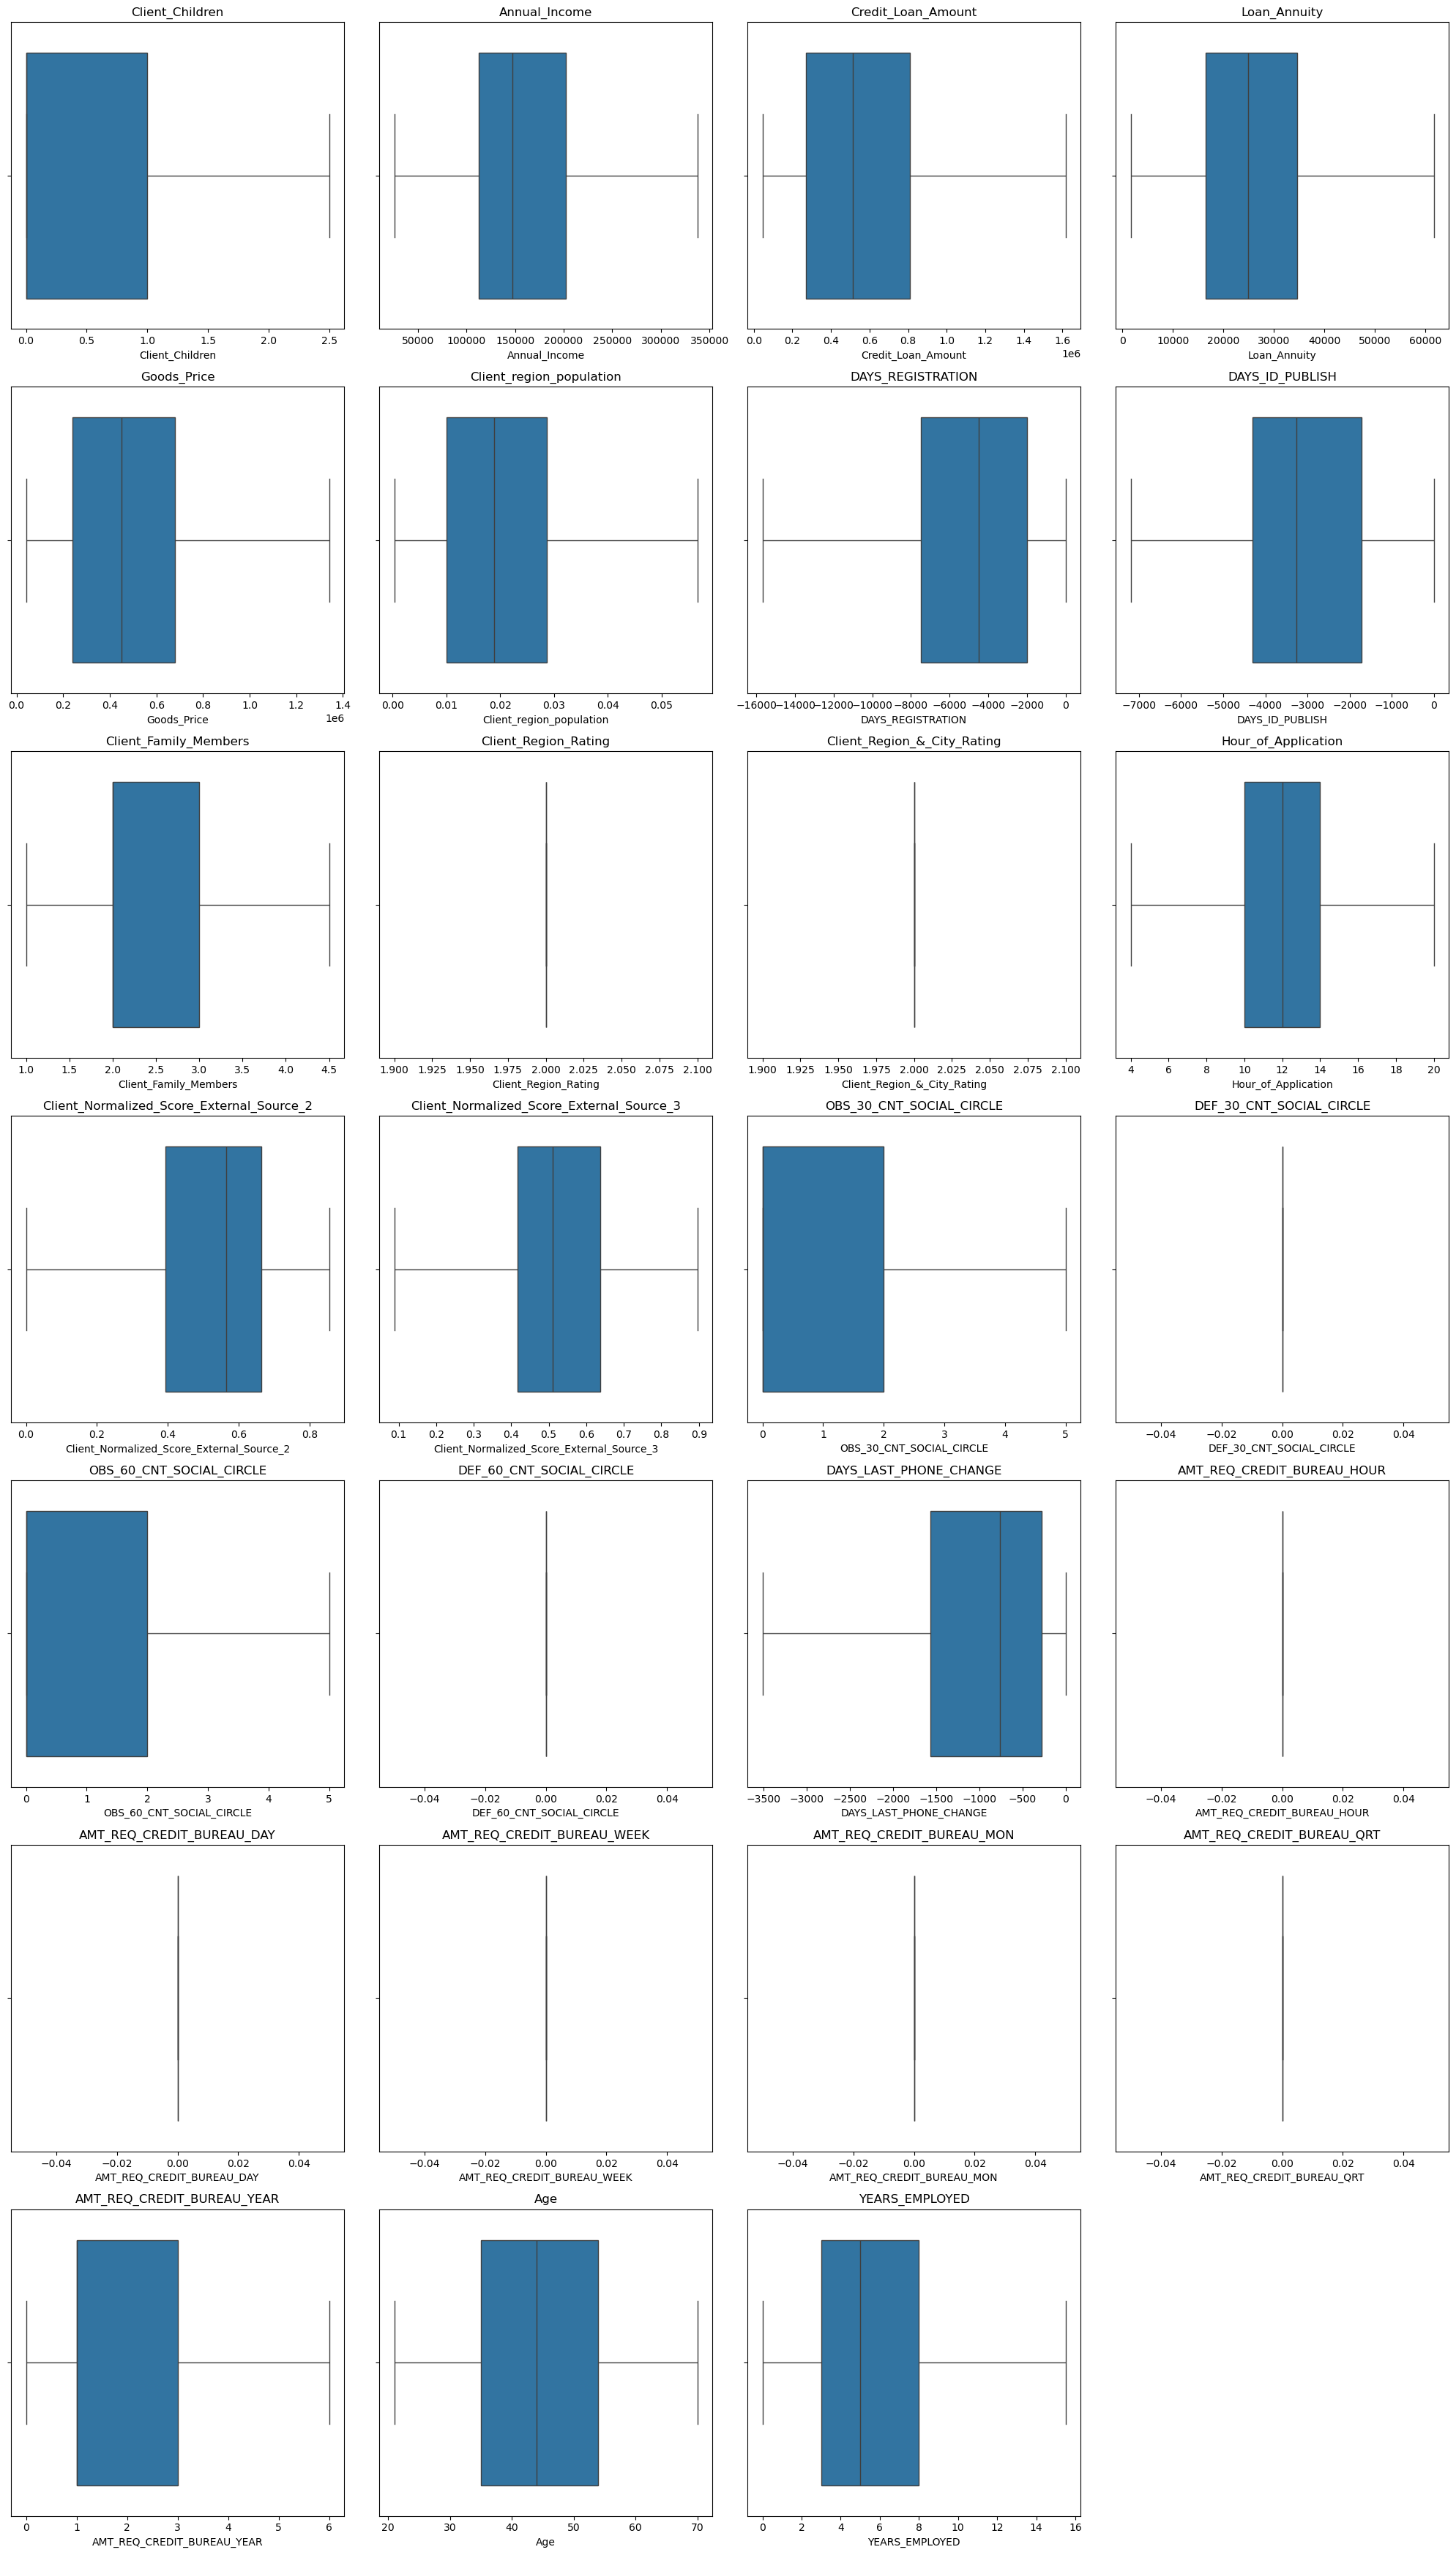

In [181]:
#rechecking if there are any outliers present

# Define columns to plot
columns_to_plot = [
    'Client_Children', 'Annual_Income', 'Credit_Loan_Amount', 'Loan_Annuity',
    'Goods_Price', 'Client_region_population', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
    'Client_Family_Members', 'Client_Region_Rating', 'Client_Region_&_City_Rating', 
    'Hour_of_Application', 'Client_Normalized_Score_External_Source_2', 
    'Client_Normalized_Score_External_Source_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 
    'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 
    'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 
    'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 
    'AMT_REQ_CREDIT_BUREAU_YEAR', 'Age', 'YEARS_EMPLOYED'
]

# Determine the number of rows needed (4 columns per row)
num_cols = 4
num_rows = int(np.ceil(len(columns_to_plot) / num_cols))

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))

# Flatten axes array
axes = axes.flatten()

# Loop through the columns and plot box plots
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=application_data[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots (if columns < total subplots)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

In [182]:
#replacing Client_Children 2.5 value to 3 .. as childen cannot be float.
application_data["Client_Children"].replace(2.5, 3, inplace = True)

### Checking Data Imbalance

In [183]:
#Columns with binary (0/1) indicators or categorical flags
flags = []
for col in application_data.columns:
    if "flag" in col.lower():
        flags.append(col)

flags

['FLAG_Defalter',
 'FLAG_MOBILE_1_YES_0_NO',
 'FLAG_EMP_PHONE_1_YES_0_NO',
 'FLAG_HOME_PHONE_1_YES_0_NO',
 'FLAG_CONT_MOBILE_1_YES_0_NO',
 'FLAG_PHONE_1_YES_0_NO',
 'FLAG_EMAIL_1_YES_0_NO',
 'FLAG_Client_Permanent_address_not_match_Contact_address_region',
 'FLAG_Client_Permanent_address_not_match_work_address_region',
 'FLAG_Client_Contact_address_not_match_work_address_region',
 'FLAG_Client_Permanent_address_not_match_Contact_address_city',
 'FLAG_Client_Permanent_address_not_match_work_address_city',
 'FLAG_Client_Contact_address_not_match_work_address_city',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

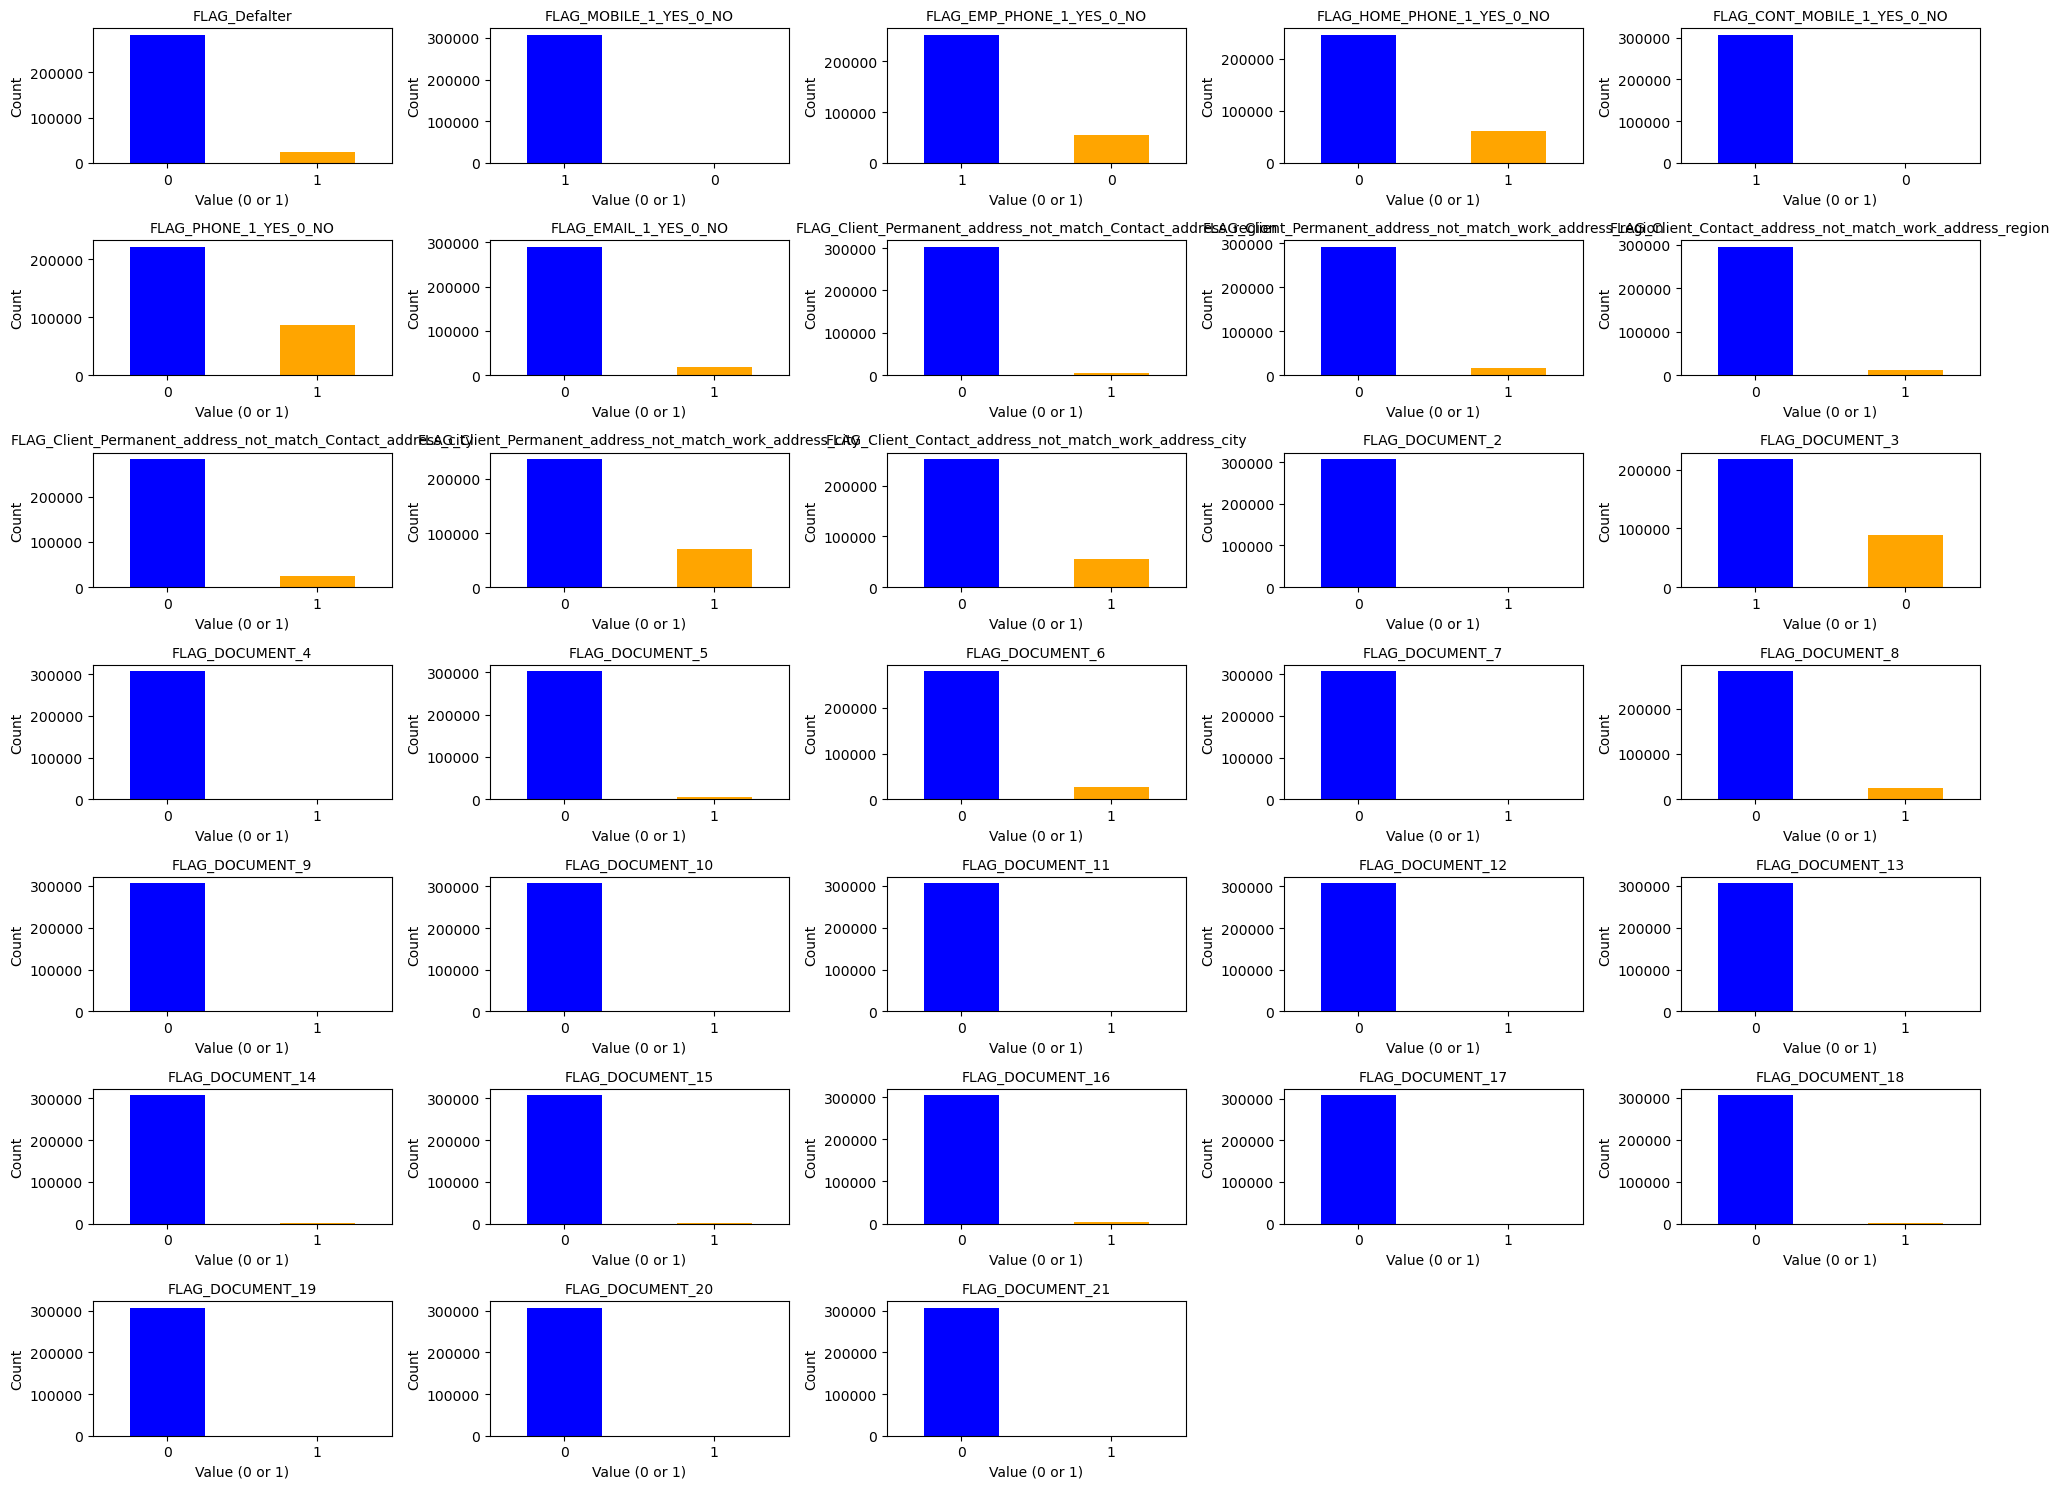

In [184]:
#checking for data imbalance

import matplotlib.pyplot as plt

# Define grid dimensions
n_cols = 5  # Number of columns in the grid
n_rows = (len(flags) // n_cols) + 1  # Auto-adjust rows based on total columns

# Create a figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))  # Set figure size
axes = axes.flatten()  # Convert 2D array to 1D for easier iteration

# Loop through each column in list_flag and plot in the respective subplot
for idx, col in enumerate(flags):
    if col in flags:  # Ensure column exists
        application_data[col].value_counts().plot(kind='bar', ax=axes[idx], color=['blue', 'orange'])
        axes[idx].set_title(col, fontsize=10)
        axes[idx].set_xlabel("Value (0 or 1)")
        axes[idx].set_ylabel("Count")
        axes[idx].set_xticks(range(len(application_data[col].value_counts().index)))  # Set correct tick positions
        axes[idx].set_xticklabels(application_data[col].value_counts().index, rotation=0)  # Set actual labels

# Remove any extra empty subplots
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])  # Remove unused subplot axes

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display all plots together

**As we can see that except 'FLAG_DOCUMENT_3', 'FLAG_Client_Permanent_address_not_match_work_address_city', 'FLAG_Client_Permanent_address_not_match_work_address_city','FLAG_EMP_PHONE_1_YES_0_NO', 'FLAG_HOME_PHONE_1_YES_0_NO', and 'FLAG_PHONE_1_YES_0_NO' all the columns have negligible count of Zero's and One's. So we are removing all the FLAG_DOCUMENT columns except'FLAG_DOCUMENT_3', 'FLAG_Client_Permanent_address_not_match_work_address_city', 'FLAG_Client_Permanent_address_not_match_work_address_city','FLAG_EMP_PHONE_1_YES_0_NO', 'FLAG_HOME_PHONE_1_YES_0_NO', and 'FLAG_PHONE_1_YES_0_NO'**

In [185]:
application_data.drop([
    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
    'FLAG_Client_Permanent_address_not_match_Contact_address_region',
    'FLAG_Client_Permanent_address_not_match_work_address_region',
    'FLAG_Client_Contact_address_not_match_work_address_region',
    'FLAG_Client_Permanent_address_not_match_Contact_address_city',
    'FLAG_MOBILE_1_YES_0_NO', 'FLAG_CONT_MOBILE_1_YES_0_NO', 'FLAG_EMAIL_1_YES_0_NO'],axis=1,inplace=True)

In [186]:
application_data.shape

(307511, 47)

In [187]:
application_data.columns

Index(['Loan_ID', 'FLAG_Defalter', 'Loan_Type', 'Gender', 'Own_Car',
       'Own_House', 'Client_Children', 'Annual_Income', 'Credit_Loan_Amount',
       'Loan_Annuity', 'Goods_Price', 'Accompany_client', 'Client_Profession',
       'Client_Education', 'Client_Marital_Status', 'Client_House_Status',
       'Client_region_population', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'FLAG_EMP_PHONE_1_YES_0_NO', 'FLAG_HOME_PHONE_1_YES_0_NO',
       'FLAG_PHONE_1_YES_0_NO', 'OCCUPATION_TYPE', 'Client_Family_Members',
       'Client_Region_Rating', 'Client_Region_&_City_Rating',
       'Day_of_Application', 'Hour_of_Application',
       'FLAG_Client_Permanent_address_not_match_work_address_city',
       'FLAG_Client_Contact_address_not_match_work_address_city',
       'Client_Organization_type', 'Client_Normalized_Score_External_Source_2',
       'Client_Normalized_Score_External_Source_3', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF

### Binning of AGE, Annual_Income, Credit_Loan_Amount and Client_Normalized_Score_External_Source_3 and 2 columns

In [188]:
application_data['Age'].describe()

count    307511.000000
mean         44.433090
std          11.954493
min          21.000000
25%          35.000000
50%          44.000000
75%          54.000000
max          70.000000
Name: Age, dtype: float64

In [189]:
#Function for defining age groups
def age_group(x):
    if x<40:
        return "Young"
    elif x>40 and x<60:
        return "Mid-Aged"
    else:
        return "Senior"

In [190]:
#Creating new column AGE_GROUP
application_data['AGE_GROUP'] = application_data['Age'].apply(age_group)
application_data.head()

Loan_ID  FLAG_Defalter        Loan_Type Gender Own_Car Own_House  \
0   100002              1       Cash loans      M       N         Y   
1   100003              0       Cash loans      F       N         N   
2   100004              0  Revolving loans      M       Y         Y   
3   100006              0       Cash loans      F       N         Y   
4   100007              0       Cash loans      M       N         Y   

   Client_Children  Annual_Income  Credit_Loan_Amount  Loan_Annuity  ...  \
0              0.0       202500.0            406597.5       24700.5  ...   
1              0.0       270000.0           1293502.5       35698.5  ...   
2              0.0        67500.0            135000.0        6750.0  ...   
3              0.0       135000.0            312682.5       29686.5  ...   
4              0.0       121500.0            513000.0       21865.5  ...   

   FLAG_DOCUMENT_3 AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                1                        0.0                       0.0   
1                1                        0.0                       0.0   
2                0                        0.0                       0.0   
3                1                        0.0                       0.0   
4                0                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  Age  YEARS_EMPLOYED  \
0                       0.0                         1.0   26             2.0   
1                       0.0                         0.0   46             4.0   
2                       0.0                         0.0   53             1.0   
3                       0.0                         1.0   53             9.0   
4                       0.0                         0.0   55             9.0   

   AGE_GROUP  
0      Young  
1   Mid-Aged  
2   Mid-Aged  
3   Mid-Aged  
4   Mid-Aged  

[5 rows x 48 columns]

In [191]:
round(application_data['Credit_Loan_Amount'].describe(),2)

count     307511.00
mean      592313.04
std       380316.24
min        45000.00
25%       270000.00
50%       513531.00
75%       808650.00
max      1616625.00
Name: Credit_Loan_Amount, dtype: float64

In [192]:
# Function for categorizing CREDIT_GROUP (High, Medium and Low)
def Credit_Loan_Amount_group(x):
    if (x < 500000):
        return 'Low'
    elif (x >= 500000 and x < 750000):
        return 'Medium'
    else:
        return 'High'

In [193]:
#Creating new column Credit_Loan_Amount_group
application_data['Credit_Loan_Amount_group'] = application_data['Credit_Loan_Amount'].apply(Credit_Loan_Amount_group)
application_data.head()

Loan_ID  FLAG_Defalter        Loan_Type Gender Own_Car Own_House  \
0   100002              1       Cash loans      M       N         Y   
1   100003              0       Cash loans      F       N         N   
2   100004              0  Revolving loans      M       Y         Y   
3   100006              0       Cash loans      F       N         Y   
4   100007              0       Cash loans      M       N         Y   

   Client_Children  Annual_Income  Credit_Loan_Amount  Loan_Annuity  ...  \
0              0.0       202500.0            406597.5       24700.5  ...   
1              0.0       270000.0           1293502.5       35698.5  ...   
2              0.0        67500.0            135000.0        6750.0  ...   
3              0.0       135000.0            312682.5       29686.5  ...   
4              0.0       121500.0            513000.0       21865.5  ...   

   AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR  Age  YEARS_EMPLOYED  \
0                       0.0                        1.0   26             2.0   
1                       0.0                        0.0   46             4.0   
2                       0.0                        0.0   53             1.0   
3                       0.0                        1.0   53             9.0   
4                       0.0                        0.0   55             9.0   

   AGE_GROUP  Credit_Loan_Amount_group  
0      Young                       Low  
1   Mid-Aged                      High  
2   Mid-Aged                       Low  
3   Mid-Aged                       Low  
4   Mid-Aged                    Medium  

[5 rows x 49 columns]

In [194]:
application_data['Annual_Income'].describe()

count    307511.000000
mean     162626.947877
std       73303.150927
min       25650.000000
25%      112500.000000
50%      147150.000000
75%      202500.000000
max      337500.000000
Name: Annual_Income, dtype: float64

In [195]:
# Function for categorizing Annual_Income (Low, Medium and High)
def income_group(x):
    if (x < 110000):
        return 'Low'
    elif(x >= 110000 and x < 160000):
        return 'Medium'
    else:
        return 'High'

In [196]:
application_data['income_group'] = application_data['Annual_Income'].apply(income_group)
application_data.head()

Loan_ID  FLAG_Defalter        Loan_Type Gender Own_Car Own_House  \
0   100002              1       Cash loans      M       N         Y   
1   100003              0       Cash loans      F       N         N   
2   100004              0  Revolving loans      M       Y         Y   
3   100006              0       Cash loans      F       N         Y   
4   100007              0       Cash loans      M       N         Y   

   Client_Children  Annual_Income  Credit_Loan_Amount  Loan_Annuity  ...  \
0              0.0       202500.0            406597.5       24700.5  ...   
1              0.0       270000.0           1293502.5       35698.5  ...   
2              0.0        67500.0            135000.0        6750.0  ...   
3              0.0       135000.0            312682.5       29686.5  ...   
4              0.0       121500.0            513000.0       21865.5  ...   

   AMT_REQ_CREDIT_BUREAU_DAY AMT_REQ_CREDIT_BUREAU_WEEK  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        0.0                        0.0   

  AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_YEAR Age  YEARS_EMPLOYED  AGE_GROUP  \
0                        1.0  26             2.0      Young   
1                        0.0  46             4.0   Mid-Aged   
2                        0.0  53             1.0   Mid-Aged   
3                        1.0  53             9.0   Mid-Aged   
4                        0.0  55             9.0   Mid-Aged   

   Credit_Loan_Amount_group  income_group  
0                       Low          High  
1                      High          High  
2                       Low           Low  
3                       Low        Medium  
4                    Medium        Medium  

[5 rows x 50 columns]

In [197]:
application_data['Client_Normalized_Score_External_Source'] = round(((application_data['Client_Normalized_Score_External_Source_2'] + application_data['Client_Normalized_Score_External_Source_3'])/2),2)
application_data.head()

Loan_ID  FLAG_Defalter        Loan_Type Gender Own_Car Own_House  \
0   100002              1       Cash loans      M       N         Y   
1   100003              0       Cash loans      F       N         N   
2   100004              0  Revolving loans      M       Y         Y   
3   100006              0       Cash loans      F       N         Y   
4   100007              0       Cash loans      M       N         Y   

   Client_Children  Annual_Income  Credit_Loan_Amount  Loan_Annuity  ...  \
0              0.0       202500.0            406597.5       24700.5  ...   
1              0.0       270000.0           1293502.5       35698.5  ...   
2              0.0        67500.0            135000.0        6750.0  ...   
3              0.0       135000.0            312682.5       29686.5  ...   
4              0.0       121500.0            513000.0       21865.5  ...   

   AMT_REQ_CREDIT_BUREAU_WEEK AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR Age YEARS_EMPLOYED  \
0                       0.0                        1.0  26            2.0   
1                       0.0                        0.0  46            4.0   
2                       0.0                        0.0  53            1.0   
3                       0.0                        1.0  53            9.0   
4                       0.0                        0.0  55            9.0   

   AGE_GROUP  Credit_Loan_Amount_group  income_group  \
0      Young                       Low          High   
1   Mid-Aged                      High          High   
2   Mid-Aged                       Low           Low   
3   Mid-Aged                       Low        Medium   
4   Mid-Aged                    Medium        Medium   

   Client_Normalized_Score_External_Source  
0                                     0.20  
1                                     0.57  
2                                     0.64  
3                                     0.58  
4                                     0.42  

[5 rows x 51 columns]

In [198]:
# Dropping ('Client_Normalized_Score_External_Source_2','Client_Normalized_Score_External_Source_3' columns)
application_data.drop(['Client_Normalized_Score_External_Source_2','Client_Normalized_Score_External_Source_3'],axis=1,inplace=True)

In [199]:
application_data['Client_Normalized_Score_External_Source'].describe()

count    307511.000000
mean          0.512888
std           0.134907
min           0.040000
25%           0.420000
50%           0.530000
75%           0.610000
max           0.840000
Name: Client_Normalized_Score_External_Source, dtype: float64

In [200]:
# Function for categorizing Client_Normalized_Score_External_Source (Low, Medium and High)
def Client_Normalized_Score_External_Source_group(x):
    if (x < 0.4):
        return 'Low'
    elif (x >= 0.4 and x < 0.6):
        return 'Medium'
    else:
        return 'High'

In [201]:
# Creating column Client_Normalized_Score_External_Source_group with High, medium and Low
application_data['Client_Normalized_Score_External_Source_group'] = application_data['Client_Normalized_Score_External_Source'].apply(Client_Normalized_Score_External_Source_group)
application_data.head()

Loan_ID  FLAG_Defalter        Loan_Type Gender Own_Car Own_House  \
0   100002              1       Cash loans      M       N         Y   
1   100003              0       Cash loans      F       N         N   
2   100004              0  Revolving loans      M       Y         Y   
3   100006              0       Cash loans      F       N         Y   
4   100007              0       Cash loans      M       N         Y   

   Client_Children  Annual_Income  Credit_Loan_Amount  Loan_Annuity  ...  \
0              0.0       202500.0            406597.5       24700.5  ...   
1              0.0       270000.0           1293502.5       35698.5  ...   
2              0.0        67500.0            135000.0        6750.0  ...   
3              0.0       135000.0            312682.5       29686.5  ...   
4              0.0       121500.0            513000.0       21865.5  ...   

   AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_YEAR Age YEARS_EMPLOYED AGE_GROUP  \
0                        1.0  26            2.0     Young   
1                        0.0  46            4.0  Mid-Aged   
2                        0.0  53            1.0  Mid-Aged   
3                        1.0  53            9.0  Mid-Aged   
4                        0.0  55            9.0  Mid-Aged   

   Credit_Loan_Amount_group  income_group  \
0                       Low          High   
1                      High          High   
2                       Low           Low   
3                       Low        Medium   
4                    Medium        Medium   

   Client_Normalized_Score_External_Source  \
0                                     0.20   
1                                     0.57   
2                                     0.64   
3                                     0.58   
4                                     0.42   

   Client_Normalized_Score_External_Source_group  
0                                            Low  
1                                         Medium  
2                                           High  
3                                         Medium  
4                                         Medium  

[5 rows x 50 columns]

**Divide data into two sets:**

**Client with payment difficulties (Target=1)**

**All other cases (Target=0)**

In [202]:
# Clients with all other cases (Target=0)
application_data_0 = application_data[application_data['FLAG_Defalter'] == 0]
application_data_0.head()

Loan_ID  FLAG_Defalter        Loan_Type Gender Own_Car Own_House  \
1   100003              0       Cash loans      F       N         N   
2   100004              0  Revolving loans      M       Y         Y   
3   100006              0       Cash loans      F       N         Y   
4   100007              0       Cash loans      M       N         Y   
5   100008              0       Cash loans      M       N         Y   

   Client_Children  Annual_Income  Credit_Loan_Amount  Loan_Annuity  ...  \
1              0.0       270000.0           1293502.5       35698.5  ...   
2              0.0        67500.0            135000.0        6750.0  ...   
3              0.0       135000.0            312682.5       29686.5  ...   
4              0.0       121500.0            513000.0       21865.5  ...   
5              0.0        99000.0            490495.5       27517.5  ...   

   AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        0.0                       0.0   
4                        0.0                       0.0   
5                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_YEAR Age YEARS_EMPLOYED AGE_GROUP  \
1                        0.0  46            4.0  Mid-Aged   
2                        0.0  53            1.0  Mid-Aged   
3                        1.0  53            9.0  Mid-Aged   
4                        0.0  55            9.0  Mid-Aged   
5                        1.0  47            5.0  Mid-Aged   

   Credit_Loan_Amount_group  income_group  \
1                      High          High   
2                       Low           Low   
3                       Low        Medium   
4                    Medium        Medium   
5                       Low           Low   

   Client_Normalized_Score_External_Source  \
1                                     0.57   
2                                     0.64   
3                                     0.58   
4                                     0.42   
5                                     0.49   

   Client_Normalized_Score_External_Source_group  
1                                         Medium  
2                                           High  
3                                         Medium  
4                                         Medium  
5                                         Medium  

[5 rows x 50 columns]

In [203]:
application_data_0.shape

(282686, 50)

In [204]:
# Clients with payment difficulties (Target=1)
application_data_1 = application_data[application_data['FLAG_Defalter'] == 1]
application_data_1.head()

Loan_ID  FLAG_Defalter   Loan_Type Gender Own_Car Own_House  \
0    100002              1  Cash loans      M       N         Y   
26   100031              1  Cash loans      F       N         Y   
40   100047              1  Cash loans      M       N         Y   
42   100049              1  Cash loans      F       N         N   
81   100096              1  Cash loans      F       N         Y   

    Client_Children  Annual_Income  Credit_Loan_Amount  Loan_Annuity  ...  \
0               0.0       202500.0            406597.5       24700.5  ...   
26              0.0       112500.0            979992.0       27076.5  ...   
40              0.0       202500.0           1193580.0       35028.0  ...   
42              0.0       135000.0            288873.0       16258.5  ...   
81              0.0        81000.0            252000.0       14593.5  ...   

    AMT_REQ_CREDIT_BUREAU_MON AMT_REQ_CREDIT_BUREAU_QRT  \
0                         0.0                       0.0   
26                        0.0                       0.0   
40                        0.0                       0.0   
42                        0.0                       0.0   
81                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR Age YEARS_EMPLOYED AGE_GROUP  \
0                         1.0  26            2.0     Young   
26                        2.0  52            8.0  Mid-Aged   
40                        4.0  48            4.0  Mid-Aged   
42                        2.0  37           10.0     Young   
81                        0.0  68            5.0    Senior   

    Credit_Loan_Amount_group  income_group  \
0                        Low          High   
26                      High        Medium   
40                      High          High   
42                       Low        Medium   
81                       Low           Low   

    Client_Normalized_Score_External_Source  \
0                                      0.20   
26                                     0.37   
40                                     0.31   
42                                     0.54   
81                                     0.37   

    Client_Normalized_Score_External_Source_group  
0                                             Low  
26                                            Low  
40                                            Low  
42                                         Medium  
81                                            Low  

[5 rows x 50 columns]

In [205]:
application_data_1.shape

(24825, 50)

### ANALYSIS

### Univariate analysis for Unordered categorical variables

In [206]:
application_data['AGE_GROUP'] = application_data['AGE_GROUP'].astype('category')
application_data['Credit_Loan_Amount_group'] = application_data['Credit_Loan_Amount_group'].astype('category')
application_data['income_group'] = application_data['income_group'].astype('category')
application_data['Client_Normalized_Score_External_Source_group'] = application_data['Client_Normalized_Score_External_Source_group'].astype('category')

**COUNT OF DEFAULTERS AND NON-DEFAULTERS BY GENDER**

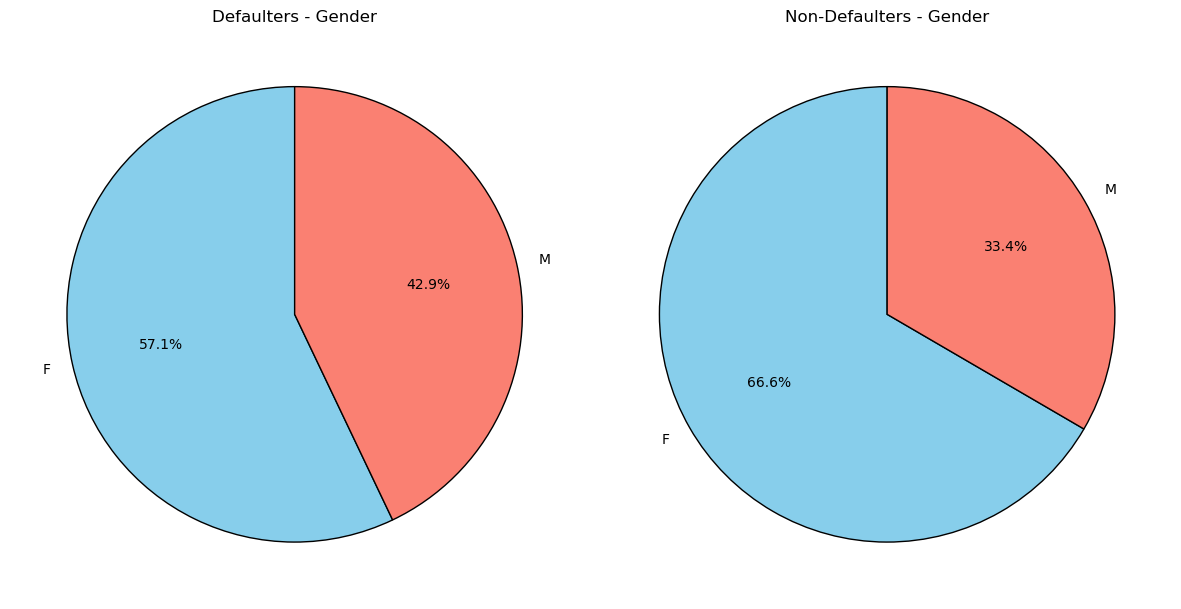

In [207]:
# Define figure size
plt.figure(figsize=(12, 6))

# Plot pie chart for Defaulters
plt.subplot(1, 2, 1)
application_data_1['Gender'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90, wedgeprops={'edgecolor': 'black'}
)
plt.title('Defaulters - Gender')
plt.ylabel('')  # Hide y-label

# Plot pie chart for Non-Defaulters
plt.subplot(1, 2, 2)
application_data_0['Gender'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90, wedgeprops={'edgecolor': 'black'}
)
plt.title('Non-Defaulters - Gender')
plt.ylabel('')  # Hide y-label

# Show the plot
plt.tight_layout()
plt.show()

**Observation from the Pie Charts**

**Defaulters (Left Pie Chart)**
- The proportion of female defaulters (F) is 57.1%, whereas male defaulters (M) make up 42.9%.
- This suggests that females have a slightly higher default rate compared to males.

**Non-Defaulters (Right Pie Chart)**
- Among non-defaulters, females (F) account for 66.6%, while males (M) make up only 33.4%.
- This indicates that females are more likely to repay their dues compared to males.

**Key Takeaways**
- A higher percentage of females are non-defaulters, suggesting better financial responsibility or repayment discipline.
- Although more females default than males, the overall trend favors females in terms of repayment behavior.
- Males have a relatively higher likelihood of defaulting compared to their presence in the non-defaulters' group.

**DEFAULTERS AND NON-DEFAULTERS ON THE BASIS OF LOAN TYPE**

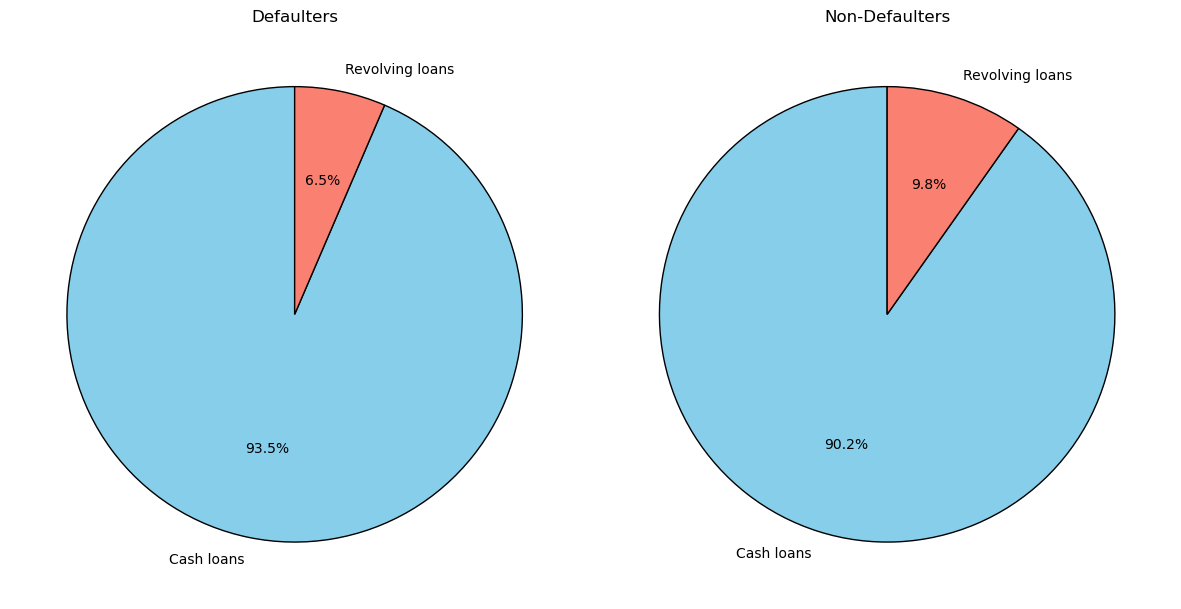

In [208]:
# Define figure size
plt.figure(figsize=(12, 6))

# Plot pie chart for Defaulters
plt.subplot(1, 2, 1)
application_data_1['Loan_Type'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90, wedgeprops={'edgecolor': 'black'}
)
plt.title('Defaulters')
plt.ylabel('')  # Hide y-label

# Plot pie chart for Non-Defaulters
plt.subplot(1, 2, 2)
application_data_0['Loan_Type'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90, wedgeprops={'edgecolor': 'black'}
)
plt.title('Non-Defaulters')
plt.ylabel('')  # Hide y-label

# Show the plot
plt.tight_layout()
plt.show()

**Defaulters:**
- The majority (93.5%) of defaulters had cash loans.
- A smaller proportion (6.5%) had revolving loans.

**Non-Defaulters:**
- The majority (90.2%) of non-defaulters had cash loans.
- A slightly higher proportion (9.8%) had revolving loans compared to defaulters.
                                
**Key Insight:**
- A higher percentage of non-defaulters had revolving loans (9.8%) compared to defaulters (6.5%), suggesting that individuals with revolving loans might have a lower likelihood of defaulting.
- Cash loans are predominant in both groups but are more common among defaulters, which might indicate a higher risk associated with cash loans.

**DEFAULTERS AND NON-DEFAULTERS ON THE BASIS OF INCOME TYPE**

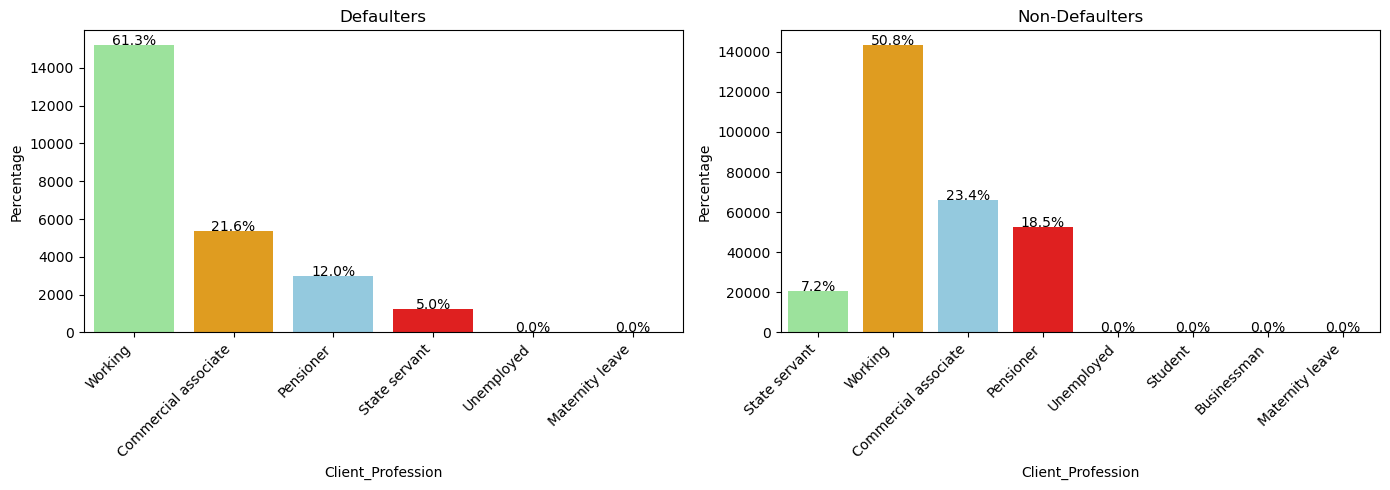

In [209]:
plt.figure(figsize=(14, 5))

# Defaulters
plt.subplot(1, 2, 1)
total = len(application_data_1)  # Total count of defaulters
ax = sns.countplot(x='Client_Profession', data=application_data_1, 
                   palette=['lightgreen', 'orange', 'skyblue', 'red', 'yellow'])

# Adding percentages on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 2, 
            f'{100 * height / total:.1f}%', ha='center')

plt.title('Defaulters')
ax.set(xlabel='Client_Profession', ylabel='Percentage')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Non-Defaulters
plt.subplot(1, 2, 2)
total = len(application_data_0)  # Total count of non-defaulters
ax = sns.countplot(x='Client_Profession', data=application_data_0, 
                   palette=['lightgreen', 'orange', 'skyblue', 'red', 'yellow'])

# Adding percentages on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 2, 
            f'{100 * height / total:.1f}%', ha='center')

plt.title('Non-Defaulters')
ax.set(xlabel='Client_Profession', ylabel='Percentage')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

**Defaulters (Left Chart)**
- Majority (61.3%) of defaulters are from the "Working" category, making it the most vulnerable profession.
- Commercial Associates account for 21.6%, indicating a moderate risk in this group.
- Pensioners make up 12%, suggesting that retired individuals still face financial difficulties.
- State Servants and other small categories contribute insignificantly.

**Non-Defaulters (Right Chart)**
- Working professionals still hold the majority (50.8%), but a larger proportion of them are defaulters compared to non-defaulters.
- Commercial Associates (23.4%) have a slightly higher presence in non-defaulters, indicating better financial stability than in the defaulters category.
- Pensioners (18.5%) have a greater presence among non-defaulters, suggesting they are more responsible with repayments.
- State Servants and minor groups have a negligible share in both categories.

**Key Takeaways**
- Working professionals have the highest default rate, but they also make up the largest category in non-defaulters.
- Pensioners show better financial discipline, as their share among non-defaulters is higher.
- Commercial Associates are some what balanced but still have a considerable default risk.
- Minority professions like "State Servants" have very little contribution to the dataset.

**--------------------------------------------------------------------------------------------------------------------------**

**DEFAULTERS AND NON-DEFAULTERS ON THE BASIS OF EDUCATION TYPE**

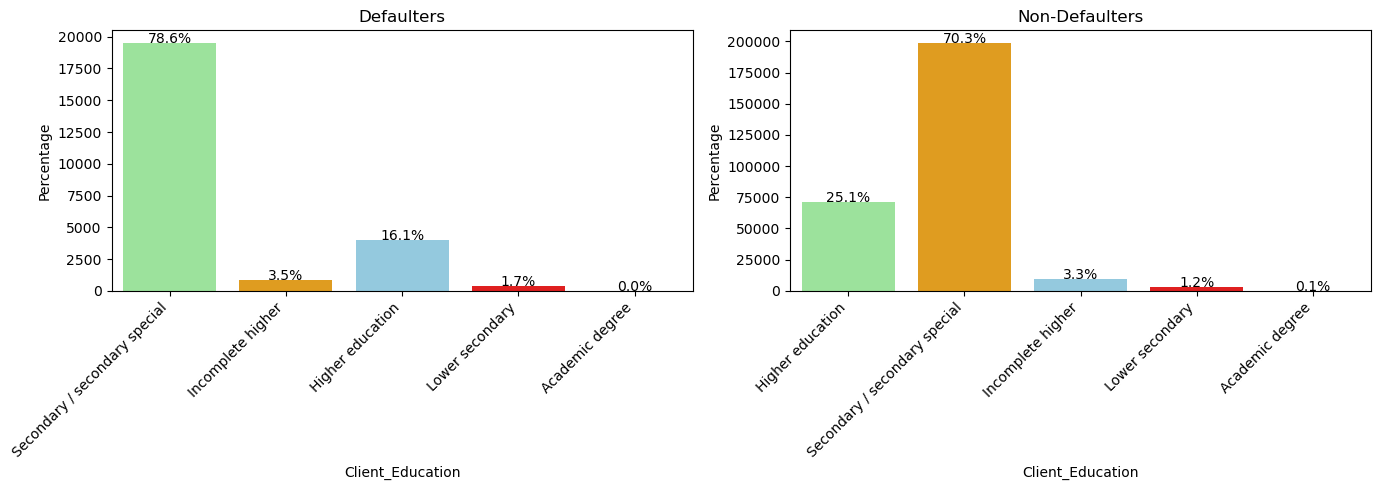

In [210]:
plt.figure(figsize=(14, 5))

# Defaulters
plt.subplot(1, 2, 1)
total = len(application_data_1)  # Total count of defaulters
ax = sns.countplot(x='Client_Education', data=application_data_1, 
                   palette=['lightgreen', 'orange', 'skyblue', 'red', 'yellow'])

# Adding percentages on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 2, 
            f'{100 * height / total:.1f}%', ha='center')

plt.title('Defaulters')
ax.set(xlabel='Client_Education', ylabel='Percentage')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Non-Defaulters
plt.subplot(1, 2, 2)
total = len(application_data_0)  # Total count of non-defaulters
ax = sns.countplot(x='Client_Education', data=application_data_0, 
                   palette=['lightgreen', 'orange', 'skyblue', 'red', 'yellow'])

# Adding percentages on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 2, 
            f'{100 * height / total:.1f}%', ha='center')

plt.title('Non-Defaulters')
ax.set(xlabel='Client_Education', ylabel='Percentage')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

**Defaulters (Left Chart)**
- Majority (78.6%) of defaulters have a "Secondary / Secondary Special" education level.
- Higher education defaulters constitute 16.1%, which is significantly lower than secondary education.
- Incomplete higher education makes up only 3.5% of defaulters.
- Lower secondary education accounts for 1.7%, while academic degree holders have 0% defaulters.

**Non-Defaulters (Right Chart)**
- The largest proportion (70.3%) of non-defaulters also belongs to the "Secondary / Secondary Special" education category.
- 25.1% of non-defaulters have a higher education background, which is much higher than the 16.1% among defaulters.
- Incomplete higher education (3.3%) and lower secondary (1.2%) remain similar in both groups.
- Academic degree holders (0.1%) are slightly present in non-defaulters but absent in defaulters.

**Key Insights:**
- Higher education reduces default risk – A greater percentage of non-defaulters (25.1%) have higher education compared to defaulters (16.1%).
- Most borrowers, whether defaulters or non-defaulters, have secondary education, but non-defaulters have a slightly lower proportion (70.3%) compared to defaulters (78.6%).
- Individuals with an academic degree have an extremely low default rate (0% among defaulters vs. 0.1% among non-defaulters), suggesting a possible correlation between higher qualifications and better financial responsibility.

**------------------------------------------------------------------------------------------------------------------------**

**DEFAULTERS AND NON-DEFAULTERS ON THE BASIS OF CLIENT MARITAL STATUS**

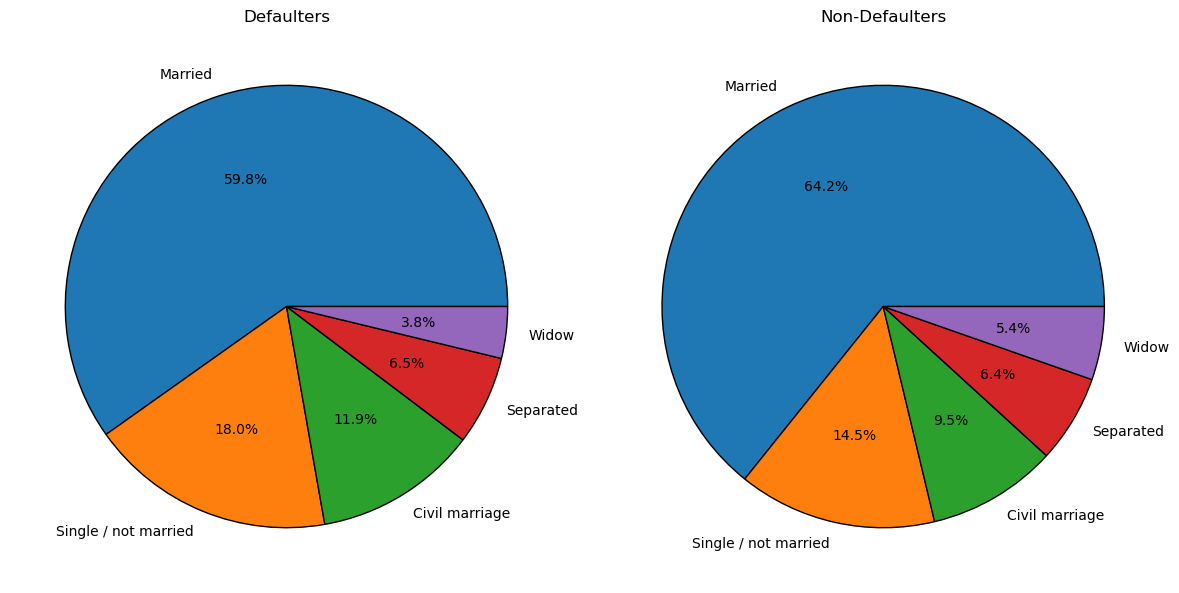

In [211]:
# Define figure size
plt.figure(figsize=(12, 6))

# Plot pie chart for Defaulters
plt.subplot(1, 2, 1)
application_data_1['Client_Marital_Status'].value_counts().plot(
    kind='pie',autopct='%1.1f%%', startangle=0, wedgeprops={'edgecolor': 'black'}
)
plt.title('Defaulters')
plt.ylabel('')  # Hide y-label

# Plot pie chart for Non-Defaulters
plt.subplot(1, 2, 2)
application_data_0['Client_Marital_Status'].value_counts().plot(
    kind='pie',autopct='%1.1f%%', startangle=0, wedgeprops={'edgecolor': 'black'}
)
plt.title('Non-Defaulters')
plt.ylabel('')  # Hide y-label

# Show the plot
plt.tight_layout()
plt.show()

**Married Individuals (Largest Group in Both Cases)**
- Defaulters: 59.8% are married.
- Non-Defaulters: 64.2% are married.
- Insight: Married individuals form the majority in both categories, but the proportion is higher among non-defaulters. This suggests that married individuals may have more financial stability and lower default risk.

**Single / Not Married**
- Defaulters: 18.0%
- Non-Defaulters: 14.5%
- Insight: A slightly higher percentage of defaulters are single compared to non-defaulters. This may indicate that single individuals face more financial challenges, possibly due to a lack of shared financial responsibilities or dual-income benefits.

**Civil Marriage**
- Defaulters: 11.9%
- Non-Defaulters: 9.5%
- Insight: The percentage of individuals in a civil marriage is higher among defaulters. This could indicate that those in civil marriages might have less financial stability than those in traditional marriages.

**Separated Individuals**
- Defaulters: 6.5%
- Non-Defaulters: 6.4%
- Insight: The percentage remains nearly the same for both groups, indicating that separation does not significantly influence default risk.

**Widow/Widower**
- Defaulters: 3.8%
- Non-Defaulters: 5.4%
- Insight: A slightly higher percentage of non-defaulters are widowed. This could indicate that widowed individuals may have financial support systems in place, reducing their chances of defaulting.

**Key Insights & Conclusions**
- Married individuals are less likely to default, as seen in their higher proportion among non-defaulters.
- Single and civil marriage individuals have a higher tendency to default, possibly due to financial instability or lower income sources.
- Separated individuals have a similar default rate as non-defaulters, indicating that separation itself is not a major risk factor.
- Widowed individuals show lower default rates, which could be due to financial planning or support mechanisms.

**---------------------------------------------------------------------------------------------------------------------**

**DEFAULTERS AND NON-DEFAULTERS ON THE BASIS OF CLIENT'S HOUSE STATUS**

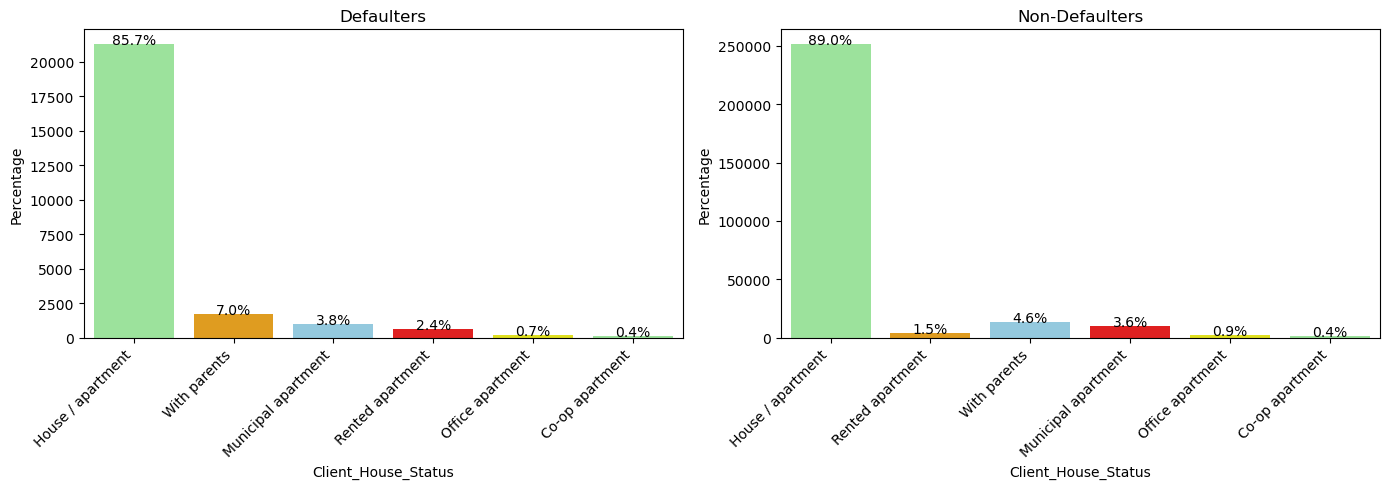

In [212]:
plt.figure(figsize=(14, 5))

# Defaulters
plt.subplot(1, 2, 1)
total = len(application_data_1)  # Total count of defaulters
ax = sns.countplot(x='Client_House_Status', data=application_data_1, 
                   palette=['lightgreen', 'orange', 'skyblue', 'red', 'yellow'])

# Adding percentages on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 2, 
            f'{100 * height / total:.1f}%', ha='center')

plt.title('Defaulters')
ax.set(xlabel='Client_House_Status', ylabel='Percentage')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Non-Defaulters
plt.subplot(1, 2, 2)
total = len(application_data_0)  # Total count of non-defaulters
ax = sns.countplot(x='Client_House_Status', data=application_data_0, 
                   palette=['lightgreen', 'orange', 'skyblue', 'red', 'yellow'])

# Adding percentages on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 2, 
            f'{100 * height / total:.1f}%', ha='center')

plt.title('Non-Defaulters')
ax.set(xlabel='Client_House_Status', ylabel='Percentage')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

**Observation**
- House / Apartment is the Dominant Category The majority of both defaulters (85.7%) and non-defaulters (89.0%) reside in a house/apartment. This suggests that housing type alone may not be a strong indicator of default risk.
- Defaulters Have a Higher Proportion of People Living with Parents 7.0% of defaulters live with parents, compared to only 4.6% of non-defaulters. This could imply that younger individuals or financially dependent individuals might have a higher risk of default.
- Municipal and Rented Apartments Show Slight Differences Municipal Apartments: 3.8% among defaulters vs. 3.6% among non-defaulters (very close). Rented Apartments: 2.4% among defaulters vs. 1.5% among non-defaulters. This indicates a slightly higher tendency for renters to default.
- Co-op and Office Apartments Have Minimal Representation Both categories have a very small proportion in both defaulters and non-defaulters. This suggests that individuals in these housing types do not significantly contribute to loan default patterns.

**Conclusion:**
While house/apartment remains the most common housing type across both groups, individuals living with parents and those renting appear to have a slightly higher default rate. Further analysis incorporating income levels, employment status, and debt-to-income ratios may provide deeper insights into the relationship between housing type and credit default risk.

**---------------------------------------------------------------------------------------------------------------------**

**DEFAULTERS AND NON-DEFAULTERS ON THE BASIS OF OWN_CAR**

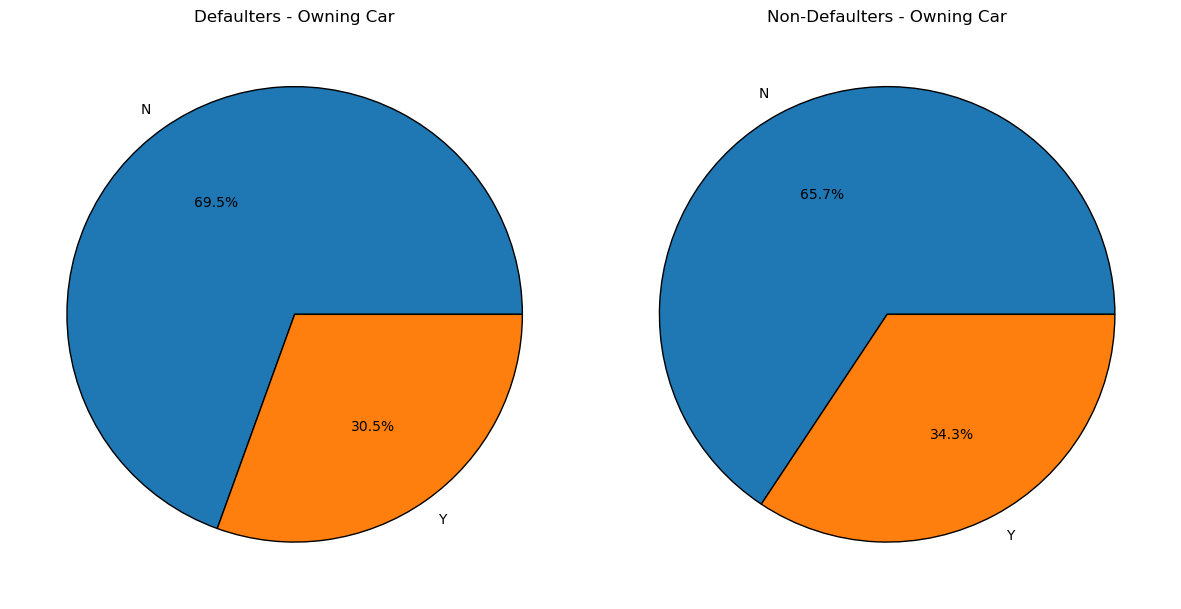

In [213]:
# Define figure size
plt.figure(figsize=(12, 6))

# Plot pie chart for Defaulters
plt.subplot(1, 2, 1)
application_data_1['Own_Car'].value_counts().plot(
    kind='pie',autopct='%1.1f%%', startangle=0, wedgeprops={'edgecolor': 'black'}
)
plt.title('Defaulters - Owning Car')
plt.ylabel('')  # Hide y-label

# Plot pie chart for Non-Defaulters
plt.subplot(1, 2, 2)
application_data_0['Own_Car'].value_counts().plot(
    kind='pie',autopct='%1.1f%%', startangle=0, wedgeprops={'edgecolor': 'black'}
)
plt.title('Non-Defaulters - Owning Car')
plt.ylabel('')  # Hide y-label

# Show the plot
plt.tight_layout()
plt.show()

**Observations**
- Not owning a car is the norm for both defaulters and non-defaulters.
- Non-defaulters show a slightly higher tendency to own a car, possibly due to better financial standing.
- Car ownership alone is not a strong indicator of default risk, and deeper financial analysis (e.g., credit scores, savings, debt levels) would provide more useful insights.

**------------------------------------------------------------------------------------------------------------------------**

**DEFAULTERS AND NON-DEFAULTERS ON THE BASIS OF OWN_HOUSE**

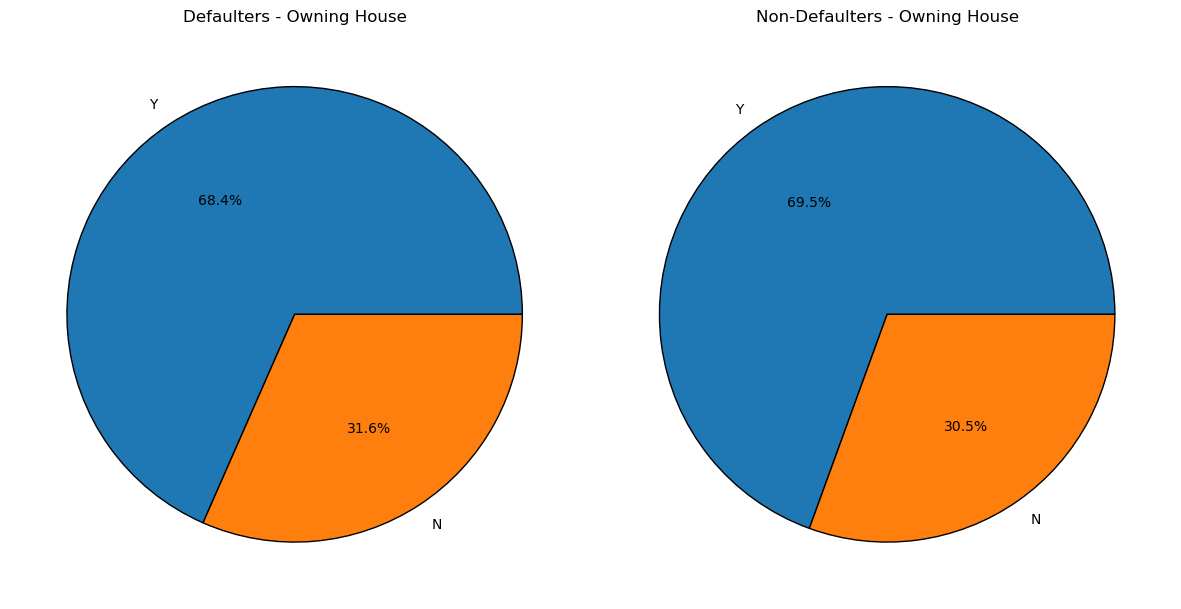

In [214]:
# Define figure size
plt.figure(figsize=(12, 6))

# Plot pie chart for Defaulters
plt.subplot(1, 2, 1)
application_data_1['Own_House'].value_counts().plot(
    kind='pie',autopct='%1.1f%%', startangle=0, wedgeprops={'edgecolor': 'black'}
)
plt.title('Defaulters - Owning House')
plt.ylabel('')  # Hide y-label

# Plot pie chart for Non-Defaulters
plt.subplot(1, 2, 2)
application_data_0['Own_House'].value_counts().plot(
    kind='pie',autopct='%1.1f%%', startangle=0, wedgeprops={'edgecolor': 'black'}
)
plt.title('Non-Defaulters - Owning House')
plt.ylabel('')  # Hide y-label

# Show the plot
plt.tight_layout()
plt.show()

**Observations**
- Not owning a house is the norm for both defaulters and non-defaulters.
- Non-defaulters show a slightly higher tendency to own a house, possibly due to better financial standing.
- House ownership alone is not a strong indicator of default risk, and deeper financial analysis (e.g., credit scores, savings, debt levels) would provide more useful insights.

**--------------------------------------------------------------------------------------------------------------------------**

**DEFAULTERS AND NON-DEFAULTERS ON THE BASIS OF PERSON ACCOMPANYING THE CLIENT**

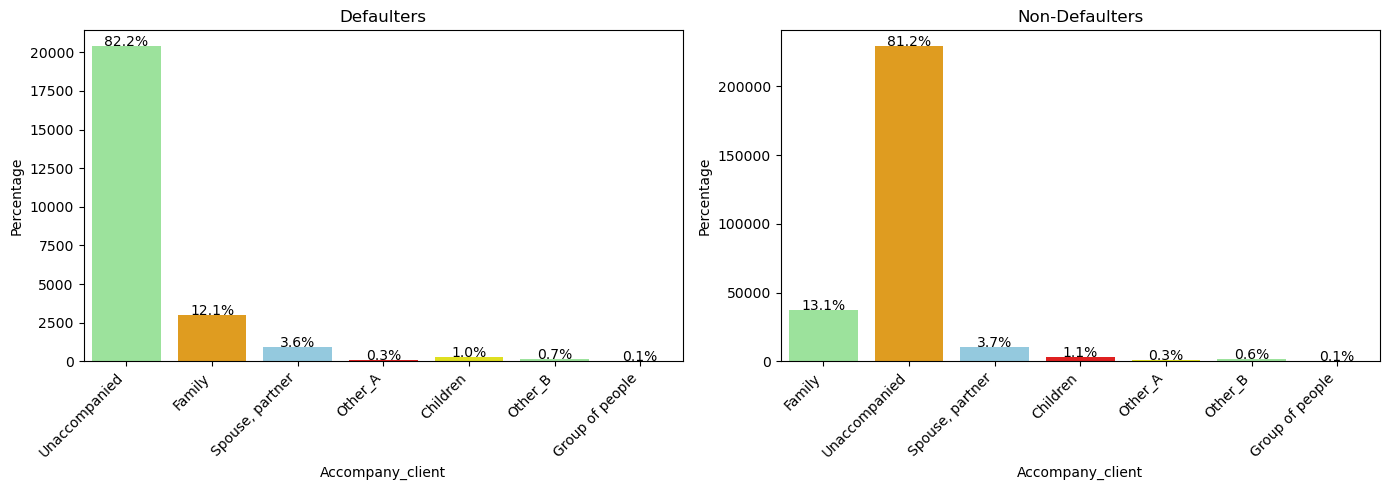

In [215]:
plt.figure(figsize=(14, 5))

# Defaulters
plt.subplot(1, 2, 1)
total = len(application_data_1)  # Total count of defaulters
ax = sns.countplot(x='Accompany_client', data=application_data_1, 
                   palette=['lightgreen', 'orange', 'skyblue', 'red', 'yellow'])

# Adding percentages on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 2, 
            f'{100 * height / total:.1f}%', ha='center')

plt.title('Defaulters')
ax.set(xlabel='Accompany_client', ylabel='Percentage')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Non-Defaulters
plt.subplot(1, 2, 2)
total = len(application_data_0)  # Total count of non-defaulters
ax = sns.countplot(x='Accompany_client', data=application_data_0, 
                   palette=['lightgreen', 'orange', 'skyblue', 'red', 'yellow'])

# Adding percentages on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 2, 
            f'{100 * height / total:.1f}%', ha='center')

plt.title('Non-Defaulters')
ax.set(xlabel='Accompany_client', ylabel='Percentage')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.tight_layout()
plt.show()

**Observations**
- The data implies that whether a client is accompanied or not has little impact on default rates.
- The small difference in family-accompanied clients between defaulters and non-defaulters suggests some potential positive influence of family support.
- Other categories have negligible effects on default rates.

**-----------------------------------------------------------------------------------------------------------------------**

**DEFAULTERS AND NON-DEFAULTERS ON THE BASIS OF OCCUPATION TYPE**

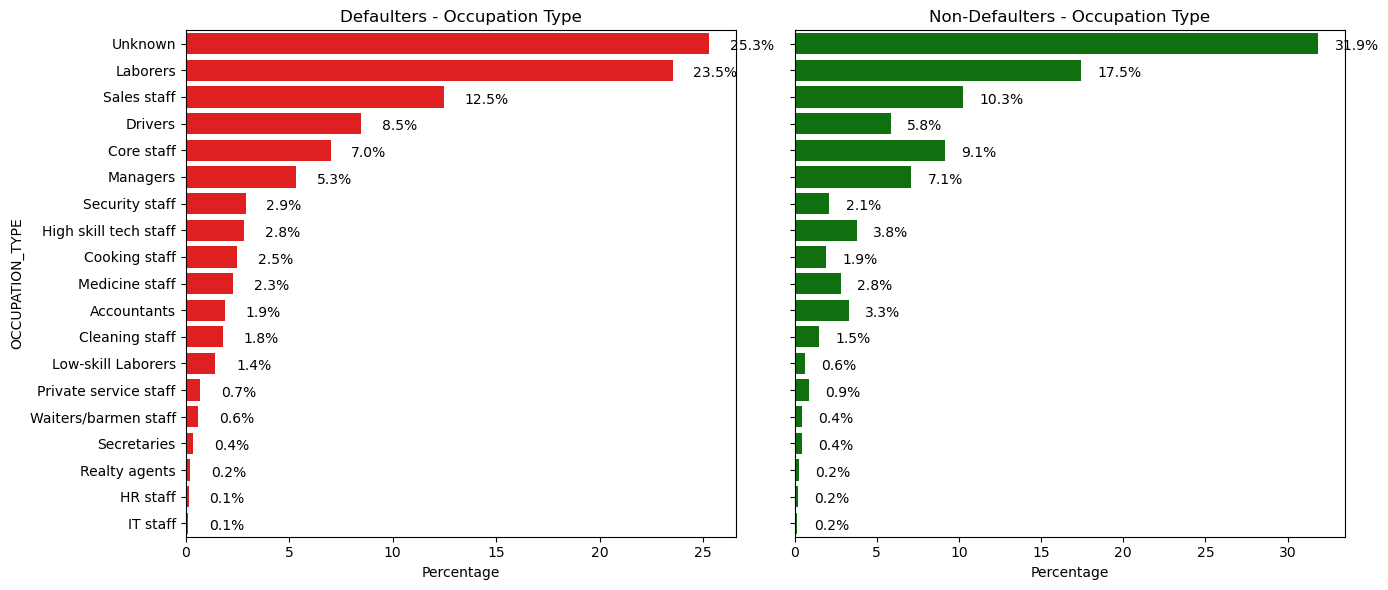

In [216]:
# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for Defaulters
df1_counts = application_data_1["OCCUPATION_TYPE"].value_counts(normalize=True) * 100
sns.barplot(x=df1_counts.values, y=df1_counts.index, ax=axes[0], color="red")
axes[0].set_title("Defaulters - Occupation Type")
axes[0].set_xlabel("Percentage")

# Plot for Non-Defaulters
df0_counts = application_data_0["OCCUPATION_TYPE"].value_counts(normalize=True) * 100
sns.barplot(x=df0_counts.values, y=df0_counts.index, ax=axes[1], color="green")
axes[1].set_title("Non-Defaulters - Occupation Type")
axes[1].set_xlabel("Percentage")

# Add percentage labels
for ax in axes:
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.1f}%', (p.get_width() + 1, p.get_y() + 0.5), ha='left', va='center')

plt.tight_layout()
plt.show()

**Observations**
- "Unknown" Occupation is Highly Prevalent Among Both Groups
> The largest group in both defaulters (25.3%) and non-defaulters (31.9%) falls under "Unknown."
> This suggests missing or unreported data, which could indicate a need for better data collection.

- Laborers Have High Default Rates
> 23.5% of defaulters are laborers, while only 17.5% of non-defaulters belong to this category.
> This suggests that individuals in manual labor jobs may have higher financial instability or lower income stability, leading to a higher default rate.

- Core Staff Have More Stable Repayment Behavior
> Core staff (7%) and managers (5.3%) form a notable portion of defaulters, but their share among non-defaulters is higher (9.1% for core staff and 7.1% for managers).
> This suggests that individuals in these roles are generally more financially stable but some still default due to external factors.

- Drivers Have a Higher Default Rate
> Sales staff (12.5%) and drivers (8.5%) have a significant presence among defaulters.
> In contrast, their share among non-defaulters is 10.3% (sales staff) and 5.8% (drivers), indicating these professions may have irregular incomes affecting repayment ability.

- Other Low-Skill Jobs Have a Small Impact
> Categories like Cleaning Staff, Realty Agents, Waiters/Barmen, IT Staff, and HR Staff have low percentages in both groups. These occupations don’t seem to have a significant impact on default rates.

- Key Takeaways
> Laborers are the highest-risk group for defaulting.
> Core staff and managers show financial stability, but some still default.

### Segmented Univariate analysis for ordered categorical variables

**DEFAULTERS AND NON-DEFAULTERS ON THE BASIS OF INCOME GROUP**

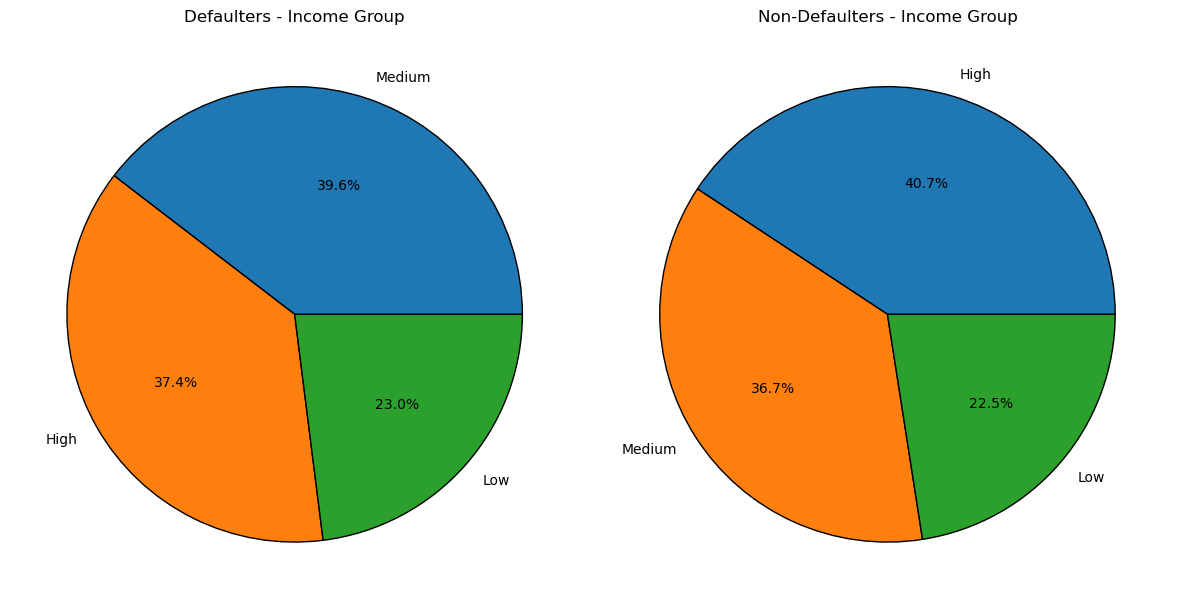

In [217]:
# Define figure size
plt.figure(figsize=(12, 6))

# Plot pie chart for Defaulters
plt.subplot(1, 2, 1)
application_data_1['income_group'].value_counts().plot(
    kind='pie',autopct='%1.1f%%', startangle=0, wedgeprops={'edgecolor': 'black'}
)
plt.title('Defaulters - Income Group')
plt.ylabel('')  # Hide y-label

# Plot pie chart for Non-Defaulters
plt.subplot(1, 2, 2)
application_data_0['income_group'].value_counts().plot(
    kind='pie',autopct='%1.1f%%', startangle=0, wedgeprops={'edgecolor': 'black'}
)
plt.title('Non-Defaulters - Income Group')
plt.ylabel('')  # Hide y-label

# Show the plot
plt.tight_layout()
plt.show()

**Observations**
- Distribution Similarity 
> The income distribution between defaulters and non-defaulters is quite similar, with only minor percentage differences among the three income groups. Medium-income individuals form the largest proportion in both defaulters (39.6%) and non-defaulters (40.7%). High-income individuals make up 37.4% of defaulters and 36.7% of non-defaulters, indicating a small difference. Low-income individuals are slightly more prevalent among defaulters (23.0%) compared to non-defaulters (22.5%).
- No Strong Correlation Between Income Level and Defaulting 
> Since the proportions between defaulters and non-defaulters remain almost the same across all three income levels, it suggests that income alone may not be a strong predictor of loan default. Other factors, such as debt-to-income ratio, financial management habits, employment stability, and credit behavior, might play a more crucial role.
- Medium-Income Group Shows Slightly Higher Default Rates 
> The medium-income group among defaulters (39.6%) is slightly lower than non-defaulters (40.7%), which could indicate that this group faces moderate financial risks but is still largely able to manage their debt.

**Conclusion**
- The income group alone is not a significant differentiator between defaulters and non-defaulters. Further analysis incorporating factors like loan amount, credit history, debt-to-income ratio, and spending habits would provide more meaningful insights into default risk.

**--------------------------------------------------------------------------------------------------------------------------**

**DEFAULTERS AND NON-DEFAULTERS ON THE BASIS OF CREDIT GROUP**

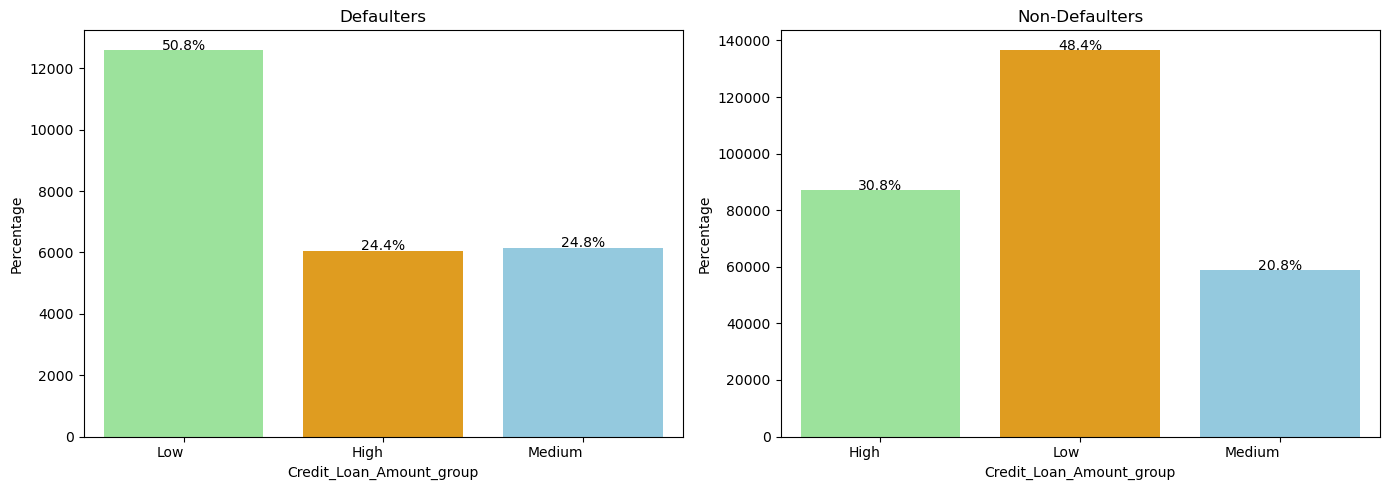

In [218]:
plt.figure(figsize=(14, 5))

# Defaulters
plt.subplot(1, 2, 1)
total = len(application_data_1)  # Total count of defaulters
ax = sns.countplot(x='Credit_Loan_Amount_group', data=application_data_1, 
                   palette=['lightgreen', 'orange', 'skyblue'])

# Adding percentages on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 2, 
            f'{100 * height / total:.1f}%', ha='center')

plt.title('Defaulters')
ax.set(xlabel='Credit_Loan_Amount_group', ylabel='Percentage')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')

# Non-Defaulters
plt.subplot(1, 2, 2)
total = len(application_data_0)  # Total count of non-defaulters
ax = sns.countplot(x='Credit_Loan_Amount_group', data=application_data_0, 
                   palette=['lightgreen', 'orange', 'skyblue'])

# Adding percentages on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 2, 
            f'{100 * height / total:.1f}%', ha='center')

plt.title('Non-Defaulters')
ax.set(xlabel='Credit_Loan_Amount_group', ylabel='Percentage')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, horizontalalignment='right')

plt.tight_layout()
plt.show()

**Observation**

- Defaulters are Predominantly in the Low Loan Amount Category
50.8% of defaulters took low loan amounts.
Medium and high loan categories have almost equal shares (24.8% and 24.4%).
This suggests that borrowers with smaller loans are more likely to default, possibly due to financial instability or lack of repayment capacity.
- Non-Defaulters Also Have the Highest Percentage in Low Loan Amounts
48.4% of non-defaulters fall in the low loan amount category.
30.8% of non-defaulters belong to the high loan amount category.
This indicates that borrowers with lower loans generally have a mixed default pattern, but a higher percentage of high-loan borrowers tend to repay successfully.
- High Loan Borrowers are More Likely to Repay
Only 24.4% of defaulters took high loan amounts, compared to 30.8% of non-defaulters.
This suggests that borrowers taking high loans are more financially responsible or have better creditworthiness, making them less likely to default.
- Medium Loan Amount Borrowers are Balanced in Both Groups
The medium loan category has nearly similar percentages for defaulters (24.8%) and non-defaulters (20.8%).
This suggests that medium-loan borrowers have a moderate risk profile.

**Key Takeaways:**
✅ Small loan borrowers have the highest risk of default.

✅ High loan borrowers are more likely to repay their loans successfully.

✅ Medium loan borrowers have an average risk level.

**-----------------------------------------------------------------------------------------------------------------------**

**DEFAULTERS AND NON-DEFAULTERS ON THE BASIS OF NORMALISED SCORE FROM EXTERNAL DATA SOURCE**

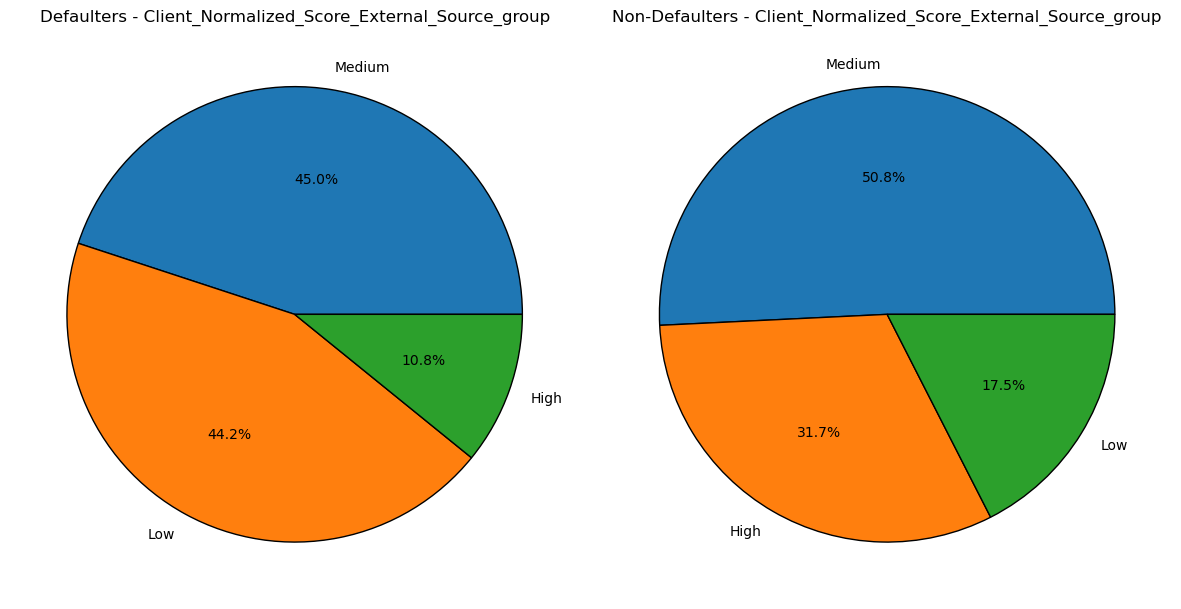

In [219]:
# Define figure size
plt.figure(figsize=(12, 6))

# Plot pie chart for Defaulters
plt.subplot(1, 2, 1)
application_data_1['Client_Normalized_Score_External_Source_group'].value_counts().plot(
    kind='pie',autopct='%1.1f%%', startangle=0, wedgeprops={'edgecolor': 'black'}
)
plt.title('Defaulters - Client_Normalized_Score_External_Source_group')
plt.ylabel('')  # Hide y-label

# Plot pie chart for Non-Defaulters
plt.subplot(1, 2, 2)
application_data_0['Client_Normalized_Score_External_Source_group'].value_counts().plot(
    kind='pie',autopct='%1.1f%%', startangle=0, wedgeprops={'edgecolor': 'black'}
)
plt.title('Non-Defaulters - Client_Normalized_Score_External_Source_group')
plt.ylabel('')  # Hide y-label

# Show the plot
plt.tight_layout()
plt.show()

**Observations**
- Defaulters Mostly Belong to Low & Medium Score Categories
1. 45.0% of defaulters have a medium external credit score.
2. 44.2% of defaulters have a low external credit score.
3. Only 10.8% of defaulters have a high external credit score.
4. This suggests that borrowers with low external credit scores are at a significantly higher risk of default.

- Non-Defaulters Have Higher External Scores
1. 50.8% of non-defaulters have a medium external score.
2. 31.7% of non-defaulters have a high external score (compared to only 10.8% in defaulters).
3. Only 17.5% of non-defaulters have a low external score.
4. This confirms that higher external credit scores strongly correlate with responsible repayment behavior.

- Comparison Between Defaulters & Non-Defaulters
1. Defaulters have a much higher proportion of low-score borrowers (44.2%) than non-defaulters (17.5%).
2. Non-defaulters have a much higher proportion of high-score borrowers (31.7%) than defaulters (10.8%).
3. The medium score group is the largest for both, but non-defaulters have a larger share (50.8%) compared to defaulters (45.0%).

**Key Takeaways:**
✅ Borrowers with low external credit scores are at a higher risk of default.

✅ A high external credit score is a strong indicator of repayment reliability.

✅ The medium credit score group has a mixed risk profile, so lenders should assess them carefully with additional factors.                                                                                          

### Univariate analysis for continuous variables

In [220]:
new_List = []
for i in application_data.columns:
    if application_data_1[i].dtype in ("float64", "int64"):
        new_List.append(i)

new_List

['Loan_ID',
 'FLAG_Defalter',
 'Client_Children',
 'Annual_Income',
 'Credit_Loan_Amount',
 'Loan_Annuity',
 'Goods_Price',
 'Client_region_population',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_EMP_PHONE_1_YES_0_NO',
 'FLAG_HOME_PHONE_1_YES_0_NO',
 'FLAG_PHONE_1_YES_0_NO',
 'Client_Family_Members',
 'Client_Region_Rating',
 'Client_Region_&_City_Rating',
 'Hour_of_Application',
 'FLAG_Client_Permanent_address_not_match_work_address_city',
 'FLAG_Client_Contact_address_not_match_work_address_city',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_3',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR',
 'Age',
 'YEARS_EMPLOYED',
 'Client_Normalized_Score_External_Source']

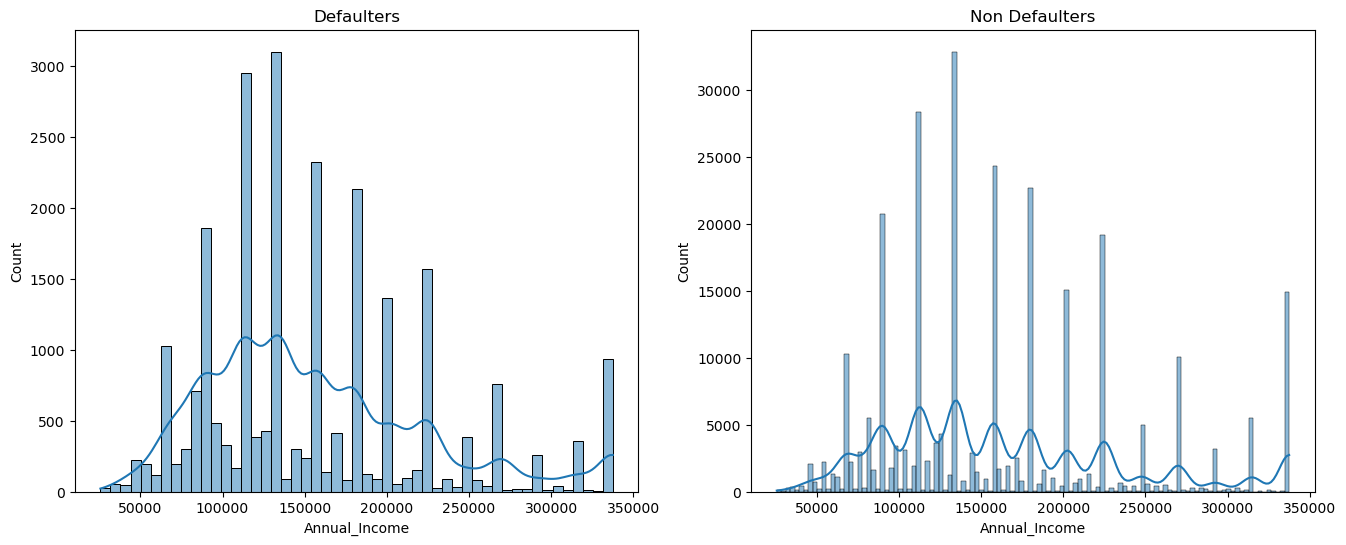

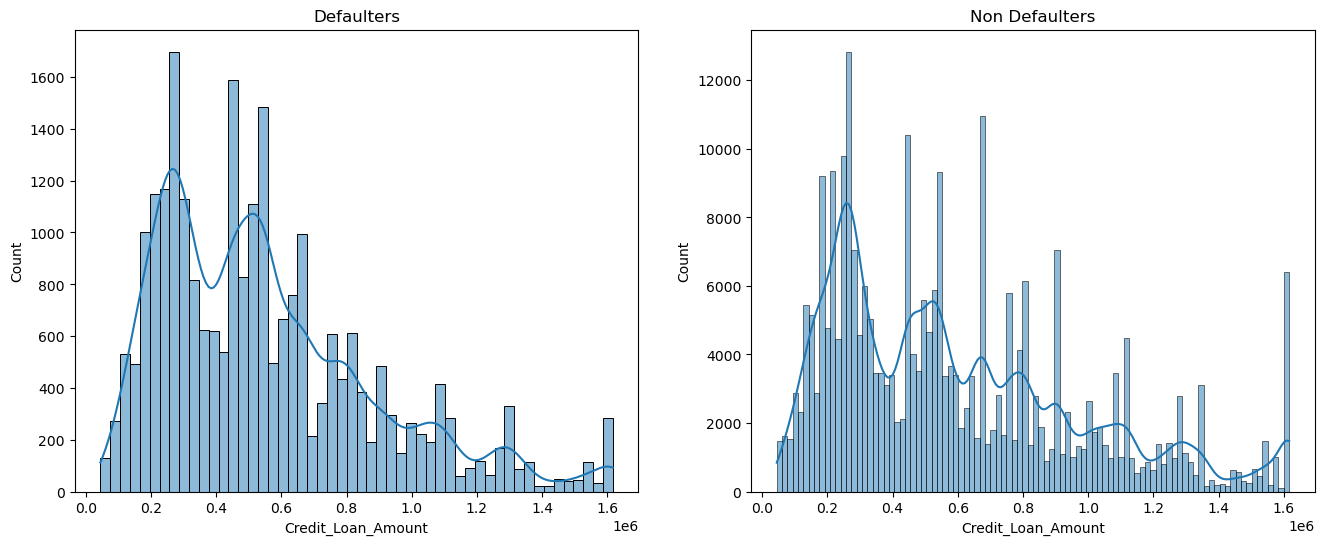

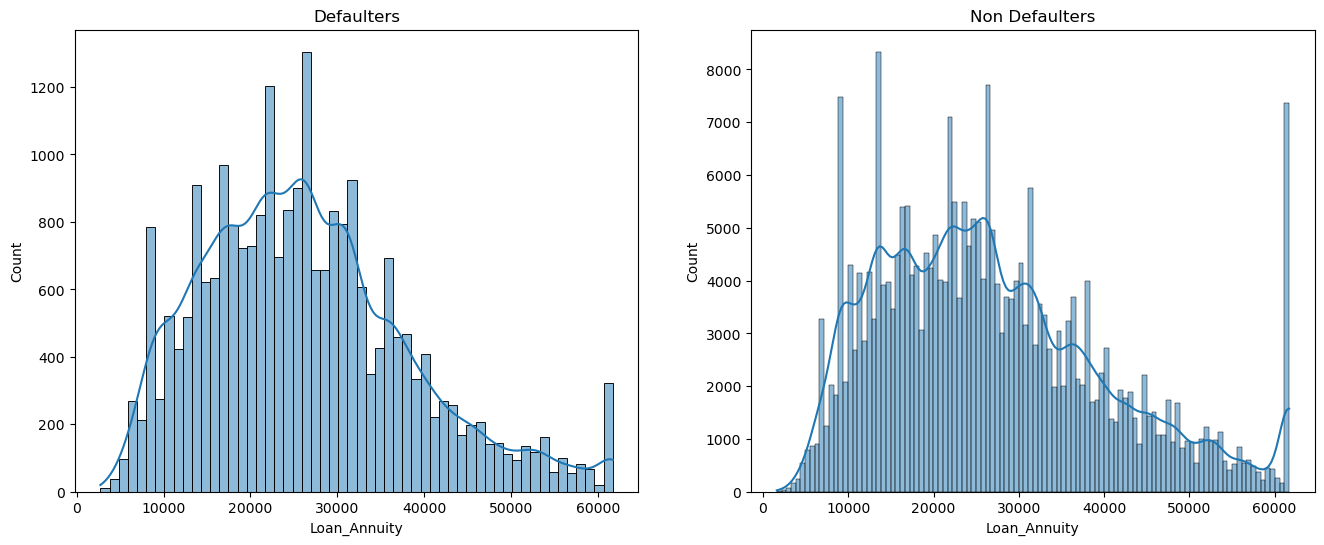

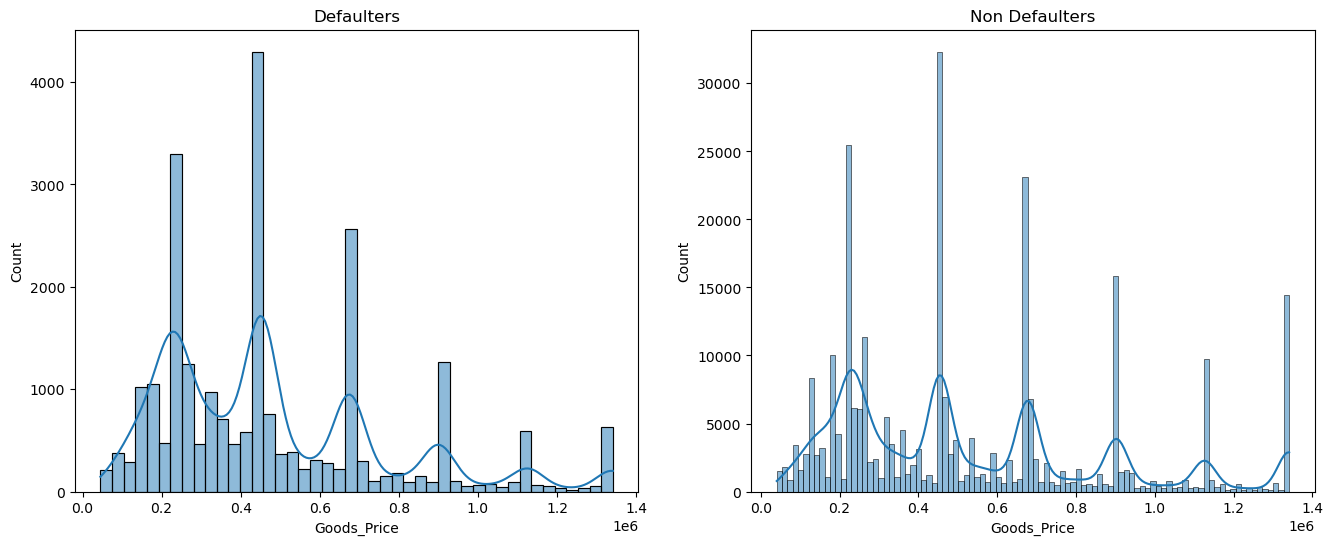

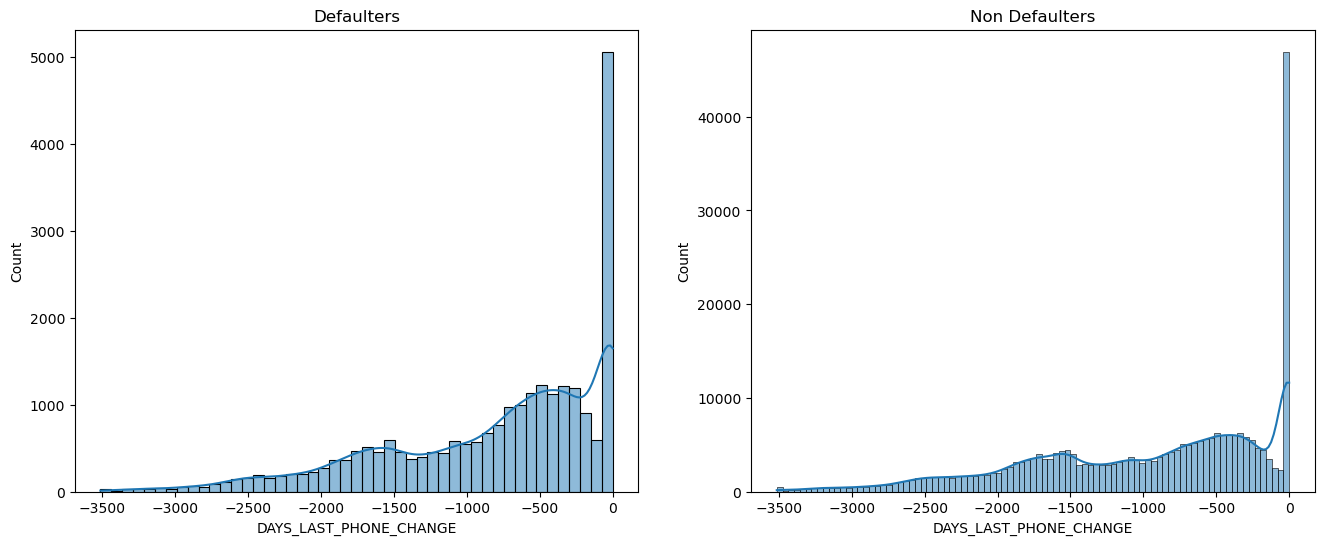

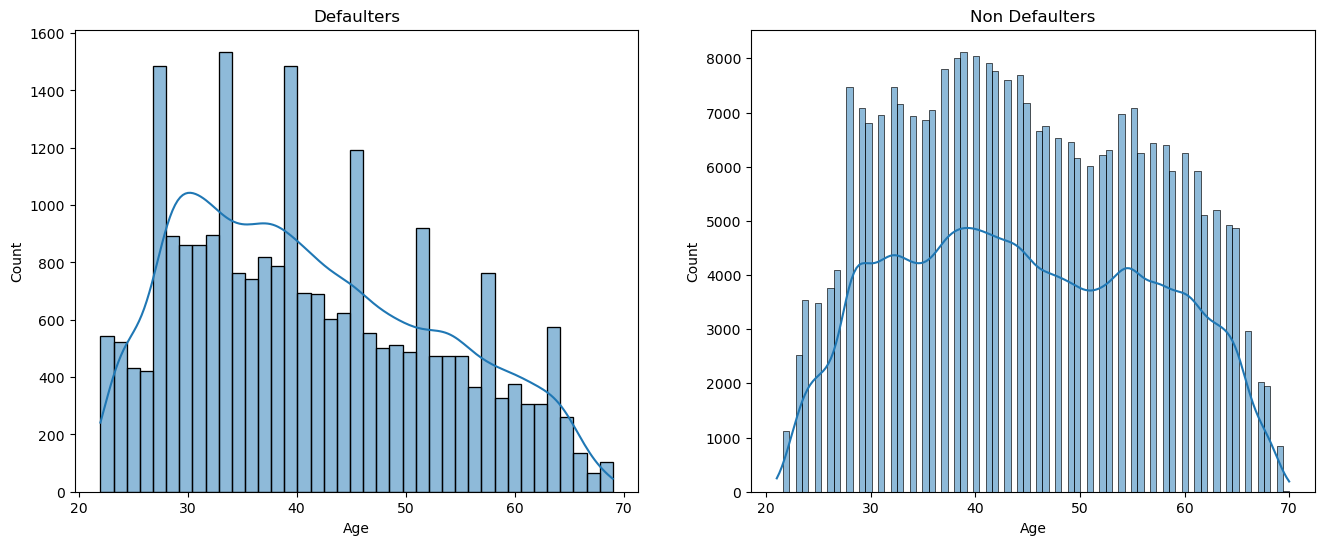

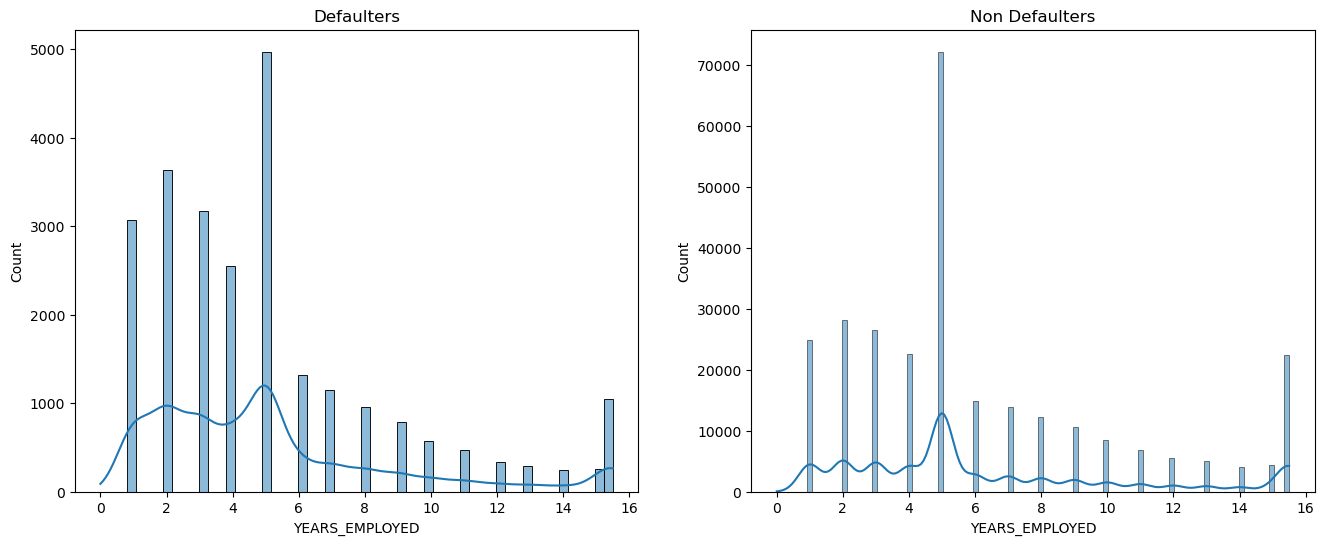

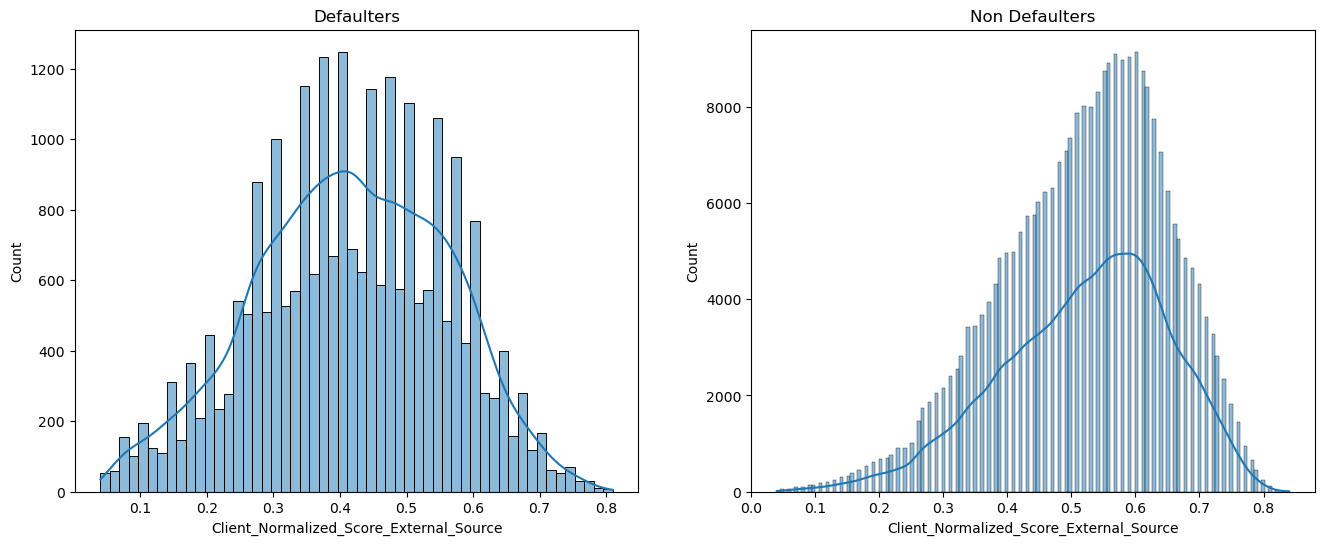

In [221]:
#Considering relevant columns which could potentially establish a relationship with the defaulters

updated_list = [
 'Annual_Income',
 'Credit_Loan_Amount',
 'Loan_Annuity',
 'Goods_Price',
 'DAYS_LAST_PHONE_CHANGE',
 'Age',
 'YEARS_EMPLOYED',
 'Client_Normalized_Score_External_Source']

for i in updated_list:
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1) 
    plt.title('Defaulters')
    sns.histplot(application_data_1[i],kde=True)


    plt.subplot(1,2,2) 
    plt.title('Non Defaulters')
    sns.histplot(application_data_0[i],kde=True)
    plt.show()

In [222]:
#Considering relevant columns which could potentially eshtablish a relationship with the deflauters

# updated_list = [
#  'Annual_Income',
#  'Credit_Loan_Amount',
#  'Loan_Annuity',
#  'Goods_Price',
#  'DAYS_LAST_PHONE_CHANGE',
#  'Age',
#  'YEARS_EMPLOYED',
#  'Client_Normalized_Score_External_Source']

# for i in updated_list:
#     plt.figure(figsize=(16,6))
#     plt.subplot(1,2,1) 
#     plt.title('Defaulters')
#     sns.histplot(application_data_1[i])


#     plt.subplot(1,2,2) 
#     plt.title('Non Defaulters')
#     sns.histplot(application_data_0[i])
#     plt.show()

**Observations from the above graphs**

**1. Annual_Income**

✅ Defaulters (Left Chart):
> The distribution peaks around 
150,000 but is more spread out, meaning defaulters exist across a wider income range.
A gradual decline in density beyond $150,000, but some defaulters still have high incomes (above 200,000).
More presence of defaulters in lower-income brackets (<75,000) compared to non-defaulters.

✅ Non-Defaulters (Right Chart):
> Multiple sharp peaks across different income levels, suggesting income segmentation among non-defaulters.
Higher density in mid-to-high income groups (~100,000 - 200,000), indicating financial stability among non-defaulters.
Fewer non-defaulters in lower-income brackets (<50,000) compared to defaulters

Recommendations:

📌 Lower income increases default risk – Defaulters are more concentrated in lower-income brackets (<$75,000), suggesting financial instability or difficulty in repayment.

📌 Non-defaulters tend to have a more structured income segmentation, reinforcing the idea that higher income is correlated with lower default rates.

📌 High-income defaulters (> $200,000) still exist, indicating that income alone is not a perfect predictor of default risk.

📌 Lenders should use a combination of income, employment stability, and credit history to assess risk, rather than relying solely on annual income.

**2. Credit Loan Amount**

- Loan Amount Distribution is Similar for Both Groups. Both defaulters and non-defaulters have a bimodal distribution (two peaks). The first peak is around 250,000 and the second peak around 500,000. This suggests that most loans issued fall within these ranges.

Recommendations:

📌 If you’re a lender, monitor loans in the range of 200,000 - 500,000 closely, as both defaulters and non-defaulters frequently take loans in this range.

📌 Clients taking very large loans (above 750,000) are less likely to default.

📌 Consider additional risk assessments for medium-sized loans (250,000 - 600,000), as they form the bulk of defaulters.

**3. Loan Annuity (The periodic payment made on a loan)**
- There is no significant difference in loan annuity patterns between defaulters and non-defaulters.

- Default rates might not be strongly dependent on annuity amounts alone.

**4. Goods Price Distribution**
- The distribution is multimodal, meaning there are multiple peaks at different price points.

- Both defaulters and non-defaulters have peaks at similar price points (~200k, ~400k, ~600k, and so on).

- The shape of both distributions is nearly identical, suggesting that default behavior is not strongly correlated with the price of goods purchased i.e., it does not significantly distinguish defaulters from non-defaulters.

**5. DAYS_LAST_PHONE_CHANGE**
- Frequent phone changes (close to 0 days) might indicate a risky behavior, possibly linked to fraud or financial instability.

- The similarity in distributions suggests that phone change frequency alone may not be a strong predictor of default risk.

**6. Age Distribution**
- Defaulters tend to be younger, with a peak around 30 years and gradually declining as age increases.

- Non-defaulters show a broader age distribution, with peaks around 30-35 years and another at 50+ years.

- There are fewer older defaulters, indicating that older individuals may have more stable financial habits or experience.

> Key Insight & Recommendations

📌Younger individuals (20-40 years) are more likely to default, possibly due to lower financial experience, lower income stability, or higher spending habits.

📌Older individuals (50+ years) are less likely to default, suggesting they have better financial discipline, accumulated wealth, or stable employment.

📌Lending institutions should focus on financial literacy and risk assessment for younger borrowers to minimize default rates.

**7. Years Employed**
- Both defaulters and non-defaulters show peaks around 0-5 years of employment, indicating that a large proportion of borrowers have low job tenure.

- Non-defaulters have a sharper peak at around 5 years, suggesting that stable employment is associated with a lower likelihood of default.

- Defaulters have a broader distribution beyond 5 years, meaning some long-employed individuals also default, but at lower densities.

- Both groups show a small peak around 15 years, likely representing senior employees with longer work histories.

> Key Insight & Recommendations

📌Shorter employment tenure (0-5 years) is associated with higher default risk, likely due to job instability or lower income consistency.

📌Borrowers with stable jobs (5+ years) tend to be non-defaulters, supporting the idea that employment stability is a key credit risk factor.

📌Lenders may need to impose stricter eligibility criteria for applicants with less than 2 years of employment, or require additional financial guarantees.

**8. Client Normalized Credit Score**
- Non-defaulters have higher credit scores, with a peak around 0.5, and a more right-skewed distribution extending towards higher creditworthiness (>0.6).

- Defaulters have a similar peak (~0.4-0.5) but a more left-skewed distribution, indicating many defaulters have lower credit scores.

- The overlap in distributions suggests that some defaulters still have moderate credit scores, reinforcing the need for multi-factor risk assessment.

> Key Insight & Recommendations

📌Higher credit scores correlate with lower default risk, meaning credit score remains a strong predictor for loan performance.

📌Defaulters still exist across various credit score levels, meaning lenders should not rely solely on credit scores for risk assessment.

📌Combining credit score with employment duration and income can improve risk prediction models.

### Bivariate analysis

**Correlation of relevant numerical columns**

In [223]:
# Listing the relevant columns for finding corelation (Note: Coorelation is found only on numric columns)
corr_cols = ['Annual_Income','Credit_Loan_Amount','Loan_Annuity','Goods_Price','Age','Client_Normalized_Score_External_Source']

In [224]:
# Creating dataframe for numerical columns
df_corr_col = application_data[corr_cols]
df_corr_col.head()

Annual_Income  Credit_Loan_Amount  Loan_Annuity  Goods_Price  Age  \
0       202500.0            406597.5       24700.5     351000.0   26   
1       270000.0           1293502.5       35698.5    1129500.0   46   
2        67500.0            135000.0        6750.0     135000.0   53   
3       135000.0            312682.5       29686.5     297000.0   53   
4       121500.0            513000.0       21865.5     513000.0   55   

   Client_Normalized_Score_External_Source  
0                                     0.20  
1                                     0.57  
2                                     0.64  
3                                     0.58  
4                                     0.42

In [225]:
# Corelation matrix
df_corr_col.corr() 

Annual_Income  Credit_Loan_Amount  \
Annual_Income                                 1.000000            0.410773   
Credit_Loan_Amount                            0.410773            1.000000   
Loan_Annuity                                  0.489142            0.792465   
Goods_Price                                   0.414029            0.985325   
Age                                          -0.078125            0.057438   
Client_Normalized_Score_External_Source       0.072627            0.116710   

                                         Loan_Annuity  Goods_Price       Age  \
Annual_Income                                0.489142     0.414029 -0.078125   
Credit_Loan_Amount                           0.792465     0.985325  0.057438   
Loan_Annuity                                 1.000000     0.794666 -0.011985   
Goods_Price                                  0.794666     1.000000  0.056594   
Age                                         -0.011985     0.056594  1.000000   
Client_Normalized_Score_External_Source      0.104084     0.124676  0.181610   

                                         Client_Normalized_Score_External_Source  
Annual_Income                                                           0.072627  
Credit_Loan_Amount                                                      0.116710  
Loan_Annuity                                                            0.104084  
Goods_Price                                                             0.124676  
Age                                                                     0.181610  
Client_Normalized_Score_External_Source                                 1.000000

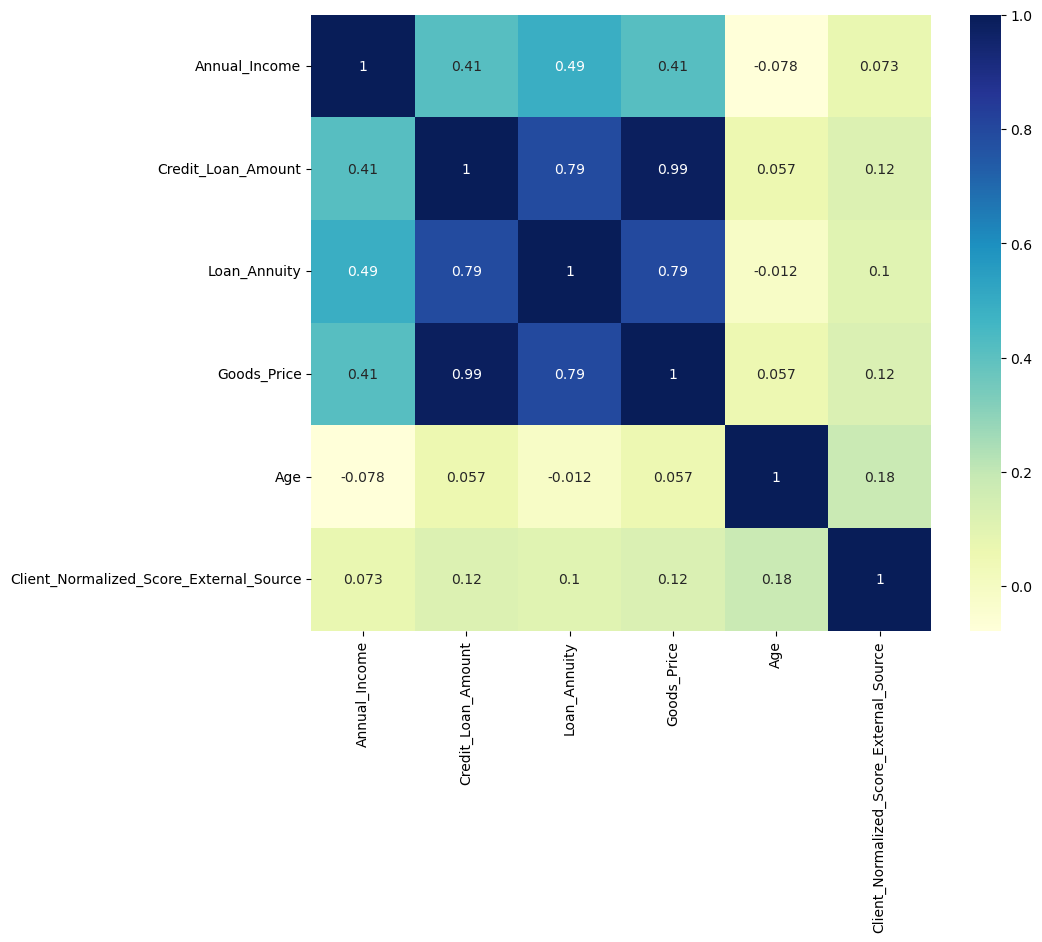

In [226]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_col.corr(),cmap="YlGnBu",annot=True)
plt.show()

**Highly correlated columns**
- Credit_Loan_Amount and Loan_Annuity (0.79)
- Credit_Loan_Amount and Goods_Price (0.99)
- Loan_Annuity and Goods_Price (0.79)

### Bivariate analysis of continuous variable

**Analyze the credit amount of loans in relation to client income, segmented by gender (male and female)**

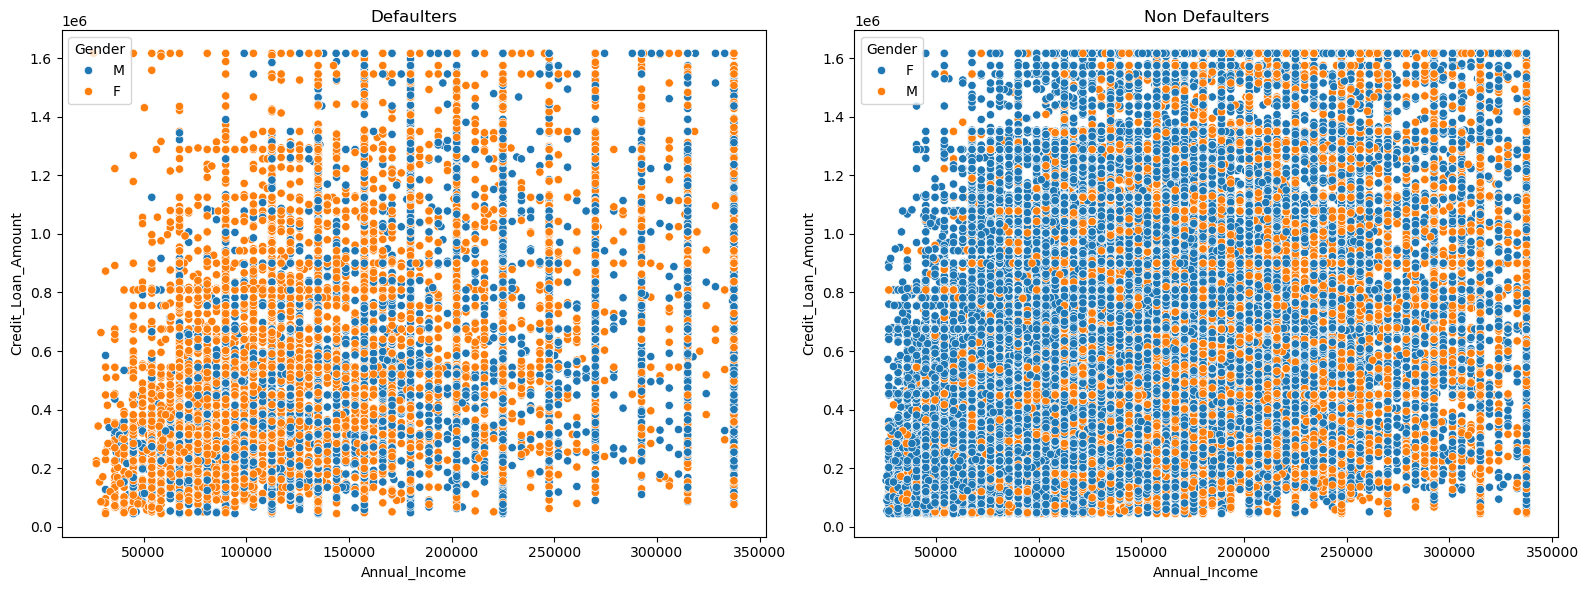

In [227]:
# Assuming df_application_data_1 and df_application_data_0 are defined DataFrames
plt.figure(figsize=(16, 6))

# First subplot for Defaulters
plt.subplot(1, 2, 1)
ax = sns.scatterplot(x='Annual_Income', y='Credit_Loan_Amount', hue='Gender', data=application_data_1)
plt.title('Defaulters')

# Second subplot for Non-Defaulters
plt.subplot(1, 2, 2)
ax = sns.scatterplot(x='Annual_Income', y='Credit_Loan_Amount', hue='Gender', data=application_data_0)
plt.title('Non Defaulters')

# Show the plots
plt.tight_layout()  # Adjusts subplot params for better spacing
plt.show()

**Observations**
- Defaulters (Left Plot)
> Income–Loan Relationship:
While there’s a general trend where higher annual income is associated with higher loan amounts, defaulters are densely clustered at lower income levels and lower-to-moderate loan amounts.

> Gender Patterns:
Both male and female defaulters appear across the range, but there’s no strong visual dominance of one gender in high-loan, high-income ranges.
The spread is more even in the mid-range income levels, but at very low income and low loans, both genders are heavily represented.

- Non-Defaulters (Right Plot)
> Income–Loan Relationship:
A clearer upward trend is visible — higher annual income correlates with higher credit loan amounts more strongly compared to defaulters.

> Gender Patterns:
Females (blue) seem more frequent across the entire income spectrum, especially in mid to high incomes, while males (orange) are slightly less frequent but still well-represented.

**Analyze the relationship between loan credit amounts and goods prices, segmented by gender (male and female)**

In [228]:
plt.figure(figsize=(16, 6))

# First subplot for Defaulters
plt.subplot(1, 2, 1)
ax = sns.scatterplot(x='Goods_Price', y='Credit_Loan_Amount', hue='Gender', data=application_data_1)
plt.title('Defaulters')

# Second subplot for Non-Defaulters
plt.subplot(1, 2, 2)
ax = sns.scatterplot(x='Goods_Price', y='Credit_Loan_Amount', hue='Gender', data=application_data_0)
plt.title('Non Defaulters')

# Show the plots
plt.tight_layout()  # Adjusts subplot params for better spacing
plt.show()

**Observations**
- Defaulters (Left Plot)
Relationship Pattern:
There is a strong positive linear correlation between Goods Price and Credit Loan Amount. Most points fall very close to the diagonal, indicating that loan amounts are often nearly equal to the price of goods.

> Implication:
This pattern suggests that defaulters tend to finance goods almost entirely through loans, leaving little or no down payment. This can be a sign of limited financial reserves or overreliance on credit.

> Gender Distribution:
Both male and female defaulters follow the same proportional borrowing trend, with no major differences in distribution.

- Non-Defaulters (Right Plot)
Relationship Pattern:
While there’s still a clear positive correlation between goods price and loan amount, the spread is wider compared to defaulters. Many non-defaulters have loan amounts significantly below the goods price, suggesting partial payment from other sources (savings, other credit lines, etc.).

> Implication:
Non-defaulters appear to practice better debt management, relying less on full financing and possibly having higher disposable income or better financial planning.

> Gender Distribution:
Both genders are well-represented across the range. The pattern is consistent between males and females, though females seem slightly more common in mid-to-high goods price ranges with moderate loan amounts.

### Bivariate analysis of categorical variable

**Analyze the credit loan amounts across different categories**

In [229]:
categories = ['Loan_Type', 'Gender', 'Own_Car', 'Own_House', 'Client_Profession',
       'Client_Education', 'Client_Marital_Status', 'Client_House_Status', 'income_group', 
               'AGE_GROUP']

In [232]:
# plotting for Defaulters
plt.figure(figsize=(30,40))

for i, category in enumerate(categories):
    ax = plt.subplot(4,3,i+1)
    sns.boxplot(x=category, y='Credit_Loan_Amount', data=application_data_1, palette='Set2')
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
    
plt.show()

**Observations**
- Loan Type vs Credit Loan Amount
> Observation:
Cash loans have a much wider range of credit amounts compared to revolving loans. The median loan amount for cash loans is significantly higher, and the spread shows more high-value outliers.

> Implication:
Cash loans may be taken for larger, one-time expenses, whereas revolving loans are generally for smaller amounts and ongoing credit lines.

- Gender vs Credit Loan Amount
> Observation:
Both male and female clients have similar median loan amounts and interquartile ranges. The spread of loan amounts and presence of outliers are also very similar across genders.

> Implication:
Gender does not appear to have a significant influence on the size of the credit loan amount, suggesting loan approval amounts are likely based on other factors (income, creditworthiness, collateral, etc.).

- Car Ownership vs Credit Loan Amount
> Observation:
Clients who own a car tend to have a slightly higher median loan amount compared to those who do not, although the overall spread is similar. Both groups exhibit high-value outliers.

> Implication:
Car ownership may correlate with slightly higher borrowing capacity, possibly due to greater collateral availability or higher income profiles.

- House Ownership vs Credit Loan Amount
> Observation:
The median loan amount is almost identical for clients who own a house and those who do not. The spread and range are also similar, with both groups showing a large number of high-value outliers.

> Implication:
House ownership does not appear to significantly influence the loan amount, suggesting that other factors (e.g., income, credit history) play a more dominant role in determining loan size.

- Occupation Type vs Credit Loan Amount
> Observation:
Maternity leave applicants have the highest median loan amount and widest range, indicating potentially higher borrowing despite possibly lower steady income.
State servants and commercial associates also tend to have higher median loan amounts.
Unemployed applicants have lower median loan amounts and narrower ranges.

> Implication:
Occupation type is a strong differentiator in loan amount distribution. Applicants with perceived job stability or specific benefits (e.g., government employees, maternity leave with financial support) tend to secure higher loans.

- Education Level vs Credit Loan Amount
> Observation:
Academic degree holders have the highest median loan amounts and the largest upper ranges, followed by higher education.
Lower secondary education holders have the lowest median and narrower ranges.
Other education levels (secondary special, incomplete higher) fall in between.

> Implication:
Education level is positively correlated with loan amount — higher educational attainment likely contributes to higher income potential and creditworthiness, resulting in larger approved loans.

- Client Marital Status vs Credit Loan Amount
> Observation:
Married clients have the highest median loan amounts compared to other marital statuses, followed by widows and those in civil marriages. Single and separated clients generally have lower median amounts. The spread is wide in all groups, with substantial high-value outliers.

> Implication:
Marital status may influence loan amounts, potentially reflecting differences in household income stability and perceived repayment ability.

- Client House Status vs Credit Loan Amount
> Observation:
Clients living in office apartments and municipal apartments show relatively high median loan amounts compared to other groups. Those living with parents tend to have lower median loan amounts. The range of values is large for all categories, with many high-value outliers.

> Implication:
House status appears to be associated with loan size — certain living arrangements, possibly linked to employment or income benefits, might increase borrowing capacity.

- Income Group vs Credit Loan Amount
> Observation:
High-income clients have the highest median loan amounts and the widest range, while low-income clients have the smallest median loan amounts. The difference between high and medium income is significant, but the difference between medium and low income is smaller in terms of median values.

> Implication:
Income group is strongly correlated with loan amount — higher income allows for larger loan approvals, as expected.

- Age Group vs Credit Loan Amount
> Observation:
Mid-aged clients have the highest median loan amounts, followed closely by senior clients.
Young clients have the lowest median loan amounts and a slightly narrower interquartile range.
All three age groups have similar maximum loan values, with a substantial number of high-value outliers.

> Implication:
Loan amounts tend to be higher for mid-aged and senior applicants, possibly due to greater financial stability, higher incomes, and longer credit histories. Younger applicants may have less borrowing capacity due to shorter credit histories or lower earnings.

In [233]:
# plotting for Non-Defaulters
plt.figure(figsize=(30,40))

for i, category in enumerate(categories):
    ax = plt.subplot(4,3,i+1)
    sns.boxplot(x=category, y='Credit_Loan_Amount', data=application_data_0, palette='Set2')
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
    
plt.show()

- Loan Type vs Credit Loan Amount
> Observation:
Cash loans have a much higher median loan amount compared to revolving loans.
Cash loans also show a wider spread and higher upper extremes, with fewer outliers relative to the scale.
Revolving loans have lower median and narrower ranges, with a cluster of outliers at the higher end.

> Implication:
Non-defaulters taking cash loans generally borrow larger amounts, suggesting these are often for major purchases or investments. Revolving loans are smaller and likely for short-term credit needs.

- Gender vs Credit Loan Amount
> Observation:
Median loan amounts for males and females are very similar.
The spread and range are also comparable, with both genders having similar outlier patterns.

> Implication:
Gender does not appear to significantly influence loan amounts among non-defaulters. Loan approvals for this group are likely based on financial capacity and repayment history rather than gender-related factors.

- Car Ownership vs Credit Loan Amount
> Observation:
Clients with a car tend to have a slightly higher median loan amount compared to those without.
The spread for car owners is slightly wider, suggesting a broader range of approved loan sizes.

> Implication:
Car ownership may slightly increase borrowing capacity for non-defaulters, possibly due to higher income levels or the car serving as collateral.

- House Ownership vs Credit Loan Amount
> Observation:
Median loan amounts are nearly identical for clients who own a house and those who do not.
The spread and range are very similar, with both categories having substantial high-value outliers.

> Implication:
House ownership does not appear to be a major differentiator in loan amounts for non-defaulters, suggesting that repayment reliability is strong in both groups.

- Occupation Type vs Credit Loan Amount
> Observation:
Businessmen and individuals on maternity leave have the highest median loan amounts, with wide spreads and higher upper ranges.
Unemployed clients also have relatively high medians for this group, which may be due to other financial resources or co-applicant influence.
Students have the lowest median loan amounts, as expected.
State servants and commercial associates are in the mid-range with relatively consistent spreads.

> Implication:
Certain occupations, especially those linked to higher income potential or business activity, are associated with larger loan sizes among non-defaulters.

- Education Level vs Credit Loan Amount
> Observation:
Academic degree holders have the highest median loan amounts and wide interquartile ranges.
Higher education is the next highest in terms of median.
Lower secondary education holders have the smallest median loan amounts.

> Implication:
Higher educational attainment correlates with larger loan approvals, likely due to better earning potential and creditworthiness.

- Client Marital Status vs Credit Loan Amount
> Observation:
Married clients have the highest median loan amounts, followed by those in civil marriages and separated clients.
Single/not married clients have lower median amounts compared to married clients.
All marital statuses show a wide spread of values and substantial high-value outliers.

> Implication:
Marriage or partnership may indicate greater household income stability, enabling higher loan approvals among non-defaulters.

- Client House Status vs Credit Loan Amount
> Observation:
Clients in house/apartment ownership and office apartments have relatively higher median loan amounts compared to other groups.
Rented apartment and with parents categories show lower medians.
Regardless of housing type, the maximum loan amounts are fairly similar, but the interquartile range is larger for those with owned or employer-provided housing.

> Implication:
Housing status may influence loan size, with owned or employer-provided housing being associated with larger loans, possibly due to perceived stability or collateral availability.

- Income Group vs Credit Loan Amount
> Observation:
High-income clients have the highest median loan amounts and widest spread.
Medium-income clients have moderately high medians but narrower spreads.
Low-income clients have the smallest median loan amounts and the least spread in the lower range, but still show occasional high-value outliers.

> Implication:
Income group is a strong determinant of loan size — higher income clearly correlates with larger loan approvals.

- Age Group vs Credit Loan Amount (Non-Defaulters)
> Observation:
Mid-aged clients have the highest median loan amounts and the widest interquartile range.
Senior clients have a slightly lower median compared to mid-aged clients but still maintain a wide spread of loan amounts.
Young clients have the lowest median loan amounts and the narrowest interquartile range among the three groups.
All age groups display high-value outliers, indicating that some individuals secure large loans regardless of age.

> Implication:
Age appears to influence loan amounts among non-defaulters, with mid-aged borrowers receiving the largest loans, likely due to peak earning potential and strong credit histories. Younger borrowers may have smaller loans due to shorter credit histories and lower incomes, while seniors maintain moderate borrowing capacity.

### Analyze the relationship between income group, gender, and loan default status

In [234]:
new_data_piviot11 = pd.pivot_table(application_data,index="income_group",columns="Gender",values="FLAG_Defalter")
new_data_piviot11

Gender               F         M
income_group                    
High          0.062819  0.089465
Low           0.074798  0.113229
Medium        0.072915  0.115274

In [235]:
plt.figure(figsize=(10,6))
sns.heatmap(new_data_piviot11, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Loan default relationship between income group & Gender", fontsize=14, fontweight='bold')
plt.show()

**Loan Default Relationship Between Income Group & Gender**
- High-Income Group:

> Female default rate: 6.3%

> Male default rate: 8.9%

> Insight: Default rates are lowest in this group for both genders, but males still show a higher rate than females.

- Medium-Income Group:
> Female default rate: 7.3%

> Male default rate: 12% (highest among all categories)

> Insight: Males in this income group have the highest observed default rate, suggesting possible over-leveraging or higher exposure to risky loans.

- Low-Income Group:

> Female default rate: 7.5%

> Male default rate: 11%

> Insight: Default rates are relatively high for both genders here, with males again having a notably higher risk.

### Analyze the relationship between income group, Client profession, and loan default status

In [236]:
pivot_table_1 = pd.pivot_table(application_data, values="FLAG_Defalter", index="income_group", columns="Client_Profession")
pivot_table_1

Client_Profession  Businessman  Commercial associate  Maternity leave  \
income_group                                                            
High                       0.0              0.067355         0.000000   
Low                        NaN              0.085946         0.666667   
Medium                     NaN              0.083326         0.000000   

Client_Profession  Pensioner  State servant  Student  Unemployed   Working  
income_group                                                                
High                0.053099       0.048035      0.0        0.00  0.089078  
Low                 0.052911       0.067985      0.0        0.50  0.100635  
Medium              0.055465       0.064863      0.0        0.25  0.099747

In [242]:
plt.figure(figsize=(8,5))
sns.heatmap(pivot_table_1, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Relationship between income group, Client profession, and loan default status", fontsize=14, fontweight='bold')
plt.show()

- High-Income Group
>Lowest default rates overall, with all professions showing values below 0.09.

>Working professionals (8.9%) and commercial associates (6.7%) have the highest defaults in this group, but rates remain low.

>Several professions (Businessman, Maternity leave, Student, Unemployed) show 0% defaults, indicating strong repayment capacity at high income levels.

- Medium-Income Group
> Default rates are generally low (<0.11) except for:

> Unemployed clients: 25% default rate, indicating high vulnerability in this income tier.

> Professions like commercial associates, maternity leave, and students record 0% defaults, suggesting good repayment behavior in this bracket.

- Low-Income Group
> Highest default rates overall.

> Maternity leave: 67% default rate — the highest across all groups, signaling significant repayment challenges.

> Unemployed: 50% default rate, also critically high.

> Commercial associates (8.6%), working professionals (10%), and state servants (6.8%) fare better but still have elevated risk compared to higher income groups.

### Analyze the relationship between Client marital status, credit loan amount group, and loan default status

In [241]:
pivot_table_Marital = pd.pivot_table(application_data, values="FLAG_Defalter", index="Credit_Loan_Amount_group", columns="Client_Marital_Status")
pivot_table_Marital

Client_Marital_Status     Civil marriage   Married  Separated  \
Credit_Loan_Amount_group                                        
High                            0.075877  0.062182   0.065269   
Low                             0.104637  0.078855   0.083969   
Medium                          0.112646  0.090717   0.096819   

Client_Marital_Status     Single / not married     Widow  
Credit_Loan_Amount_group                                  
High                                  0.078082  0.064457  
Low                                   0.101268  0.053587  
Medium                                0.109481  0.064996

In [245]:
plt.figure(figsize=(9,5))
sns.heatmap(pivot_table_Marital, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Loan default relationship between Marital Status & Credit_Loan_Amount_group", fontsize=14, fontweight='bold')
plt.show()

**Observations**
- High Loan Amount Group
 
> Default rates are generally low (6.2%–7.8%) across all marital statuses.

>Married clients have the lowest default rate (6.2%), while Single/not married have the highest in this group (7.8%).

>Insight: High loan amounts don’t significantly increase default risk for most marital statuses, suggesting that these borrowers are financially capable.

- Low Loan Amount Group
    
> Default rates are higher overall than in the high loan group.

> Civil marriage and Single/not married clients both show 10% default rates — the highest for this category.

> Widows have the lowest default rate (5.4%) in this loan amount group.

> Insight: Lower loan amounts don’t necessarily reduce default risk; in some cases, they are linked with higher default rates, possibly due to lower financial capacity of borrowers.

- Medium Loan Amount Group

> Civil marriage and Single/not married clients both have the highest default rates (11%), followed closely by Separated (9.7%).

> Widows again have the lowest rate (6.5%).

> Insight: Medium loan amounts appear to carry the highest default rates for certain marital statuses, possibly due to being large enough to create financial strain but not high enough to require stricter bank vetting.



### Analyze the relationship between Client marital status, age group, and loan default status

In [246]:
pivot_table_age_group_family_status = pd.pivot_table(application_data, values="FLAG_Defalter", index="Client_Marital_Status", columns="AGE_GROUP")
pivot_table_age_group_family_status

AGE_GROUP              Mid-Aged    Senior     Young
Client_Marital_Status                              
Civil marriage         0.087673  0.075244  0.117254
Married                0.065419  0.054053  0.096945
Separated              0.074634  0.060153  0.110698
Single / not married   0.082161  0.057765  0.116379
Widow                  0.063661  0.051834  0.089184

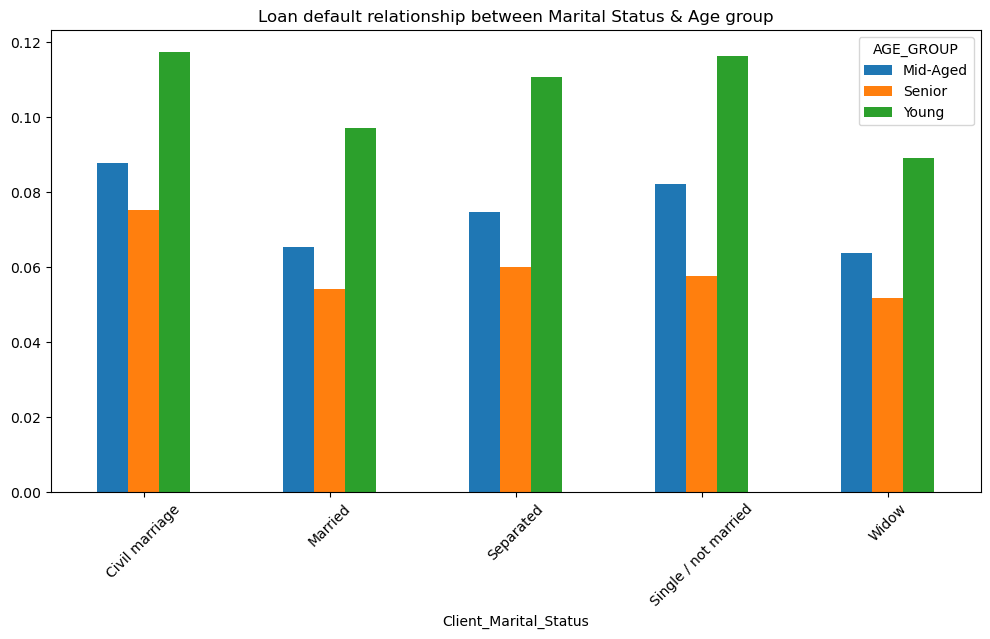

In [247]:
pivot_table_age_group_family_status.plot.bar(figsize=(12,6),rot=45)
plt.title('Loan default relationship between Marital Status & Age group')
plt.show()

**Observations**

- Young individuals have the highest default rate, especially if they had civil marriage or are single.

- Mid-aged and senior individuals have lower default rates.

### Analyze the relationship between Client profession, gender, and loan default status

In [248]:
pivot_table_proffesion_and_gender = pd.pivot_table(application_data, values="FLAG_Defalter", index="Client_Profession", columns="Gender")
pivot_table_proffesion_and_gender

Gender                       F         M
Client_Profession                       
Businessman           0.000000  0.000000
Commercial associate  0.066667  0.088275
Maternity leave       0.500000  0.000000
Pensioner             0.049557  0.073161
State servant         0.053418  0.068753
Student               0.000000  0.000000
Unemployed            0.352941  0.400000
Working               0.083733  0.114857

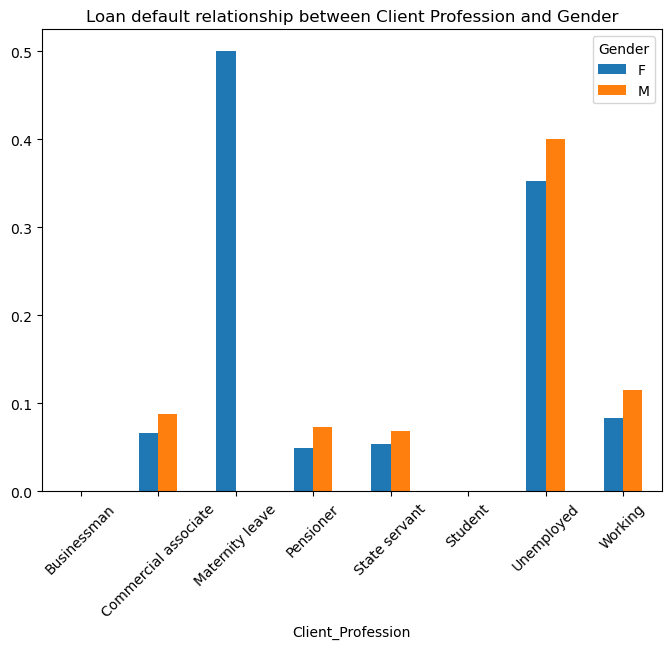

In [252]:
pivot_table_proffesion_and_gender.plot.bar(figsize=(8,6),rot=45)
plt.title('Loan default relationship between Client Profession and Gender')
plt.show()

**Observations**
- Professions with Highest Default Rates

> Maternity Leave (Female only):

> Extremely high default rate at 50%, the highest across all groups.

> Indicates significant financial vulnerability during this period, likely due to reduced income.

> Unemployed:

> Females: ~37%

> Males: ~40%

> High default risk for both genders, slightly higher for males, showing the clear impact of lack of income on repayment ability.

- Moderate Default Rate Professions

> Working Professionals:

> Females: ~8.5%

> Males: ~12%

> Males in this category have higher default rates, potentially due to higher borrowing relative to income or different spending behavior.

> Commercial Associates:

> Females: ~6.5%

> Males: ~9%

> Again, males have a slightly higher default rate.

> Pensioners & State Servants:

> Both genders in these professions have relatively low default rates (~5–7%), suggesting more stable income sources.

- Lowest Default Rate Professions
> Businessmen and Students show 0% defaults in this dataset, suggesting either lower borrowing activity, smaller sample size, or stronger repayment performance in this particular data segment.

### Analyze the relationship between Credit Loan Amount, Age, and loan default status

In [253]:
pivot_table_credit_and_age = pd.pivot_table(application_data, values="FLAG_Defalter", index="Credit_Loan_Amount_group", columns="AGE_GROUP")
pivot_table_credit_and_age

AGE_GROUP                 Mid-Aged    Senior     Young
Credit_Loan_Amount_group                              
High                      0.059089  0.058858  0.077980
Low                       0.072332  0.051621  0.108860
Medium                    0.082991  0.063285  0.122853

In [255]:
pivot_table_credit_and_age.plot.bar(figsize=(10,4),rot=45)
plt.title('Credit amount group Vs Age Group')
plt.show()

**Observations**
- High Loan Amount Group
    
> Young borrowers have the highest default rate ~7.9% compared to Mid-aged ~6.0% and Senior ~6.0%.

> The gap between young and older borrowers suggests that younger clients may be less experienced in managing large loans.

- Low Loan Amount Group
                                                                                                 
> Young borrowers again lead with the highest default rate (~10.9%).

> Mid-aged borrowers follow ~7.2%, while Seniors have the lowest ~5.2%.

> Indicates that even smaller loans carry higher risk for young borrowers, possibly due to lower income stability.

- Medium Loan Amount Group
                                                                                                 
> Young borrowers have the highest default rate overall ~12.3%, significantly higher than Mid-aged ~8.3% and Seniors ~6.4%.

> This is the most concerning category, as medium loan amounts might be large enough to cause repayment strain without the rigorous approval process of high loans.

## Previous Application Dataset

In [256]:
previous_data = pd.read_csv('previous_application (4).csv')
previous_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [257]:
previous_data.shape

(1670214, 37)

In [258]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [259]:
previous_data.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       ...  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  \
count  ...               5951.000000   1.670214e+06      1.670214e+06   
mean   ...                  0.773503  -8.806797e+02      3.139511e+02   
std    ...                  0.100879   7.790997e+02      7.127443e+03   
min    ...                  0.373150  -2.922000e+03     -1.000000e+00   
25%    ...                  0.715645  -1.300000e+03     -1.000000e+00   
50%    ...                  0.835095  -5.810000e+02      3.000000e+00   
75%    ...                  0.852537  -2.800000e+02      8.200000e+01   
max    ...                  1.000000  -1.000000e+00      4.000000e+06   

        CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count  1.297984e+06       997149.000000   997149.000000   
mean   1.605408e+01       342209.855039    13826.269337   
std    1.456729e+01        88916.115834    72444.869708   
min    0.000000e+00        -2922.000000    -2892.000000   
25%    6.000000e+00       365243.000000    -1628.000000   
50%    1.200000e+01       365243.000000     -831.000000   
75%    2.400000e+01       365243.000000     -411.000000   
max    8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.000000  
50%                     0.000000  
75%                     1.000000  
max                     1.000000  

[8 rows x 21 columns]

### Handling Missing values

In [261]:
previous_data.replace("XNA",np.nan, inplace = True)
previous_data.replace("XAP",np.nan, inplace = True)
previous_data.replace("Unknown",np.nan, inplace = True)
previous_data.replace("unknown",np.nan, inplace = True)

In [262]:
# List the columns having more than 40% missing values

previous_columns_40_null_values = previous_data.columns[previous_data.isnull().mean()*100 > 40]
print(len(previous_columns_40_null_values))
print(previous_columns_40_null_values)

16
Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_GOODS_CATEGORY',
       'NAME_PRODUCT_TYPE', 'NAME_SELLER_INDUSTRY', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [263]:
#Dropping null value Coloumns:
previous_data.drop(previous_columns_40_null_values, axis = 1, inplace = True)

In [264]:
previous_data.shape

(1670214, 21)

In [265]:
previous_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [266]:
previous_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.020716
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE              37.563091
NAME_CLIENT_TYPE                0.116213
NAME_PORTFOLIO                 22.286366
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP               30.966990
PRODUCT_COMBINATION             0.020716
dtype: float64

### Changing Column names for better understanding

In [267]:
new_columns_previous = [
    "Previous_Loan_ID",
    "Loan_ID",
    "Loan_Type_previous",
    "Loan_Annuity_previous",
    "Credit_Loan_Amount_asked_previous",
    "Credit_Loan_Amount_Got_previous",
    "Goods_Price_Previous",
    "Day_of_Application_Previous",
    "Hour_of_Application_Previous",
    "FLAG_LAST_APPL_PER_CONTRACT_Previous",
    "NFLAG_LAST_APPL_IN_DAY_Previous",
    "Loan_Approval_Status_Previous",
    "day_decision_previous",
    "Payment_Type_Previous","Client_Type_Previous",
    "Product_Category_Previous",
    "Channel_type_Previous",
    "Sellerplace_Area_Previous",
    "Payment_term_months_Previous",
    "Interest_Rate_Category_Previous",
    "Financial_Product_Types_Previous"
]

previous_data.columns = new_columns_previous
previous_data.head()

Previous_Loan_ID  Loan_ID Loan_Type_previous  Loan_Annuity_previous  \
0           2030495   271877     Consumer loans               1730.430   
1           2802425   108129         Cash loans              25188.615   
2           2523466   122040         Cash loans              15060.735   
3           2819243   176158         Cash loans              47041.335   
4           1784265   202054         Cash loans              31924.395   

   Credit_Loan_Amount_asked_previous  Credit_Loan_Amount_Got_previous  \
0                            17145.0                          17145.0   
1                           607500.0                         679671.0   
2                           112500.0                         136444.5   
3                           450000.0                         470790.0   
4                           337500.0                         404055.0   

   Goods_Price_Previous Day_of_Application_Previous  \
0               17145.0                    SATURDAY   
1              607500.0                    THURSDAY   
2              112500.0                     TUESDAY   
3              450000.0                      MONDAY   
4              337500.0                    THURSDAY   

   Hour_of_Application_Previous FLAG_LAST_APPL_PER_CONTRACT_Previous  ...  \
0                            15                                    Y  ...   
1                            11                                    Y  ...   
2                            11                                    Y  ...   
3                             7                                    Y  ...   
4                             9                                    Y  ...   

   Loan_Approval_Status_Previous day_decision_previous  Payment_Type_Previous  \
0                       Approved                   -73  Cash through the bank   
1                       Approved                  -164                    NaN   
2                       Approved                  -301  Cash through the bank   
3                       Approved                  -512  Cash through the bank   
4                        Refused                  -781  Cash through the bank   

  Client_Type_Previous Product_Category_Previous    Channel_type_Previous  \
0             Repeater                       POS             Country-wide   
1             Repeater                      Cash           Contact center   
2             Repeater                      Cash  Credit and cash offices   
3             Repeater                      Cash  Credit and cash offices   
4             Repeater                      Cash  Credit and cash offices   

  Sellerplace_Area_Previous  Payment_term_months_Previous  \
0                        35                          12.0   
1                        -1                          36.0   
2                        -1                          12.0   
3                        -1                          12.0   
4                        -1                          24.0   

   Interest_Rate_Category_Previous Financial_Product_Types_Previous  
0                           middle         POS mobile with interest  
1                       low_action                 Cash X-Sell: low  
2                             high                Cash X-Sell: high  
3                           middle              Cash X-Sell: middle  
4                             high                Cash Street: high  

[5 rows x 21 columns]

In [268]:
previous_data.columns

Index(['Previous_Loan_ID', 'Loan_ID', 'Loan_Type_previous',
       'Loan_Annuity_previous', 'Credit_Loan_Amount_asked_previous',
       'Credit_Loan_Amount_Got_previous', 'Goods_Price_Previous',
       'Day_of_Application_Previous', 'Hour_of_Application_Previous',
       'FLAG_LAST_APPL_PER_CONTRACT_Previous',
       'NFLAG_LAST_APPL_IN_DAY_Previous', 'Loan_Approval_Status_Previous',
       'day_decision_previous', 'Payment_Type_Previous',
       'Client_Type_Previous', 'Product_Category_Previous',
       'Channel_type_Previous', 'Sellerplace_Area_Previous',
       'Payment_term_months_Previous', 'Interest_Rate_Category_Previous',
       'Financial_Product_Types_Previous'],
      dtype='object')

In [269]:
irrelevant_col = ['Hour_of_Application_Previous','FLAG_LAST_APPL_PER_CONTRACT_Previous','NFLAG_LAST_APPL_IN_DAY_Previous','Day_of_Application_Previous']
# Delete the columns which are irrelevant for the analysis
previous_data.drop(irrelevant_col, axis = 1, inplace = True)
previous_data.shape

(1670214, 17)

In [270]:
previous_data.isnull().mean()*100

Previous_Loan_ID                      0.000000
Loan_ID                               0.000000
Loan_Type_previous                    0.020716
Loan_Annuity_previous                22.286665
Credit_Loan_Amount_asked_previous     0.000000
Credit_Loan_Amount_Got_previous       0.000060
Goods_Price_Previous                 23.081773
Loan_Approval_Status_Previous         0.000000
day_decision_previous                 0.000000
Payment_Type_Previous                37.563091
Client_Type_Previous                  0.116213
Product_Category_Previous            22.286366
Channel_type_Previous                 0.000000
Sellerplace_Area_Previous             0.000000
Payment_term_months_Previous         22.286366
Interest_Rate_Category_Previous      30.966990
Financial_Product_Types_Previous      0.020716
dtype: float64

In [271]:
# Remove the Payment_Type_Previous column due to approximately 40% missing values.
previous_data.drop("Payment_Type_Previous", axis = 1, inplace = True)
previous_data.shape

(1670214, 16)

In [272]:
previous_data.isnull().mean()*100

Previous_Loan_ID                      0.000000
Loan_ID                               0.000000
Loan_Type_previous                    0.020716
Loan_Annuity_previous                22.286665
Credit_Loan_Amount_asked_previous     0.000000
Credit_Loan_Amount_Got_previous       0.000060
Goods_Price_Previous                 23.081773
Loan_Approval_Status_Previous         0.000000
day_decision_previous                 0.000000
Client_Type_Previous                  0.116213
Product_Category_Previous            22.286366
Channel_type_Previous                 0.000000
Sellerplace_Area_Previous             0.000000
Payment_term_months_Previous         22.286366
Interest_Rate_Category_Previous      30.966990
Financial_Product_Types_Previous      0.020716
dtype: float64

**Noticing that Loan_Annuity_previous, Product_Category_Previous, and Payment_term_months_Previous have identical percentages of missing values, we will verify whether these null values occur in the same rows.**

In [273]:
len(previous_data[pd.isna(previous_data['Loan_Annuity_previous']) & 
                     pd.isna(previous_data['Payment_term_months_Previous']) & 
                     pd.isna(previous_data['Goods_Price_Previous']) & pd.isna(previous_data['Interest_Rate_Category_Previous']) & 
                     pd.isna(previous_data['Product_Category_Previous'])])

333855

**The analysis indicates that missing values in Goods_Price_Previous, Payment_term_months_Previous, Loan_Annuity_previous, and Product_Category_Previous are concentrated in the same set of 333,855 rows. To prevent potential bias from imputation, these rows will be removed from the dataset.**

In [274]:
# Drops rows only if ALL columns have NaN
previous_data = previous_data.dropna(subset=['Loan_Annuity_previous', 'Payment_term_months_Previous', 'Goods_Price_Previous', 'Product_Category_Previous'], how='all')
previous_data.shape

(1336359, 16)

In [275]:
previous_data.isnull().mean()*100

Previous_Loan_ID                      0.000000
Loan_ID                               0.000000
Loan_Type_previous                    0.000000
Loan_Annuity_previous                 2.871983
Credit_Loan_Amount_asked_previous     0.000000
Credit_Loan_Amount_Got_previous       0.000075
Goods_Price_Previous                  3.865728
Loan_Approval_Status_Previous         0.000000
day_decision_previous                 0.000000
Client_Type_Previous                  0.070041
Product_Category_Previous             2.871609
Channel_type_Previous                 0.000000
Sellerplace_Area_Previous             0.000000
Payment_term_months_Previous          2.871609
Interest_Rate_Category_Previous      13.720864
Financial_Product_Types_Previous      0.000000
dtype: float64

In [276]:
previous_data.columns[previous_data.dtypes != "object"]

Index(['Previous_Loan_ID', 'Loan_ID', 'Loan_Annuity_previous',
       'Credit_Loan_Amount_asked_previous', 'Credit_Loan_Amount_Got_previous',
       'Goods_Price_Previous', 'day_decision_previous',
       'Sellerplace_Area_Previous', 'Payment_term_months_Previous'],
      dtype='object')

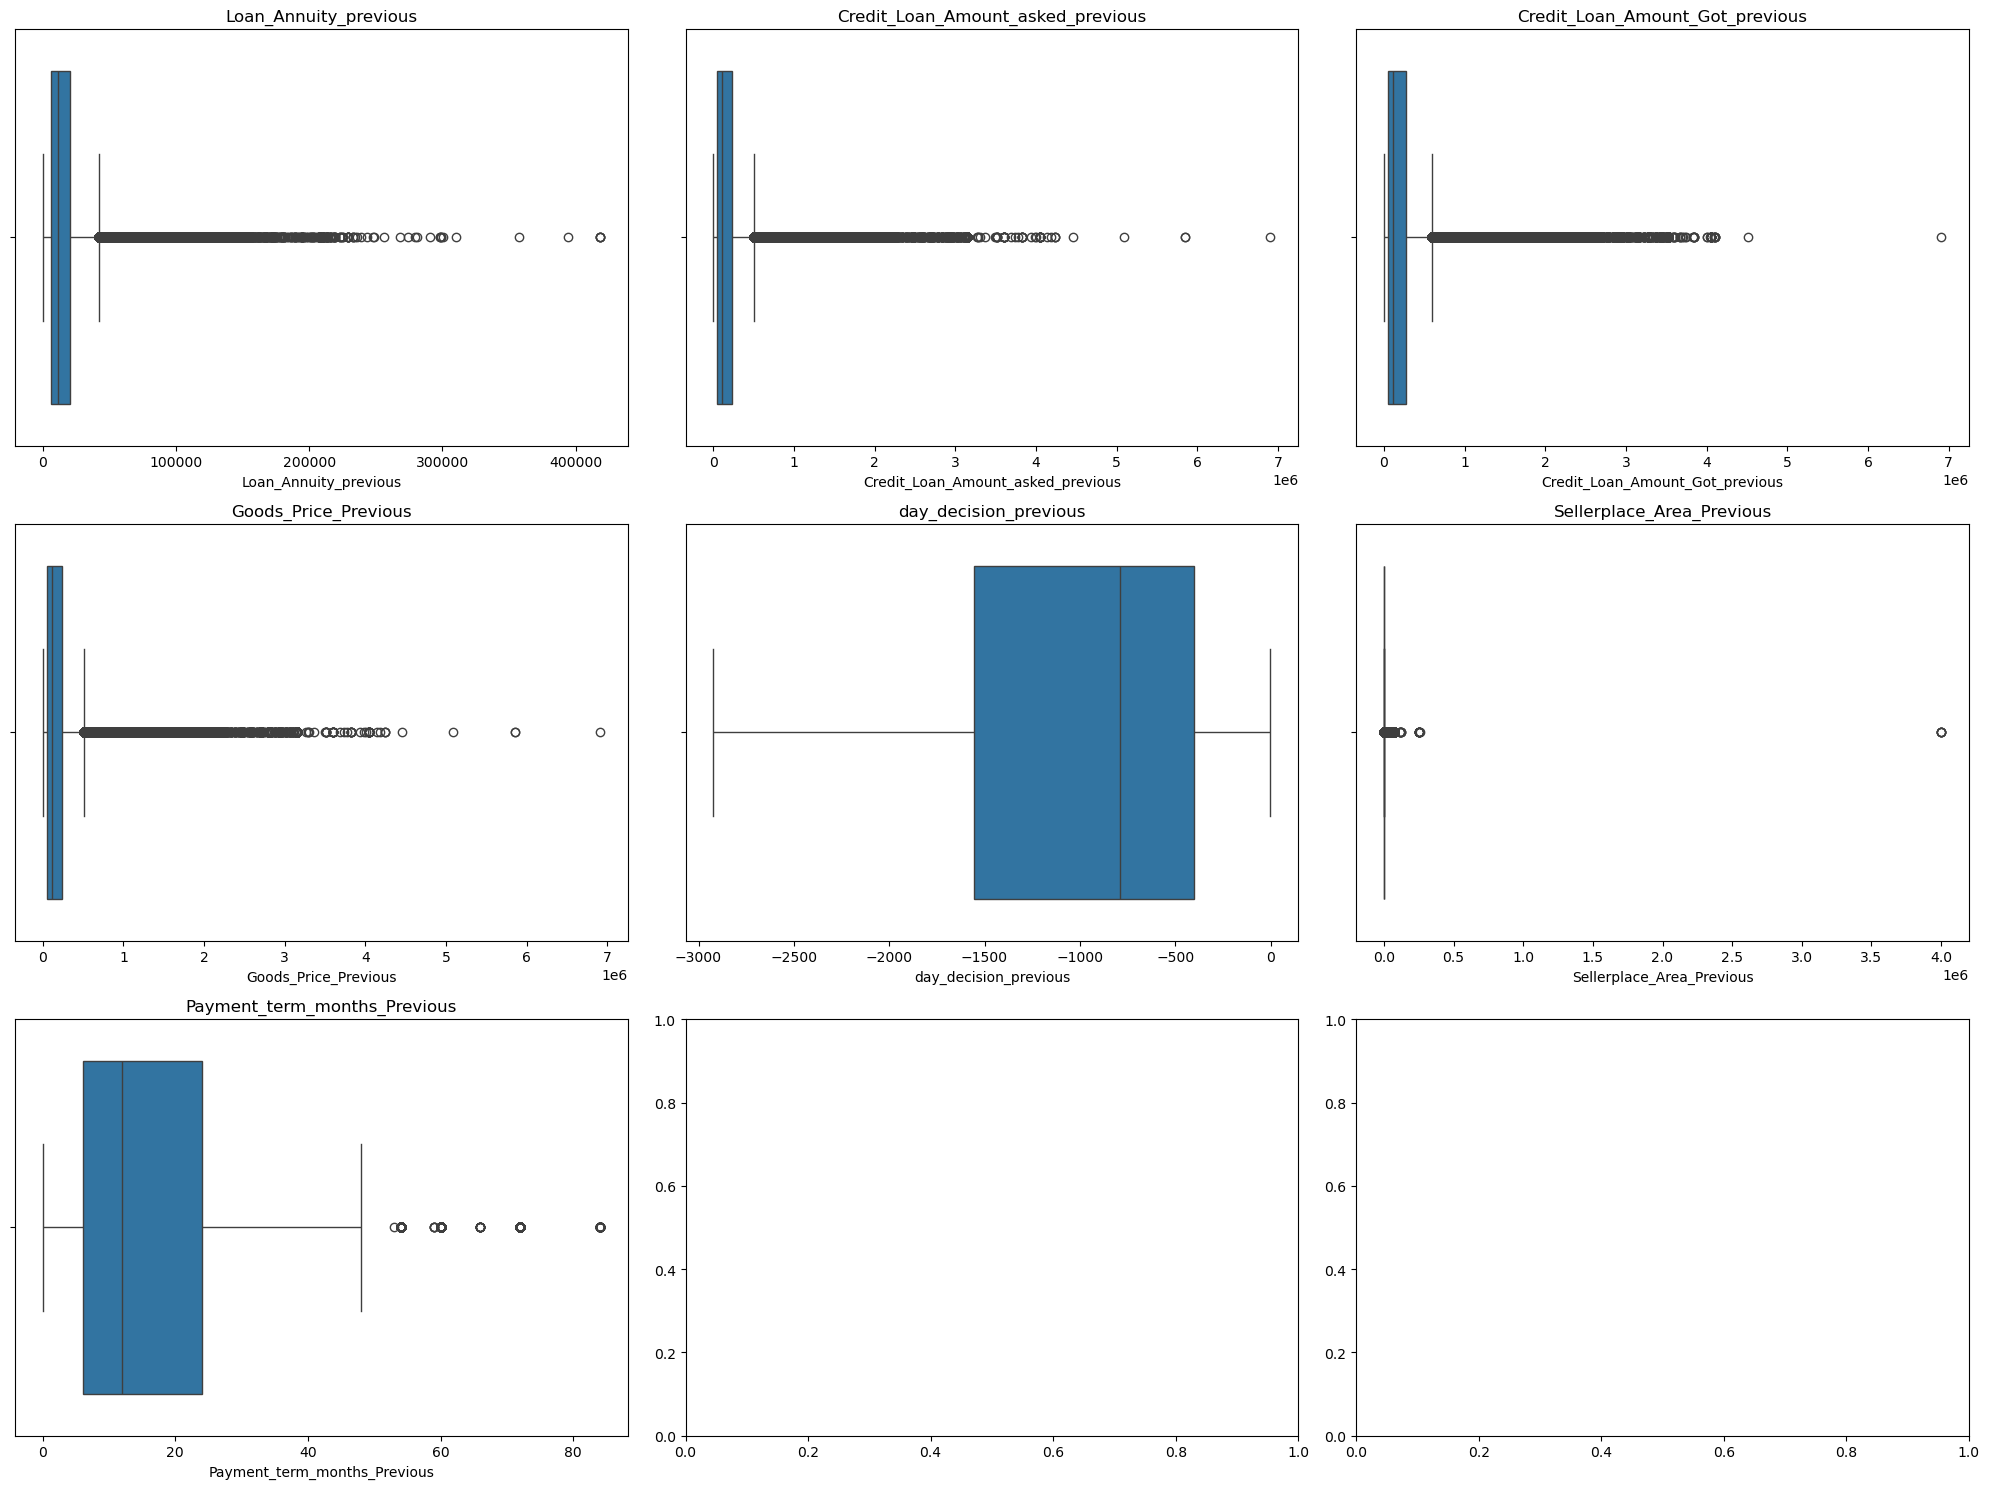

In [277]:
# List of columns you want to plot
columns_to_plot = [
   'Loan_Annuity_previous',
       'Credit_Loan_Amount_asked_previous', 'Credit_Loan_Amount_Got_previous',
       'Goods_Price_Previous', 'day_decision_previous',
       'Sellerplace_Area_Previous', 'Payment_term_months_Previous']

# Create subplots: 4 rows, 4 columns (adjust based on the number of columns)
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through the columns and plot box plots
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=previous_data[col], ax=axes[i])  # Create box plot
    axes[i].set_title(col)  # Set title to the column name

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

**The columns Loan_Annuity_previous, Payment_term_months_Previous, and Goods_Price_Previous contain outliers, as observed in the box plots. Therefore, the median value is used to impute the missing data, since the median is not influenced by outliers.**

In [278]:
median_col = ["Loan_Annuity_previous","Payment_term_months_Previous","Goods_Price_Previous"] 

for i in median_col:
    med=previous_data[i].median()
    previous_data[i] = previous_data[i].fillna(med)

In [279]:
previous_data.isnull().sum()

Previous_Loan_ID                          0
Loan_ID                                   0
Loan_Type_previous                        0
Loan_Annuity_previous                     0
Credit_Loan_Amount_asked_previous         0
Credit_Loan_Amount_Got_previous           1
Goods_Price_Previous                      0
Loan_Approval_Status_Previous             0
day_decision_previous                     0
Client_Type_Previous                    936
Product_Category_Previous             38375
Channel_type_Previous                     0
Sellerplace_Area_Previous                 0
Payment_term_months_Previous              0
Interest_Rate_Category_Previous      183360
Financial_Product_Types_Previous          0
dtype: int64

In [280]:
# we can fill "Client_Type_Previous" with mode because missing values are on a lower side.
mode = previous_data["Client_Type_Previous"].mode()[0]
previous_data["Client_Type_Previous"] = previous_data["Client_Type_Previous"].fillna(mode)

In [281]:
previous_data["Client_Type_Previous"].isnull().sum()

np.int64(0)

In [282]:
# we can fill "Product_Category_Previous" with mode because missing values are on a lower side.
mode = previous_data["Product_Category_Previous"].mode()[0]
previous_data["Product_Category_Previous"] = previous_data["Product_Category_Previous"].fillna(mode)

In [283]:
previous_data["Product_Category_Previous"].isnull().sum()

np.int64(0)

In [284]:
previous_data["Interest_Rate_Category_Previous"].value_counts()

Interest_Rate_Category_Previous
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: count, dtype: int64

**We observe that the value counts for Interest_Rate_Category_Previous are very close to each other. Filling the null values with the mode could introduce bias, so we create a new category labeled Unknown for these missing entries.**

In [285]:
previous_data['Interest_Rate_Category_Previous'] = previous_data['Interest_Rate_Category_Previous'].fillna('Unknown')
#Check if the values are filled
previous_data['Interest_Rate_Category_Previous'].isnull().sum()

np.int64(0)

## Treating Outliers - By Capping And Flooring

In [286]:
columns_with_Outliers = [
   'Loan_Annuity_previous',
       'Credit_Loan_Amount_asked_previous', 'Credit_Loan_Amount_Got_previous',
       'Goods_Price_Previous',
       'Sellerplace_Area_Previous', 'Payment_term_months_Previous']

for col in columns_with_Outliers:
    q1=previous_data[col].quantile(0.25) # Q1 - 25th Percentile
    q3=previous_data[col].quantile(0.75) # Q3 - 75th Percentile
    iqr=q3-q1                     # IQR - InterQuartile Range
    lower_whisker=q1-1.5*iqr      # Lower Bound
    upper_whisker=q3+1.5*iqr      # Upper Bound
    previous_data[col]=np.where(previous_data[col]>upper_whisker,upper_whisker,previous_data[col]) #Capping
    previous_data[col]=np.where(previous_data[col]<lower_whisker,lower_whisker,previous_data[col]) #Flooring

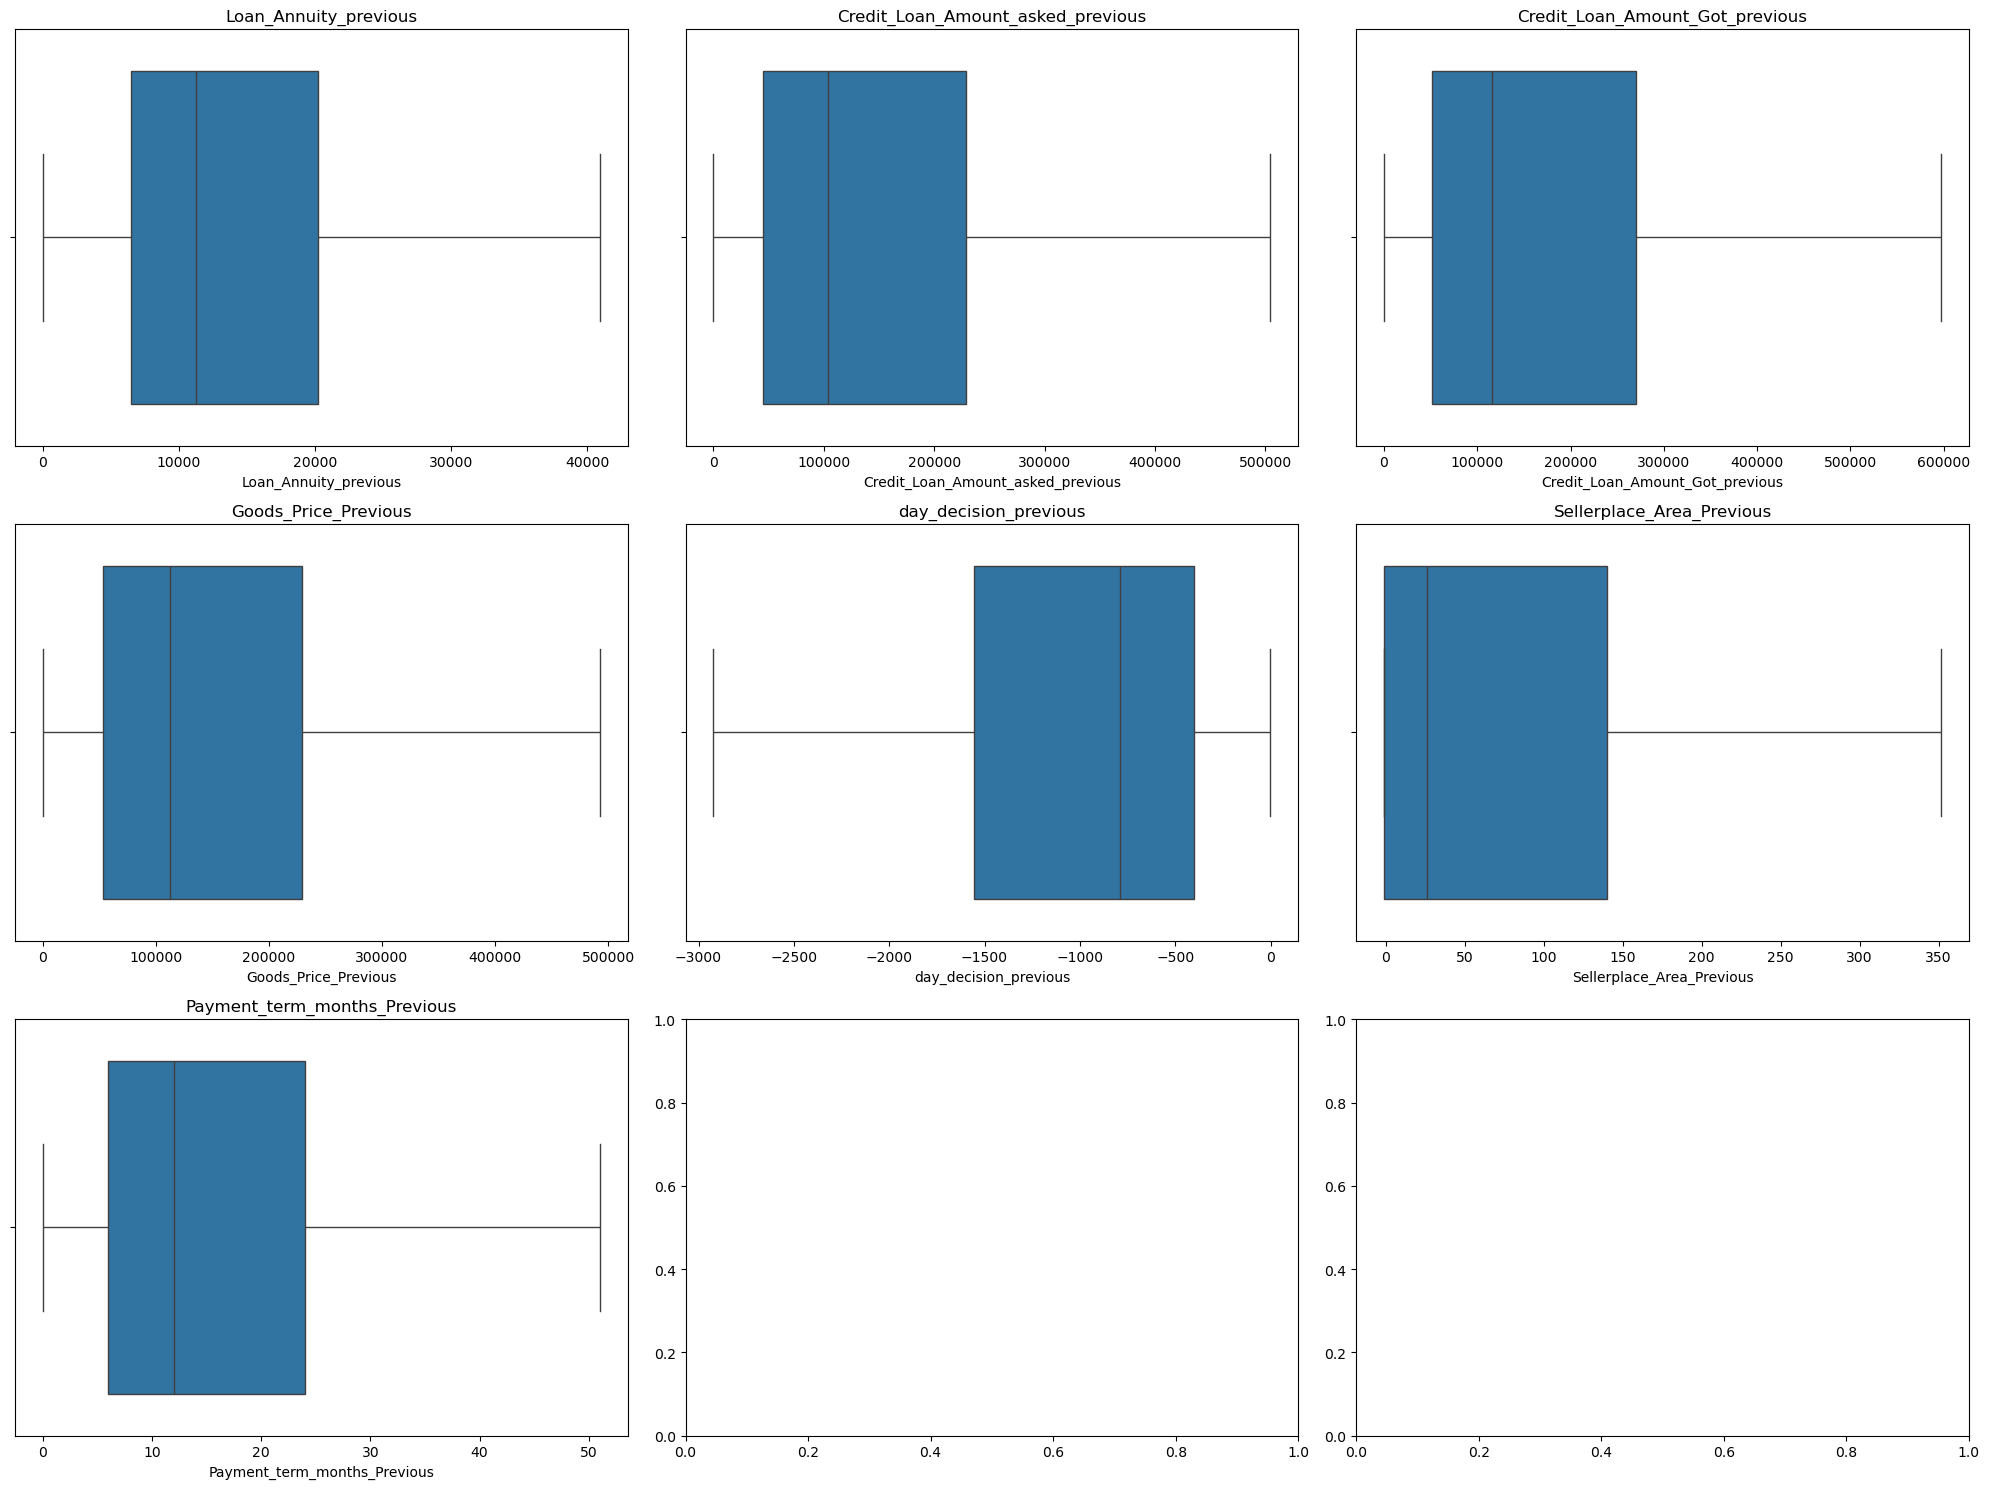

In [287]:
columns_to_plot = [
   'Loan_Annuity_previous',
       'Credit_Loan_Amount_asked_previous', 'Credit_Loan_Amount_Got_previous',
       'Goods_Price_Previous', 'day_decision_previous',
       'Sellerplace_Area_Previous', 'Payment_term_months_Previous']

# Create subplots: 4 rows, 4 columns (adjust based on the number of columns)
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through the columns and plot box plots
for i, col in enumerate(columns_to_plot):
    sns.boxplot(x=previous_data[col], ax=axes[i])  # Create box plot
    axes[i].set_title(col)  # Set title to the column name

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()

## Checking for data imbalance

In [289]:
# Listing columns for checking data imbalance and plotting them
col_list = ['Loan_Type_previous','Loan_Approval_Status_Previous','Client_Type_Previous','Product_Category_Previous','Channel_type_Previous']            
k=0
plt.figure(figsize=(20,22))
for col in col_list:    
    k=k+1
    plt.subplot(3, 3,k)    
    #df_application_prev[col].value_counts().plot(kind='bar');
    ax = sns.countplot(x = col , data = previous_data, palette = 'Set2')
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

plt.show()

**Converting DAYS_DECISION column to MONTH_DECISION column for readablity and analysis**

In [290]:
previous_data['Month_Decision_Previous'] = abs(previous_data['day_decision_previous']//30)

# Drop 'DAYS_DECISION' column
previous_data = previous_data.drop(['day_decision_previous'],axis=1)

In [291]:
previous_data.head()

Previous_Loan_ID  Loan_ID Loan_Type_previous  Loan_Annuity_previous  \
0           2030495   271877     Consumer loans              1730.4300   
1           2802425   108129         Cash loans             25188.6150   
2           2523466   122040         Cash loans             15060.7350   
3           2819243   176158         Cash loans             40912.3575   
4           1784265   202054         Cash loans             31924.3950   

   Credit_Loan_Amount_asked_previous  Credit_Loan_Amount_Got_previous  \
0                           17145.00                         17145.00   
1                          504551.25                        597152.25   
2                          112500.00                        136444.50   
3                          450000.00                        470790.00   
4                          337500.00                        404055.00   

   Goods_Price_Previous Loan_Approval_Status_Previous Client_Type_Previous  \
0               17145.0                      Approved             Repeater   
1              492534.0                      Approved             Repeater   
2              112500.0                      Approved             Repeater   
3              450000.0                      Approved             Repeater   
4              337500.0                       Refused             Repeater   

  Product_Category_Previous    Channel_type_Previous  \
0                       POS             Country-wide   
1                      Cash           Contact center   
2                      Cash  Credit and cash offices   
3                      Cash  Credit and cash offices   
4                      Cash  Credit and cash offices   

   Sellerplace_Area_Previous  Payment_term_months_Previous  \
0                       35.0                          12.0   
1                       -1.0                          36.0   
2                       -1.0                          12.0   
3                       -1.0                          12.0   
4                       -1.0                          24.0   

  Interest_Rate_Category_Previous Financial_Product_Types_Previous  \
0                          middle         POS mobile with interest   
1                      low_action                 Cash X-Sell: low   
2                            high                Cash X-Sell: high   
3                          middle              Cash X-Sell: middle   
4                            high                Cash Street: high   

   Month_Decision_Previous  
0                        3  
1                        6  
2                       11  
3                       18  
4                       27

In [292]:
previous_data.shape

(1336359, 16)

## Merging Current application and Previous application dataset

In [293]:
# Columns to take from current application dataset
cols_current = ['Loan_ID','FLAG_Defalter','Gender','Client_Education','Own_Car','Own_House','Client_Profession','Client_House_Status','Client_Marital_Status','AGE_GROUP','Client_Normalized_Score_External_Source_group','Annual_Income','income_group','YEARS_EMPLOYED']
# Creating a dataset from current application for merging 
df_current_to_merge = application_data[cols_current]
df_current_to_merge.head()

Loan_ID  FLAG_Defalter Gender               Client_Education Own_Car  \
0   100002              1      M  Secondary / secondary special       N   
1   100003              0      F               Higher education       N   
2   100004              0      M  Secondary / secondary special       Y   
3   100006              0      F  Secondary / secondary special       N   
4   100007              0      M  Secondary / secondary special       N   

  Own_House Client_Profession Client_House_Status Client_Marital_Status  \
0         Y           Working   House / apartment  Single / not married   
1         N     State servant   House / apartment               Married   
2         Y           Working   House / apartment  Single / not married   
3         Y           Working   House / apartment        Civil marriage   
4         Y           Working   House / apartment  Single / not married   

  AGE_GROUP Client_Normalized_Score_External_Source_group  Annual_Income  \
0     Young                                           Low       202500.0   
1  Mid-Aged                                        Medium       270000.0   
2  Mid-Aged                                          High        67500.0   
3  Mid-Aged                                        Medium       135000.0   
4  Mid-Aged                                        Medium       121500.0   

  income_group  YEARS_EMPLOYED  
0         High             2.0  
1         High             4.0  
2          Low             1.0  
3       Medium             9.0  
4       Medium             9.0

In [294]:
# Columns to remove from previous application dataset
cols_prev_to_drop = ['Sellerplace_Area_Previous','Financial_Product_Types_Previous','Goods_Price_Previous']

# Creating  a dataset from previous application for merging
df_prev_to_merge = previous_data.drop(cols_prev_to_drop,axis=1)
df_prev_to_merge.head()

Previous_Loan_ID  Loan_ID Loan_Type_previous  Loan_Annuity_previous  \
0           2030495   271877     Consumer loans              1730.4300   
1           2802425   108129         Cash loans             25188.6150   
2           2523466   122040         Cash loans             15060.7350   
3           2819243   176158         Cash loans             40912.3575   
4           1784265   202054         Cash loans             31924.3950   

   Credit_Loan_Amount_asked_previous  Credit_Loan_Amount_Got_previous  \
0                           17145.00                         17145.00   
1                          504551.25                        597152.25   
2                          112500.00                        136444.50   
3                          450000.00                        470790.00   
4                          337500.00                        404055.00   

  Loan_Approval_Status_Previous Client_Type_Previous  \
0                      Approved             Repeater   
1                      Approved             Repeater   
2                      Approved             Repeater   
3                      Approved             Repeater   
4                       Refused             Repeater   

  Product_Category_Previous    Channel_type_Previous  \
0                       POS             Country-wide   
1                      Cash           Contact center   
2                      Cash  Credit and cash offices   
3                      Cash  Credit and cash offices   
4                      Cash  Credit and cash offices   

   Payment_term_months_Previous Interest_Rate_Category_Previous  \
0                          12.0                          middle   
1                          36.0                      low_action   
2                          12.0                            high   
3                          12.0                          middle   
4                          24.0                            high   

   Month_Decision_Previous  
0                        3  
1                        6  
2                       11  
3                       18  
4                       27

In [295]:
# Merging both the datasets
df_merged = pd.merge(df_prev_to_merge,df_current_to_merge, on='Loan_ID', how='inner')
df_merged.head()

Previous_Loan_ID  Loan_ID Loan_Type_previous  Loan_Annuity_previous  \
0           2030495   271877     Consumer loans              1730.4300   
1           2802425   108129         Cash loans             25188.6150   
2           2523466   122040         Cash loans             15060.7350   
3           2819243   176158         Cash loans             40912.3575   
4           1784265   202054         Cash loans             31924.3950   

   Credit_Loan_Amount_asked_previous  Credit_Loan_Amount_Got_previous  \
0                           17145.00                         17145.00   
1                          504551.25                        597152.25   
2                          112500.00                        136444.50   
3                          450000.00                        470790.00   
4                          337500.00                        404055.00   

  Loan_Approval_Status_Previous Client_Type_Previous  \
0                      Approved             Repeater   
1                      Approved             Repeater   
2                      Approved             Repeater   
3                      Approved             Repeater   
4                       Refused             Repeater   

  Product_Category_Previous    Channel_type_Previous  ...  Own_Car Own_House  \
0                       POS             Country-wide  ...        N         Y   
1                      Cash           Contact center  ...        N         N   
2                      Cash  Credit and cash offices  ...        N         Y   
3                      Cash  Credit and cash offices  ...        Y         Y   
4                      Cash  Credit and cash offices  ...        N         N   

      Client_Profession  Client_House_Status Client_Marital_Status AGE_GROUP  \
0         State servant    House / apartment               Married    Senior   
1  Commercial associate    House / apartment        Civil marriage  Mid-Aged   
2               Working    House / apartment               Married     Young   
3             Pensioner    House / apartment               Married    Senior   
4         State servant    House / apartment               Married     Young   

  Client_Normalized_Score_External_Source_group Annual_Income income_group  \
0                                          High      225000.0         High   
1                                        Medium       90000.0          Low   
2                                           Low       40500.0          Low   
3                                        Medium      315000.0         High   
4                                        Medium      180000.0         High   

  YEARS_EMPLOYED  
0           15.5  
1            4.0  
2            4.0  
3            5.0  
4            7.0  

[5 rows x 26 columns]

In [296]:
df_merged.shape

(1139471, 26)

In [297]:
df_merged.isnull().sum()

Previous_Loan_ID                                 0
Loan_ID                                          0
Loan_Type_previous                               0
Loan_Annuity_previous                            0
Credit_Loan_Amount_asked_previous                0
Credit_Loan_Amount_Got_previous                  1
Loan_Approval_Status_Previous                    0
Client_Type_Previous                             0
Product_Category_Previous                        0
Channel_type_Previous                            0
Payment_term_months_Previous                     0
Interest_Rate_Category_Previous                  0
Month_Decision_Previous                          0
FLAG_Defalter                                    0
Gender                                           0
Client_Education                                 0
Own_Car                                          0
Own_House                                        0
Client_Profession                                0
Client_House_Status            

In [298]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139471 entries, 0 to 1139470
Data columns (total 26 columns):
 #   Column                                         Non-Null Count    Dtype   
---  ------                                         --------------    -----   
 0   Previous_Loan_ID                               1139471 non-null  int64   
 1   Loan_ID                                        1139471 non-null  int64   
 2   Loan_Type_previous                             1139471 non-null  object  
 3   Loan_Annuity_previous                          1139471 non-null  float64 
 4   Credit_Loan_Amount_asked_previous              1139471 non-null  float64 
 5   Credit_Loan_Amount_Got_previous                1139470 non-null  float64 
 6   Loan_Approval_Status_Previous                  1139471 non-null  object  
 7   Client_Type_Previous                           1139471 non-null  object  
 8   Product_Category_Previous                      1139471 non-null  object  
 9   Channel_type_

In [299]:
df_merged["Percent_Credit"] = round(((df_merged["Credit_Loan_Amount_Got_previous"] / df_merged["Credit_Loan_Amount_asked_previous"])*100),2)
df_merged.head()

Previous_Loan_ID  Loan_ID Loan_Type_previous  Loan_Annuity_previous  \
0           2030495   271877     Consumer loans              1730.4300   
1           2802425   108129         Cash loans             25188.6150   
2           2523466   122040         Cash loans             15060.7350   
3           2819243   176158         Cash loans             40912.3575   
4           1784265   202054         Cash loans             31924.3950   

   Credit_Loan_Amount_asked_previous  Credit_Loan_Amount_Got_previous  \
0                           17145.00                         17145.00   
1                          504551.25                        597152.25   
2                          112500.00                        136444.50   
3                          450000.00                        470790.00   
4                          337500.00                        404055.00   

  Loan_Approval_Status_Previous Client_Type_Previous  \
0                      Approved             Repeater   
1                      Approved             Repeater   
2                      Approved             Repeater   
3                      Approved             Repeater   
4                       Refused             Repeater   

  Product_Category_Previous    Channel_type_Previous  ...  Own_House  \
0                       POS             Country-wide  ...          Y   
1                      Cash           Contact center  ...          N   
2                      Cash  Credit and cash offices  ...          Y   
3                      Cash  Credit and cash offices  ...          Y   
4                      Cash  Credit and cash offices  ...          N   

      Client_Profession  Client_House_Status  Client_Marital_Status AGE_GROUP  \
0         State servant    House / apartment                Married    Senior   
1  Commercial associate    House / apartment         Civil marriage  Mid-Aged   
2               Working    House / apartment                Married     Young   
3             Pensioner    House / apartment                Married    Senior   
4         State servant    House / apartment                Married     Young   

  Client_Normalized_Score_External_Source_group Annual_Income income_group  \
0                                          High      225000.0         High   
1                                        Medium       90000.0          Low   
2                                           Low       40500.0          Low   
3                                        Medium      315000.0         High   
4                                        Medium      180000.0         High   

  YEARS_EMPLOYED Percent_Credit  
0           15.5         100.00  
1            4.0         118.35  
2            4.0         121.28  
3            5.0         104.62  
4            7.0         119.72  

[5 rows x 27 columns]

## Univariate analysis of categorical variables

In [ ]:
categorical_col = ['Loan_Type_previous','Client_Type_Previous', 'Product_Category_Previous','Channel_type_Previous','Loan_Approval_Status_Previous','Interest_Rate_Category_Previous']

for i in categorical_col:
    sns.countplot(x = i,data=df_merged, palette = "tab10")
    ax.set(xlabel= i)
    plt.xticks(rotation=45)
    plt.show()

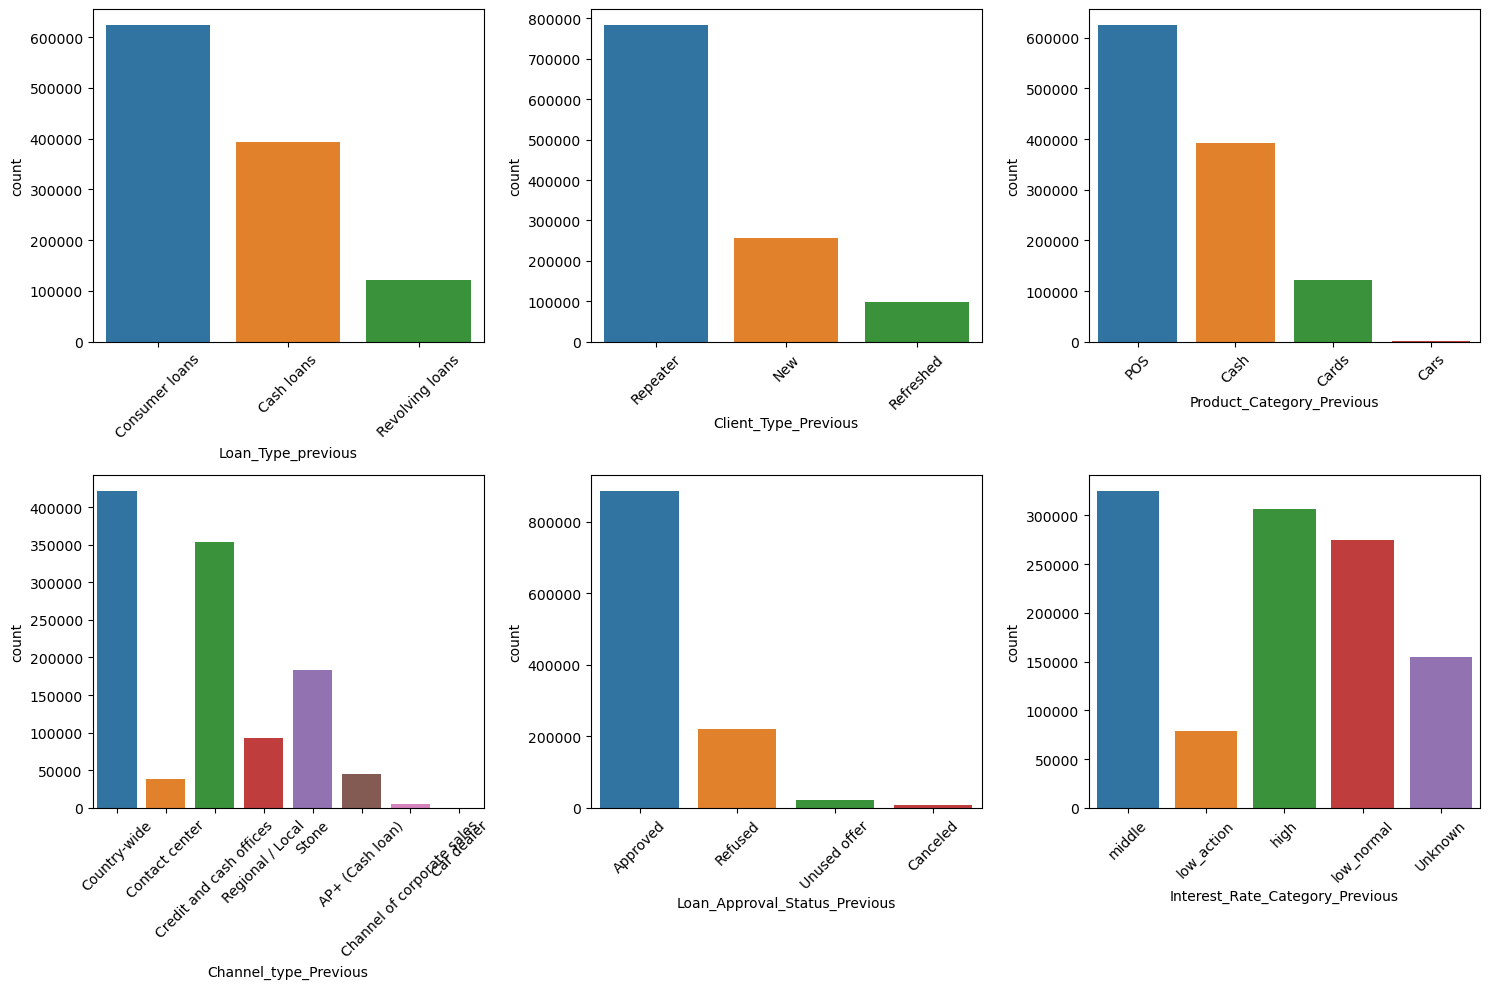

In [300]:
categorical_col = [
    'Loan_Type_previous', 'Client_Type_Previous', 
    'Product_Category_Previous', 'Channel_type_Previous',
    'Loan_Approval_Status_Previous', 'Interest_Rate_Category_Previous'
]

# Define subplot grid
ncols = 3
nrows = (len(categorical_col) + ncols - 1) // ncols  # auto rows
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))
axes = axes.flatten()  # make it easy to loop

# Create each countplot
for idx, col in enumerate(categorical_col):
    sns.countplot(x=col, data=df_merged, palette="tab10", ax=axes[idx])
    axes[idx].set_xlabel(col)
    axes[idx].tick_params(axis='x', rotation=45)

# Hide any unused subplot axes
for j in range(idx+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

1. Loan_Type_Previous

> Consumer loans dominate the dataset with over 620k records, making them the most common type of previous loan.

> Cash loans follow with around 390k records.

> Revolving loans are the least common, with only about 120k records.

> Observation: Since consumer loans form the majority, patterns found in defaults may be heavily influenced by this category. Care should be taken to ensure analysis is not biased toward the most frequent class.

2. Client_Type_Previous

> Repeater clients (customers with a previous history of loans) form the largest group, with nearly 780k records.

> New clients make up about 260k records, while Refreshed clients (perhaps renewed loan customers) are the smallest group with roughly 100k records.

> Observation: A large proportion of repeat borrowers may suggest that the lending institution has strong customer retention, but this also raises the need to check if repeat borrowers have higher or lower default risks.

3. Product_Category_Previous

> POS (Point of Sale) loans are the most common, with over 620k records.

> Cash loans under product category level also have a strong presence ~390k.

> Cards form a much smaller portion ~120k, and Cars are almost negligible in number.

> Observation: The concentration in POS and Cash products suggests a focus on short-term or medium-term credit, with very low involvement in automotive lending.

4. Channel_type_Previous

> Country-wide channels dominate, with over 420k records, followed by Credit and cash offices (~350k).

> Regional / Local ~95k and Stone ~180k have moderate representation.

> Contact Center ~40k and AP+ (Cash loan) ~50k are much smaller channels.

> Channel of corporate sales is negligible in volume.

> Observation: Loan distribution is concentrated heavily in Country-wide and Credit & cash offices, which might influence the overall trends in defaults and approvals.

5. Loan_Approval_Status_Previous

> Approved applications are overwhelmingly dominant, with nearly 900k records.

> Refused applications account for about 220k cases.

> Unused offers ~25k and Canceled ~7k are rare.

> Observation: The approval rate appears very high, which could be a business strategy, but also raises the need to check if high approval correlates with increased defaults.

6. Interest_Rate_Category_Previous

> Middle interest rates have the highest frequency ~325k.

> High interest rates ~310k and Low_normal ~275k are also quite common.

> Low_action interest rates are rare ~80k.

> Unknown accounts for ~155k entries, indicating a significant portion of data where interest rate category was not recorded.

> Observation: The distribution across most interest categories is fairly balanced except for Low_action, which is a minority category. The high number of “Unknown” may require separate handling in analysis.

## Univariate analysis of continuous variables

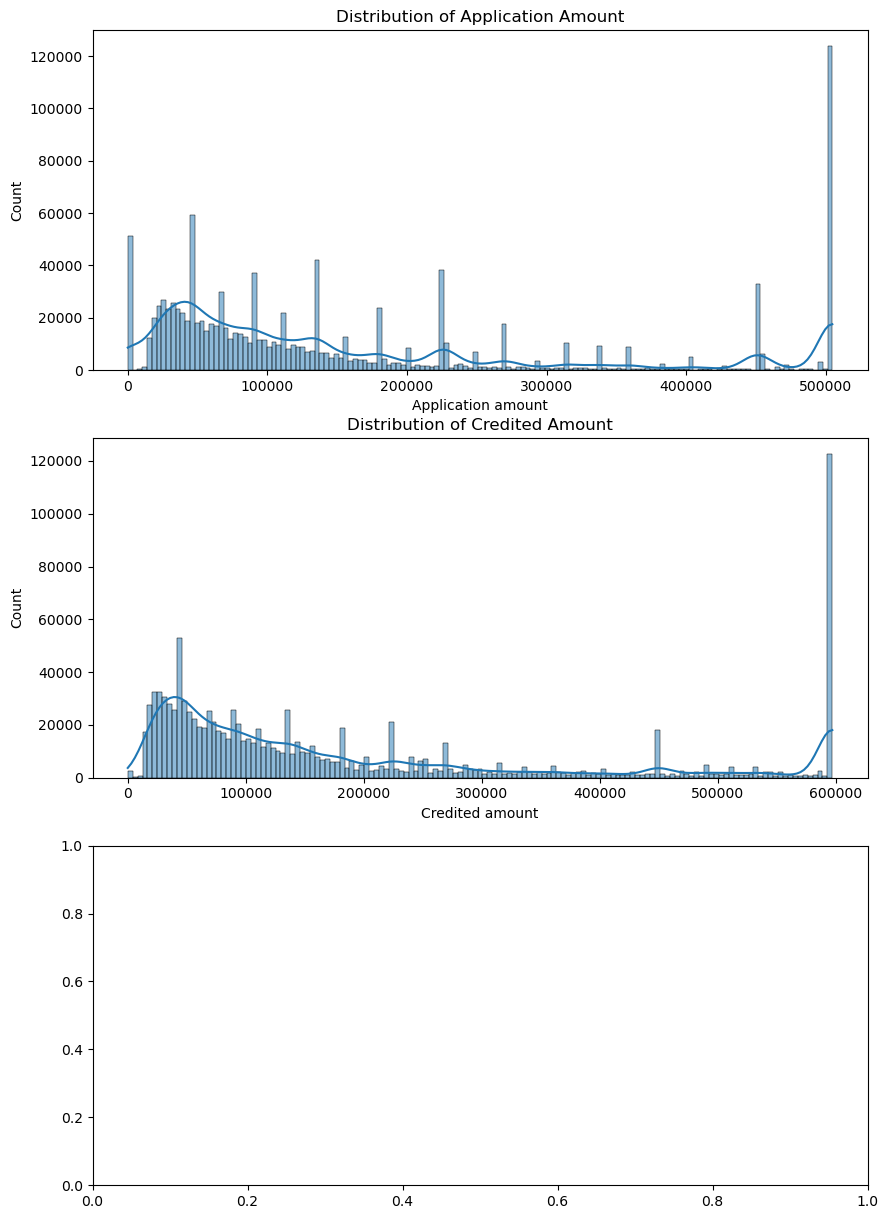

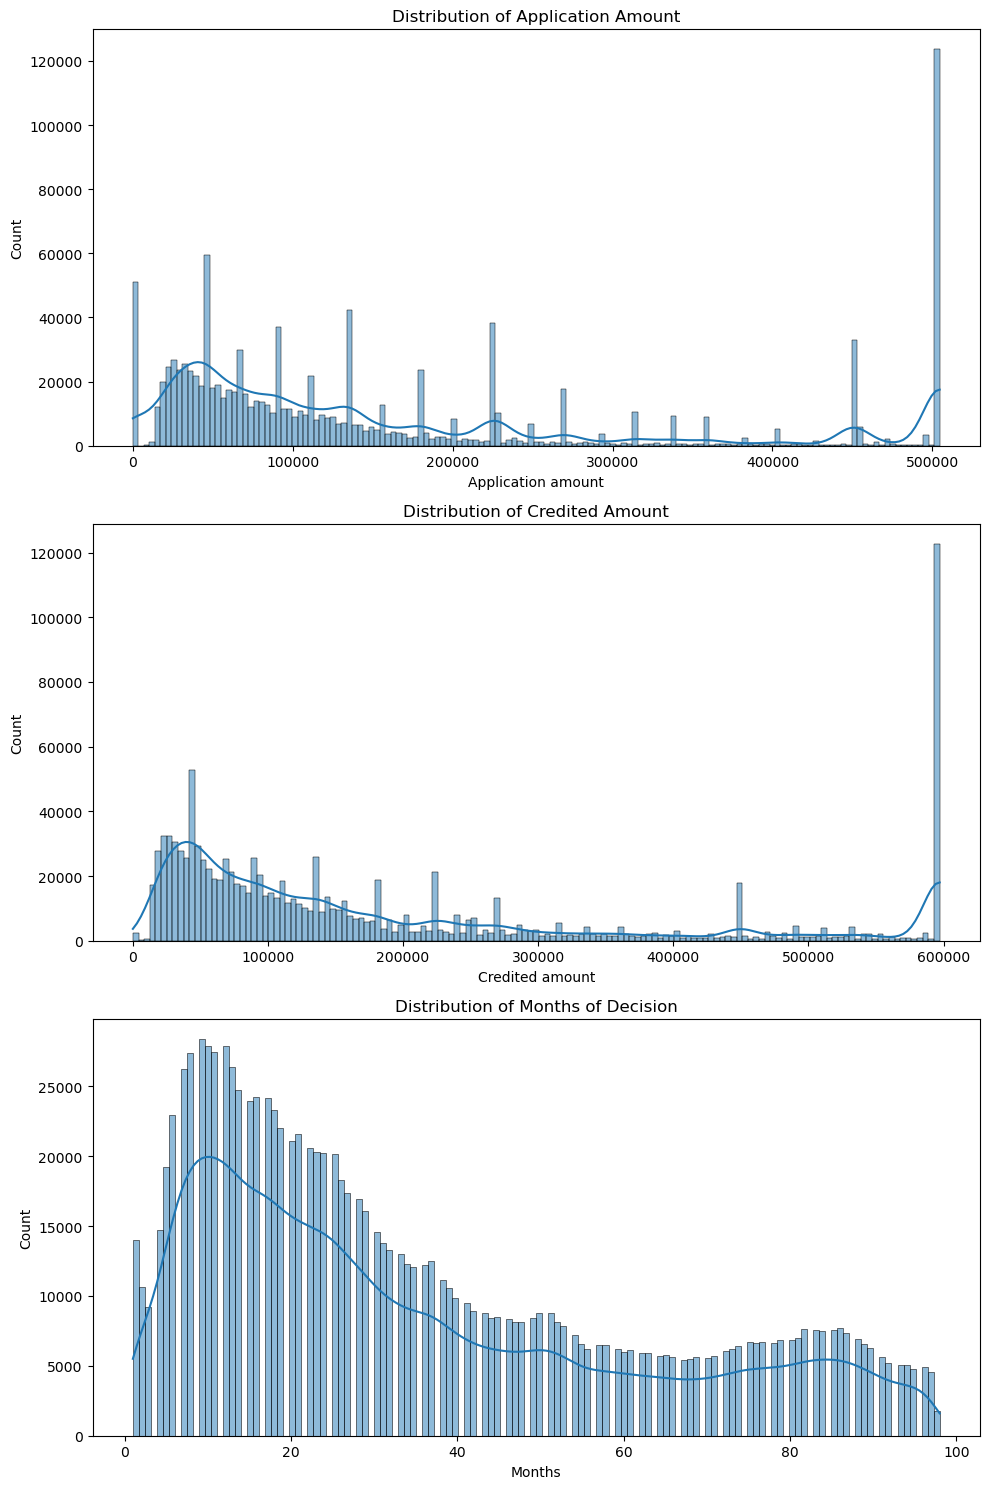

In [302]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Plot 1: Application amount
sns.histplot(df_merged['Credit_Loan_Amount_asked_previous'], kde=True, ax=axes[0])
axes[0].set_xlabel('Application amount')
axes[0].set_title('Distribution of Application Amount')

# Plot 2: Credited amount
sns.histplot(df_merged['Credit_Loan_Amount_Got_previous'], kde=True, ax=axes[1])
axes[1].set_xlabel('Credited amount')
axes[1].set_title('Distribution of Credited Amount')

# Plot 3: Months
sns.histplot(df_merged['Month_Decision_Previous'], kde=True, ax=axes[2])
axes[2].set_xlabel('Months')
axes[2].set_title('Distribution of Months of Decision')

plt.tight_layout()
plt.show()

**Observations**
1. Application Amount
- Skewness & Distribution Shape

> The distribution is right-skewed, meaning most applicants request smaller loan amounts, with fewer applicants asking for larger amounts.

> This suggests that small to medium-sized loans are far more common.

- Common Loan Amount Peaks

> Multiple spikes (modes) are visible, indicating that certain loan amounts are applied for more frequently.

> These spikes may correspond to preset loan packages or round numbers that banks often approve (e.g., ₹50,000, ₹1,00,000, ₹5,00,000).

2. Credited Amount
- Right-Skewed Distribution

> The credited amounts are heavily right-skewed, with most loans being credited at lower amounts and a long tail extending toward higher amounts.

> This suggests the majority of approved loans are small to medium-sized.

- Multiple Peaks (Modes)

> Several visible spikes at regular intervals indicate standardized credit amounts being disbursed by the lender.

> These likely correspond to preset loan brackets or round-number loan approvals (e.g., ₹50,000, ₹1,00,000, ₹2,00,000).

- Significant High-End Spike

> A very large spike near ₹600,000 suggests this is either the maximum disbursal limit or a popular high-value loan tier that many customers qualify for.

> This mirrors the behavior seen in the "Application Amount" distribution but at a slightly different high-end value.

3. Months of decision
- Strong Early Peak (0–20 Months)

> The highest loan decision activity occurs between months 8 and 15, suggesting a period of increased loan approvals or rejections during this time frame.

> This could be tied to seasonal borrowing patterns, business cycles, or targeted promotional campaigns by lenders.

- Gradual Decline After Month 20

> Loan decisions steadily decline after month 20, with fewer cases in later months, indicating that most client interactions and decisions happen earlier in the timeline.

> Possible reason: many customers may complete or default on loans earlier, reducing repeat applications in later months.

- Secondary Flat Region (50–90 Months)

> From around 50 to 90 months, the number of decisions stabilizes at a lower level with small fluctuations.

> This may represent long-term loan renewals or refinancing cases.

- Sharp Drop Beyond Month 90

> Very few loan decisions occur after month 90, implying rare long-duration engagements.

## Bivariate analysis

### Correlation of relevant numerical columns

In [303]:
df_merged.columns[df_merged.dtypes != "object"]

Index(['Previous_Loan_ID', 'Loan_ID', 'Loan_Annuity_previous',
       'Credit_Loan_Amount_asked_previous', 'Credit_Loan_Amount_Got_previous',
       'Payment_term_months_Previous', 'Month_Decision_Previous',
       'FLAG_Defalter', 'AGE_GROUP',
       'Client_Normalized_Score_External_Source_group', 'Annual_Income',
       'income_group', 'YEARS_EMPLOYED', 'Percent_Credit'],
      dtype='object')

In [305]:
# Listing the relevant columns for finding corelation
corr_cols = ['Loan_Annuity_previous',
       'Credit_Loan_Amount_asked_previous', 'Credit_Loan_Amount_Got_previous',
       'Payment_term_months_Previous', 'Month_Decision_Previous', 'Annual_Income',
       'YEARS_EMPLOYED', 'Percent_Credit']

# Creating dataframe for numerical columns
df_merged_corr = df_merged[corr_cols]
df_merged_corr.head()

Loan_Annuity_previous  Credit_Loan_Amount_asked_previous  \
0              1730.4300                           17145.00   
1             25188.6150                          504551.25   
2             15060.7350                          112500.00   
3             40912.3575                          450000.00   
4             31924.3950                          337500.00   

   Credit_Loan_Amount_Got_previous  Payment_term_months_Previous  \
0                         17145.00                          12.0   
1                        597152.25                          36.0   
2                        136444.50                          12.0   
3                        470790.00                          12.0   
4                        404055.00                          24.0   

   Month_Decision_Previous  Annual_Income  YEARS_EMPLOYED  Percent_Credit  
0                        3       225000.0            15.5          100.00  
1                        6        90000.0             4.0          118.35  
2                       11        40500.0             4.0          121.28  
3                       18       315000.0             5.0          104.62  
4                       27       180000.0             7.0          119.72

In [306]:
# Corelation matrix
df_merged_corr.corr()

Loan_Annuity_previous  \
Loan_Annuity_previous                           1.000000   
Credit_Loan_Amount_asked_previous               0.842284   
Credit_Loan_Amount_Got_previous                 0.865256   
Payment_term_months_Previous                    0.461405   
Month_Decision_Previous                        -0.318352   
Annual_Income                                   0.239889   
YEARS_EMPLOYED                                  0.049271   
Percent_Credit                                  0.378810   

                                   Credit_Loan_Amount_asked_previous  \
Loan_Annuity_previous                                       0.842284   
Credit_Loan_Amount_asked_previous                           1.000000   
Credit_Loan_Amount_Got_previous                             0.935265   
Payment_term_months_Previous                                0.708727   
Month_Decision_Previous                                    -0.371908   
Annual_Income                                               0.183416   
YEARS_EMPLOYED                                              0.040005   
Percent_Credit                                              0.406778   

                                   Credit_Loan_Amount_Got_previous  \
Loan_Annuity_previous                                     0.865256   
Credit_Loan_Amount_asked_previous                         0.935265   
Credit_Loan_Amount_Got_previous                           1.000000   
Payment_term_months_Previous                              0.672754   
Month_Decision_Previous                                  -0.368457   
Annual_Income                                             0.186262   
YEARS_EMPLOYED                                            0.044641   
Percent_Credit                                            0.489302   

                                   Payment_term_months_Previous  \
Loan_Annuity_previous                                  0.461405   
Credit_Loan_Amount_asked_previous                      0.708727   
Credit_Loan_Amount_Got_previous                        0.672754   
Payment_term_months_Previous                           1.000000   
Month_Decision_Previous                               -0.248604   
Annual_Income                                          0.048437   
YEARS_EMPLOYED                                         0.023372   
Percent_Credit                                         0.476408   

                                   Month_Decision_Previous  Annual_Income  \
Loan_Annuity_previous                            -0.318352       0.239889   
Credit_Loan_Amount_asked_previous                -0.371908       0.183416   
Credit_Loan_Amount_Got_previous                  -0.368457       0.186262   
Payment_term_months_Previous                     -0.248604       0.048437   
Month_Decision_Previous                           1.000000      -0.001880   
Annual_Income                                    -0.001880       1.000000   
YEARS_EMPLOYED                                    0.086104       0.073108   
Percent_Credit                                   -0.315874       0.016787   

                                   YEARS_EMPLOYED  Percent_Credit  
Loan_Annuity_previous                    0.049271        0.378810  
Credit_Loan_Amount_asked_previous        0.040005        0.406778  
Credit_Loan_Amount_Got_previous          0.044641        0.489302  
Payment_term_months_Previous             0.023372        0.476408  
Month_Decision_Previous                  0.086104       -0.315874  
Annual_Income                            0.073108        0.016787  
YEARS_EMPLOYED                           1.000000        0.001058  
Percent_Credit                           0.001058        1.000000

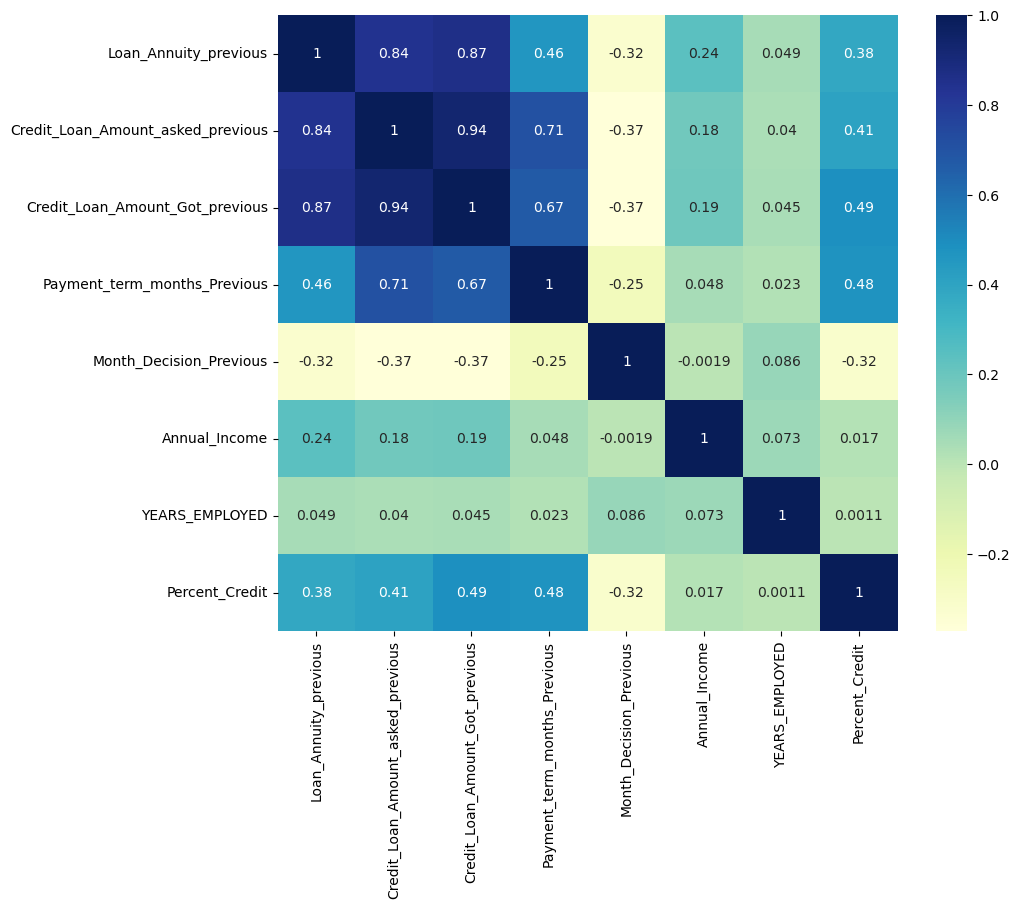

In [311]:
plt.figure(figsize=(10,8))
sns.heatmap(df_merged_corr.corr(),cmap="YlGnBu",annot=True)
plt.show()

**Observations**
1. Strong Positive Correlations

- Credit_Loan_Amount_asked_previous ↔ Credit_Loan_Amount_Got_previous (0.94)
> Extremely high correlation — as expected, the credited amount is very closely related to the amount requested.

- Loan_Annuity_previous ↔ Credit_Loan_Amount_Got_previous (0.87)
> Larger credited amounts lead to higher annuity payments.

- Loan_Annuity_previous ↔ Credit_Loan_Amount_asked_previous (0.84)
> Strong link between requested loan amount and annuity.

- Credit_Loan_Amount_Got_previous ↔ Payment_term_months_Previous (0.67)
> Higher credited amounts are often associated with longer payment terms.

2. Moderate Positive Correlations

- Percent_Credit ↔ Credit_Loan_Amount_Got_previous (0.49)
> Indicates that a higher percent of the requested amount being approved is moderately linked with higher credited amounts.

- Percent_Credit ↔ Payment_term_months_Previous (0.48)
> Suggests that loans with higher approval percentages tend to have longer repayment durations.

- Annual_Income ↔ Loan_Annuity_previous (0.24)
> Weak but noticeable trend — higher incomes can afford higher annuities.

3. Negative Correlations

- Month_Decision_Previous ↔ Loan/Credit Amount Variables (~ -0.32 to -0.37)
> Suggests that loans decided in later months tend to have lower amounts and shorter terms. Could be due to seasonal financial constraints or risk management policies.

5. Weak / No Correlation

- YEARS_EMPLOYED with most variables (~0.00–0.08)
> Employment length does not strongly influence loan amounts or terms in this dataset.

- Annual_Income ↔ Percent_Credit (0.017)
> Very weak — income level doesn’t significantly impact the percentage of loan approved.

## Bivariate analysis of continuous variable

### Application amount and credited amount

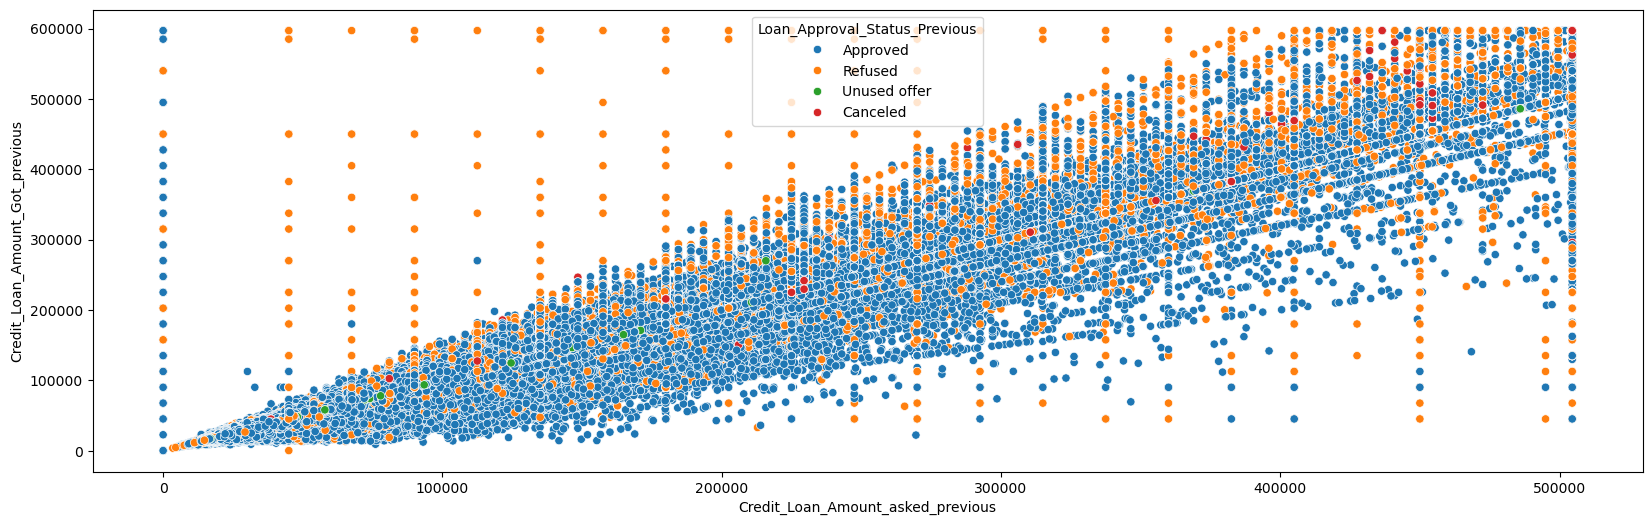

In [312]:
plt.figure(figsize=(20,6))
ax = sns.scatterplot(x='Credit_Loan_Amount_asked_previous', y='Credit_Loan_Amount_Got_previous', hue='Loan_Approval_Status_Previous', data=df_merged)
plt.show()

**Observations**
1. Strong Linear Relationship
- There is a clear positive linear trend between Credit_Loan_Amount_asked_previous and Credit_Loan_Amount_Got_previous — higher requested amounts generally lead to higher credited amounts.

- However, the slope is not always 1:1; in many cases, the approved amount is less than the requested amount.

2. Loan Approval Status Patterns
> Approved (Blue):

>> Dominates the dataset and closely follows the linear trend line.

>> Most approvals are near or slightly below the "equal asked = got" line, suggesting partial approvals are common.

> Refused (Orange):

>> Scattered across all ranges of loan amounts, both low and high.

>> Many refusals occur for very high requested amounts (≥ 400,000), possibly due to stricter credit risk checks.

> Unused Offer (Green):

>> Very few instances, indicating low customer take-up despite approval.

> Canceled (Red):

>> Sparse but more concentrated at higher request values, possibly due to borrowers reconsidering large loans.

### Application amount (Loan asked) and Loan Annuity

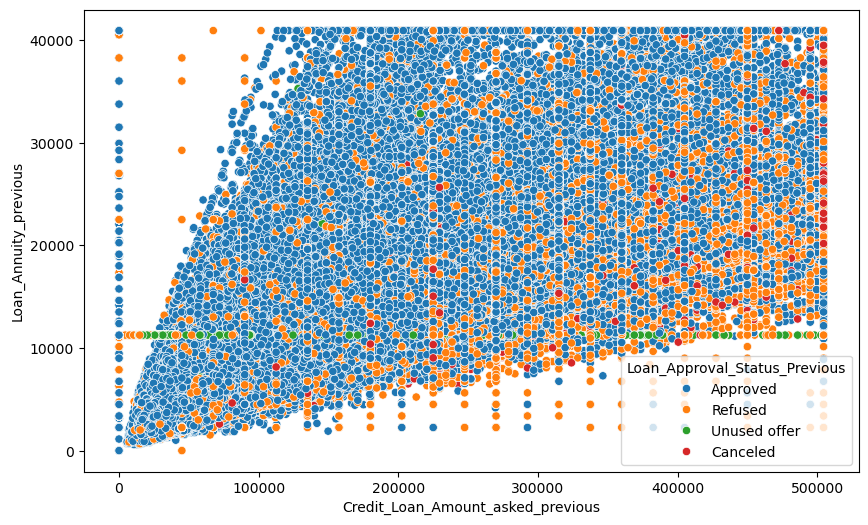

In [315]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='Credit_Loan_Amount_asked_previous', y='Loan_Annuity_previous', hue='Loan_Approval_Status_Previous', data=df_merged)
plt.show()

**Observations**
1. Strong Positive Relationship
- There is a clear upward trend: as the Credit Loan Amount Asked increases, the Loan Annuity (monthly repayment) also rises.

- This relationship makes sense because annuity payments are directly tied to the principal loan amount.

2. Loan Approval Status Patterns

> Approved Loans (Blue):

>> Represent the majority of cases across all ranges of loan amounts and annuities.

>> Form a dense triangular distribution, showing that as loan amounts grow, repayment amounts vary widely depending on loan term length and interest rates.

> Refused Loans (Orange):

>> More scattered, with higher frequency at large loan amounts (≥ 300,000).

>> Present both at low and high annuities, possibly indicating rejections for both risky low-term high-amount loans and long-term expensive loans.

> Unused Offers (Green):

>> Concentrated around specific annuity values (~10,000), which might be linked to common loan product packages.

> Canceled Loans (Red):

>> Rare but noticeable at high loan requests, suggesting cancellations are often tied to large commitments.

## Bivariate analysis of categorical variables

### Distribution of credited loan amounts (Credit_Loan_Amount_Got_previous) across various categories.

In [316]:
#Finding categorical columns
df_merged.columns[df_merged.dtypes == "object"]

Index(['Loan_Type_previous', 'Loan_Approval_Status_Previous',
       'Client_Type_Previous', 'Product_Category_Previous',
       'Channel_type_Previous', 'Interest_Rate_Category_Previous', 'Gender',
       'Client_Education', 'Own_Car', 'Own_House', 'Client_Profession',
       'Client_House_Status', 'Client_Marital_Status'],
      dtype='object')

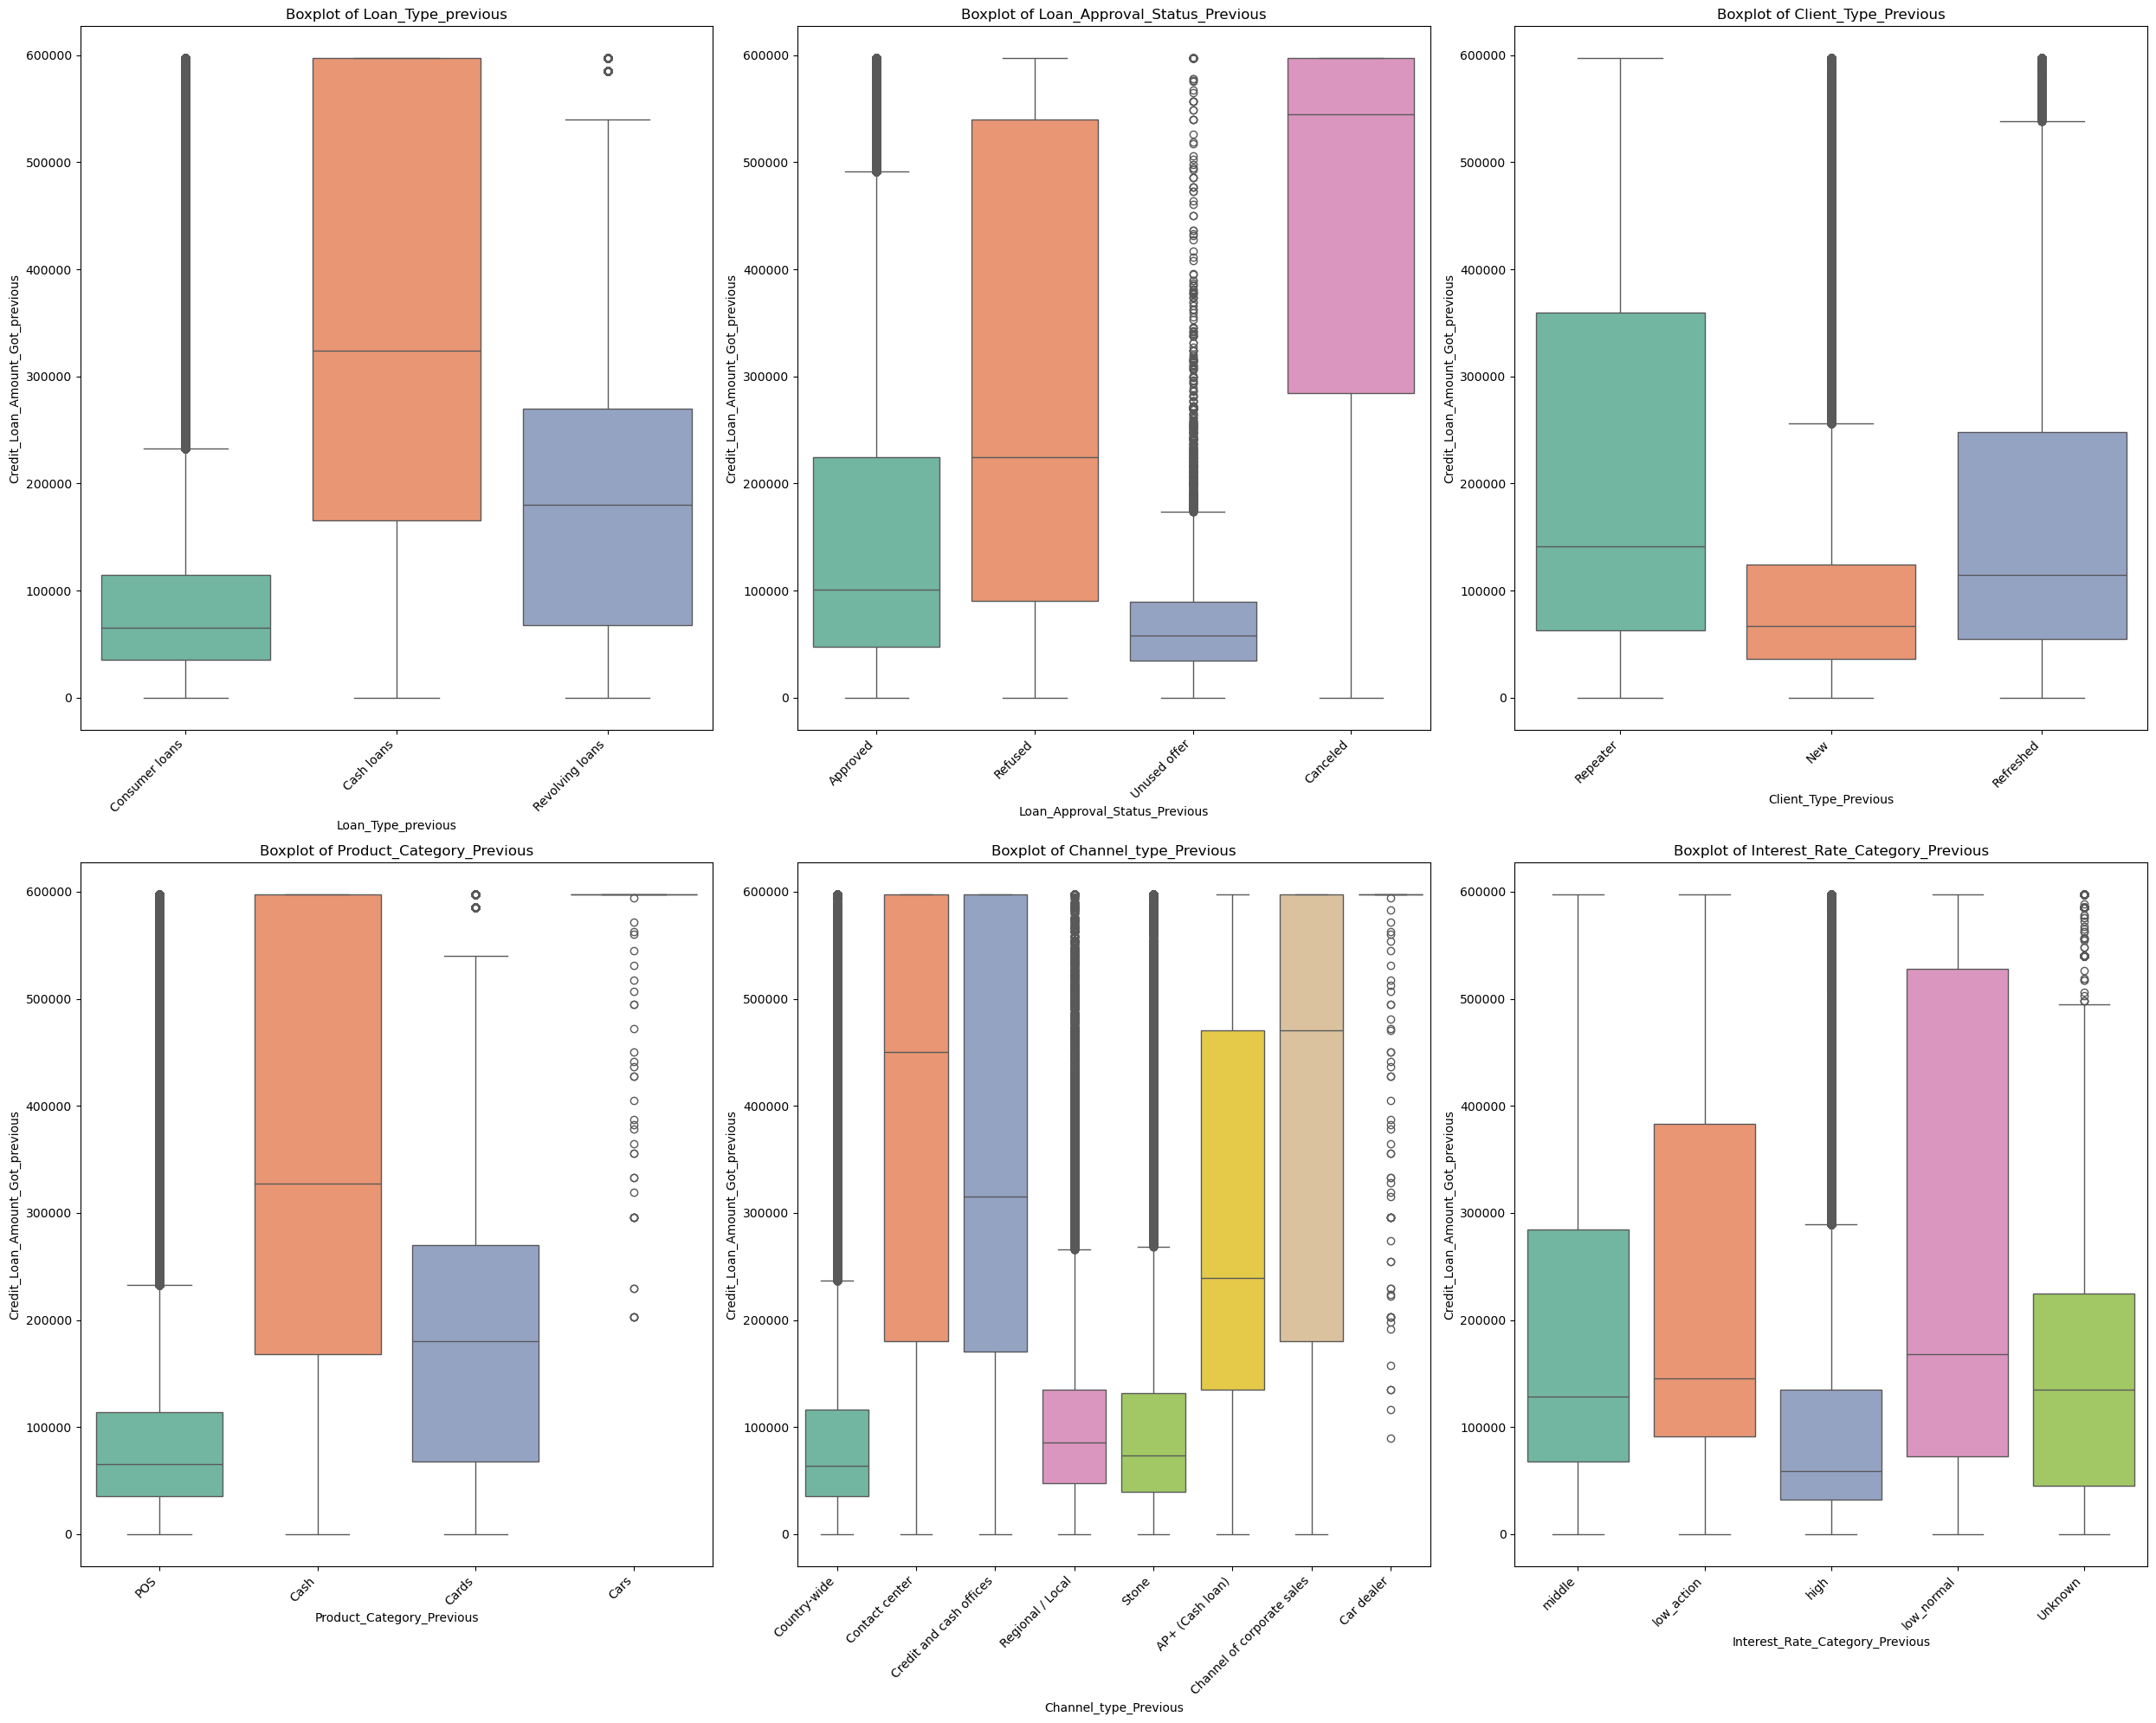

In [317]:
categorical_columns = ['Loan_Type_previous', 'Loan_Approval_Status_Previous',
       'Client_Type_Previous', 'Product_Category_Previous',
       'Channel_type_Previous', 'Interest_Rate_Category_Previous']


plt.figure(figsize=(25, 20))

for i, category in enumerate(categorical_columns, 1):  # Start index from 1
    ax = plt.subplot(2, 3, i)  # Assigning subplot dynamically
    sns.boxplot(x=category, y='Credit_Loan_Amount_Got_previous', data=df_merged, ax=ax, palette="Set2")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    ax.set_title(f'Boxplot of {category}')  # Add title for clarity

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

**Observations**
1. Loan Type (Loan_Type_previous)

- Consumer loans: Median credited amount is relatively low compared to other loan types, with a tight interquartile range (IQR). However, there are significant outliers extending up to ~230K.

- Cash loans: Have the highest median credited amount and the widest spread, indicating high variability in loan sizes. Outliers go up to ~600K.

- Revolving loans: Median is between consumer and cash loans, with a moderately wide spread and some very high outliers (~550K).

- Insight: Cash loans tend to be larger in value, which might be associated with higher financial risk if repayment fails.

2. Loan Approval Status (Loan_Approval_Status_Previous)

- Approved: Lower median loan amounts compared to refused or canceled loans, with a wide range of outliers.

- Refused: Highest variability and median among all statuses, suggesting larger loan requests are more prone to refusal.

- Unused offer: Generally smaller amounts with less variation.

- Canceled: High median and narrow spread, suggesting these loans were possibly large but withdrawn early.

- Insight: Higher loan amounts appear to have a higher probability of being refused or canceled.

3. Client Type (Client_Type_Previous)

- Repeater clients: Higher median and wider spread of credited amounts compared to new clients, indicating they tend to borrow more.

- New clients: Lowest median credited amounts, with fewer extreme outliers.

- Refreshed clients: Median is higher than new clients but lower than repeaters, with a moderately wide spread.

- Insight: Established clients (repeaters) are trusted with larger credit amounts compared to first-time applicants.

4. Product Category (Product_Category_Previous)

- POS loans: Lowest median credited amount among all categories, with a relatively narrow interquartile range (IQR) but significant outliers reaching ~230K.

- Cash loans: Highest median credited amounts and the widest spread, with extreme values going up to ~600K, indicating high-value loans.

- Cards: Moderate median amount with a wide spread, suggesting variability in credit limits.

- Cars: Highest outliers, clustered near the upper loan value limit, indicating that car loans are generally large.
Insight: Cash and car loans dominate the high loan amount range, while POS loans are smaller and more consistent.

5. Channel Type (Channel_type_Previous)

- Country-wide and Regional/Local: Low median loan amounts and narrower spreads.

- Contact Center and Credit & Cash offices: Higher median values, with a wide variation in amounts.

- Channel of corporate sales and Car dealer: Highest medians and largest spreads, with many extreme outliers — possibly representing high-value business or luxury transactions.

- Insight: Certain sales channels, especially corporate and dealer-based, handle significantly larger loan amounts.

6. Interest Rate Category (Interest_Rate_Category_Previous)

- Low action and low normal: Higher medians and broader spread, indicating these categories are associated with larger loans.

- High interest: Surprisingly, has lower median credited amounts, possibly due to risk limitations placed on high-interest borrowers.

- Middle: Moderate loan amounts with a consistent range.

- Unknown: Wide variability, with some very large outliers — likely due to mixed borrower profiles.

- Insight: Lower interest rate categories are more likely to receive higher credit amounts, aligning with typical lending risk strategies.

### Relationship between previous clients types and previous loan approval status

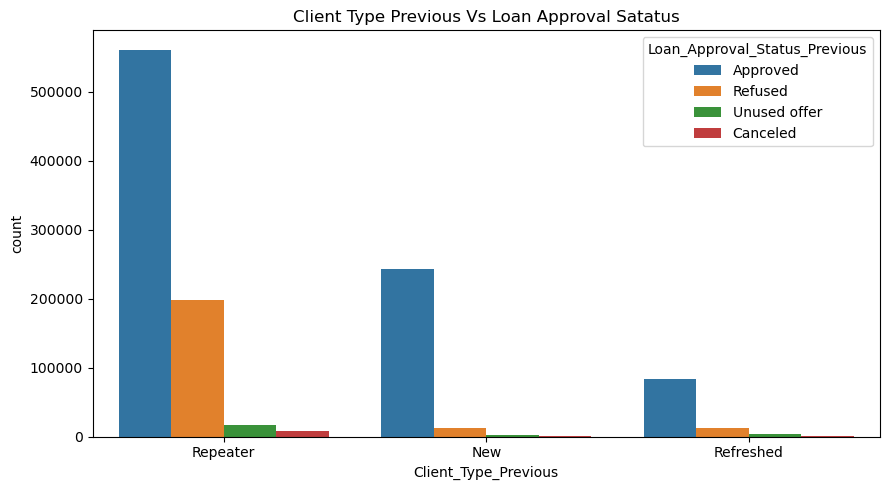

In [318]:
plt.figure(figsize=(9,5))

sns.countplot(x = 'Client_Type_Previous' ,hue = 'Loan_Approval_Status_Previous', data = df_merged )
plt.title('Client Type Previous Vs Loan Approval Satatus')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

**Observations**
  
- Repeaters form the largest group of clients, with the majority of their applications approved, followed by a significant number of refusals. A small fraction falls into the unused offer or canceled categories.

- New clients also have a high approval rate, but the total number of applications is notably lower compared to repeaters. The proportion of refusals is smaller for new clients relative to approvals.

- Refreshed clients (likely those with renewed or restructured loans) have the smallest population. Most of their applications are approved, with refusals, unused offers, and cancellations making up a very small proportion.

- The dominance of Approved status across all client types suggests that prior client relationship (especially repeaters) plays a significant role in loan approval.

- The higher refusal rate among repeaters compared to new or refreshed clients could indicate risk-based rejections due to past repayment performance or other credit factors.

### Relationship between Current loan defaulter status and previous loan application status with respect to Gender

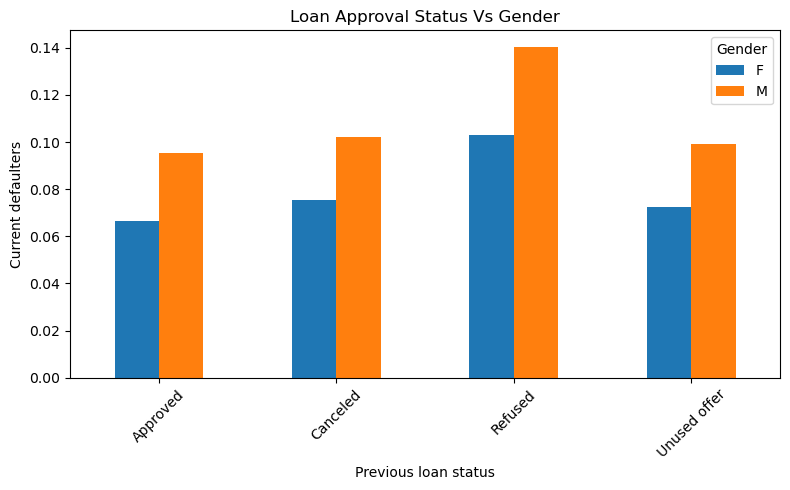

In [319]:
df_merged.pivot_table(values='FLAG_Defalter',index='Loan_Approval_Status_Previous',columns='Gender',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')
plt.title('Loan Approval Status Vs Gender')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

**Observations**
  
- Default rates are higher among males than females across all previous loan status categories.

- For approved loans, male defaulters ~9.6% outnumber female defaulters ~6.7%.

- In the refused category, the default rate is the highest for both genders — around 14% for males and 10.3% for females. This suggests that prior refusal is strongly associated with current default risk, particularly for male borrowers.

- Canceled and Unused offer categories show moderate default rates, with males consistently having a higher percentage than females.

- Overall, the gender gap in default rates is noticeable, and it is most pronounced in the refused category. This pattern could indicate underlying behavioral, economic, or creditworthiness differences between genders.

### Impact of Previous Loan Application Outcomes on Current Default Rates Across Client Types

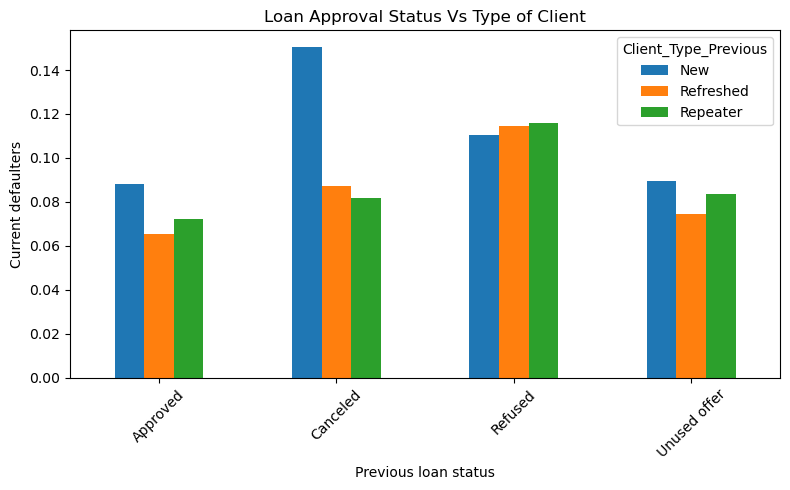

In [320]:
df_merged.pivot_table(values='FLAG_Defalter',index='Loan_Approval_Status_Previous',columns='Client_Type_Previous',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')
plt.title('Loan Approval Status Vs Type of Client')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

**Observations**
  
- New clients show the highest default rates in the Canceled category (~15%), indicating that borrowers without long-standing relationships may face higher financial instability when previous loans are canceled.

- For Approved loans, default rates are relatively low across all client types, but new clients still default more ~ 8.8% compared to refreshed ~ 6.6% and repeater (~7.2%) clients.

- In the Refused category, default rates are consistently high (~11–11.5%) for all client types, suggesting that prior refusal is a strong risk signal regardless of client history.

- The Unused offer category sees moderate default rates, with new clients again topping the group ~9%, followed by repeaters ~8.3% and refreshed clients ~7.5%.

- Overall, new clients consistently have higher default rates across all previous loan status categories, while refreshed clients tend to perform best in terms of repayment reliability.

### Impact of Previous Loan Application Outcomes on Current Default Rates Across Age Groups

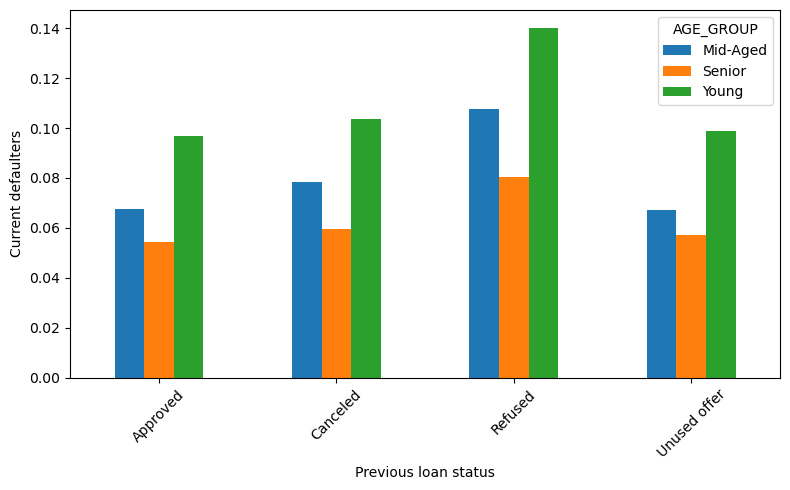

In [321]:
df_merged.pivot_table(values='FLAG_Defalter',index='Loan_Approval_Status_Previous',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

**Observations**
1. Overall Pattern Across Age Groups

- Default rates vary significantly based on both previous loan status and age group.

- Younger clients consistently show higher default rates compared to mid-aged and senior clients, across all loan status categories.

2. By Previous Loan Status

- Refused Loans:

> This group has the highest default rates across all age groups.

> Young borrowers have the highest default rate ~14%, followed by mid-aged ~11% and seniors ~8%.

> Indicates that previous refusal may be a strong predictor of current default risk, especially in younger applicants.

- Canceled Loans:

> Moderate default rates.

> Young borrowers ~10% still lead, followed by mid-aged ~8% and seniors ~6%.

- Approved Loans:

> Even among previously approved clients, young borrowers ~9.7% show a higher default rate compared to mid-aged ~6.8% and seniors ~5.4%.

> Suggests that approval history alone isn’t a guarantee of lower risk, especially for younger borrowers.

- Unused Offers:

> Generally lower default rates than refused or canceled loans.

> Young borrowers ~10% again lead, followed by mid-aged ~6.8% and seniors ~5.7%.

### Impact of Previous Loan Application Outcomes on Current Default Rates Across different income Groups

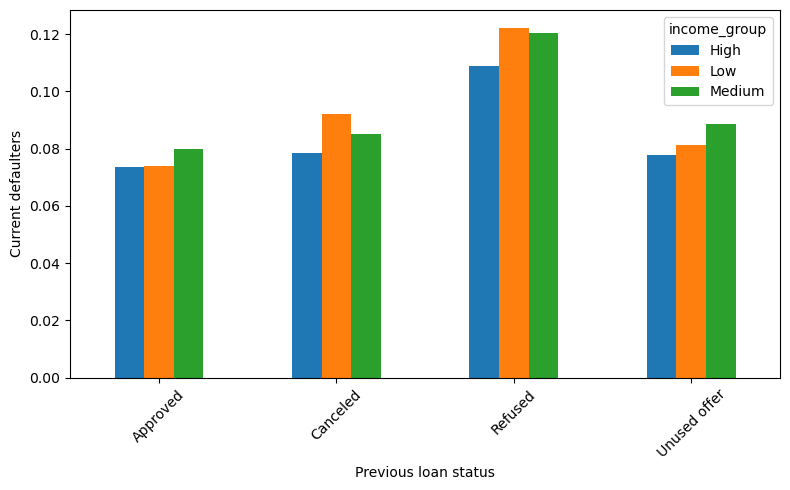

In [322]:
df_merged.pivot_table(values='FLAG_Defalter',index='Loan_Approval_Status_Previous',columns='income_group',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

**Observations**
1. Overall Income Group Impact

- Default rates are relatively close across High, Medium, and Low income groups, but subtle patterns emerge.

- Low income borrowers tend to have slightly higher default rates in most categories, especially for previously refused and canceled loans.

- High income borrowers generally have the lowest or second-lowest default rates, though not drastically different from medium income borrowers.

2. By Previous Loan Status

-  Refused Loans:

> Highest default rates across all income groups.

> Low income group ~12.2% leads, followed by Medium ~12% and High ~11%.

> Suggests that prior refusals are a strong default risk indicator regardless of income, but risk is slightly amplified for lower incomes.

- Canceled Loans:

> Low income borrowers ~9.3% again have the highest defaults, followed by Medium ~8.5% and High ~7.8%.

> Indicates that inability to proceed with previous loans might hint at financial instability, especially in lower income segments.

- Approved Loans:

> Default rates are the lowest here ~7–8%, but Medium income borrowers ~8% surprisingly have slightly higher defaults than Low or High income groups.

> This might indicate mid-income borrowers could be taking on higher risks than they can handle despite being approved.

- Unused Offers:

> Medium income borrowers ~8.9% have the highest defaults, followed by Low ~8.1% and High ~7.8%.

> This may suggest that medium income borrowers who don’t use prior offers still face repayment struggles when they do take loans later.

### Impact of Previous Loan Application Outcomes on Current Default Rates Across different product categories 

In [323]:
df_merged.pivot_table(values='FLAG_Defalter',index='Loan_Approval_Status_Previous',columns='Product_Category_Previous',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')
plt.title('Loan Approval Status Vs Previous Product Category')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

**Observations**
1. Overall Trends

- The previous loan application outcome plays a significant role in influencing the current default rates, but the magnitude of this effect varies notably across product categories.

- Products like Cards and POS loans exhibit higher volatility in default rates depending on previous loan status compared to Cars and Cash loans.

2. By Previous Loan Status

- Approved Loans

> Cards have the highest default rate ~9%, followed by Cash and POS ~7.3–7.5%, with Cars showing the lowest ~5.8%.

> This suggests that borrowers of Cards, even with prior approvals, may be more prone to default than other product types.

- Canceled Loans

> Cards again lead ~13.4%, followed closely by POS loans ~12%.

> Cash ~8% and Cars ~9% remain lower, indicating less impact from past cancellations.

> Canceled loans in Cards and POS categories might be indicative of prior financial instability, making them higher risk in subsequent loans.

- Refused Loans

> Cards ~12.5% and Cash ~12% show the highest default rates, while Cars plummet to the lowest ~3.8%.

> This stark difference suggests that previous refusals in Cards or Cash are stronger warning signs for default risk than in Cars.

- Unused Offers

> Only POS loans appear here ~8.2% default rate, implying that this pattern is product-specific, possibly due to financing structures in POS purchases.

### Impact of Previous Loan Application Outcomes on Current Default Rates for different Client_Normalized_Score_External_Source_group

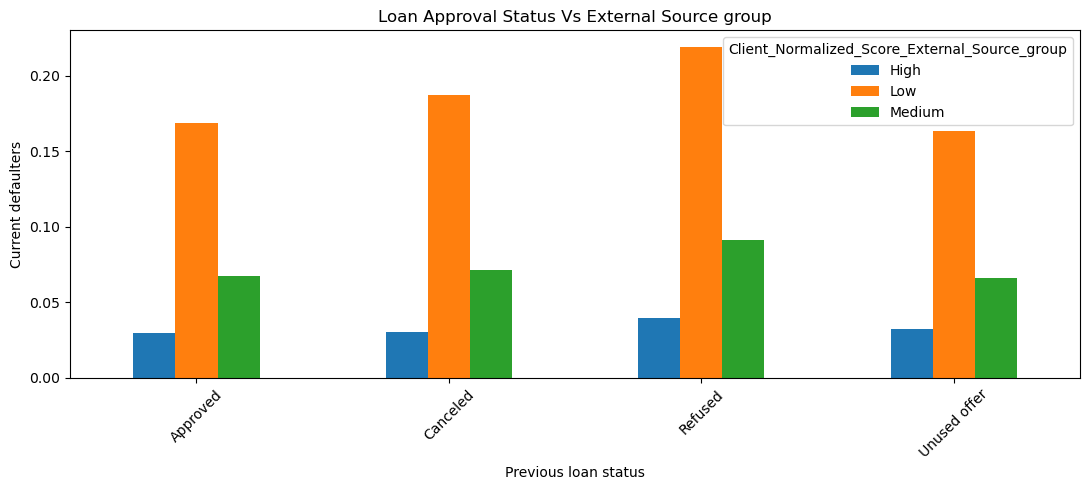

In [325]:
df_merged.pivot_table(values='FLAG_Defalter',index='Loan_Approval_Status_Previous',columns='Client_Normalized_Score_External_Source_group',aggfunc='mean').plot.bar(figsize=(11,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')
plt.title('Loan Approval Status Vs External Source group')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

**Observations**
1. Strong Predictive Power of External Score Group

- Low external score clients have significantly higher default rates across all previous loan outcomes, consistently over 16%, and peaking at ~22% when the previous loan was Refused.

- High score clients show the lowest default rates in all categories, remaining below 4.5%.

- Medium score clients fall in between, generally in the 6–9% range.

2. By Previous Loan Status

- Approved Loans

> Low score clients: ~16.8% default rate.

> Medium score clients: ~6.8%.

> High score clients: ~3%.

> Indicates that even after prior approvals, low-score clients remain high risk.

- Canceled Loans

> Low score clients: ~18.7%, slightly higher than approved loans, indicating possible instability even before full disbursement.

> Medium score clients: ~7.2%.

> High score clients: ~3.1%.

- Refused Loans

> Low score clients: ~22% — the highest across all groups and statuses.

> Medium score clients: ~9%.

> High score clients: ~4%.

> This category is the biggest red flag, as past refusal + low score almost guarantees elevated risk.

- Unused Offers

> Low score clients: ~16.3%, similar to approved category.

> Medium score clients: ~6.6%.

> High score clients: ~3.2%.

> Suggests that even when clients didn’t take up previous offers, their risk remains high if they have low scores.

### Impact of Previous Loan Application Outcomes on Current Default Rates for different Client professions

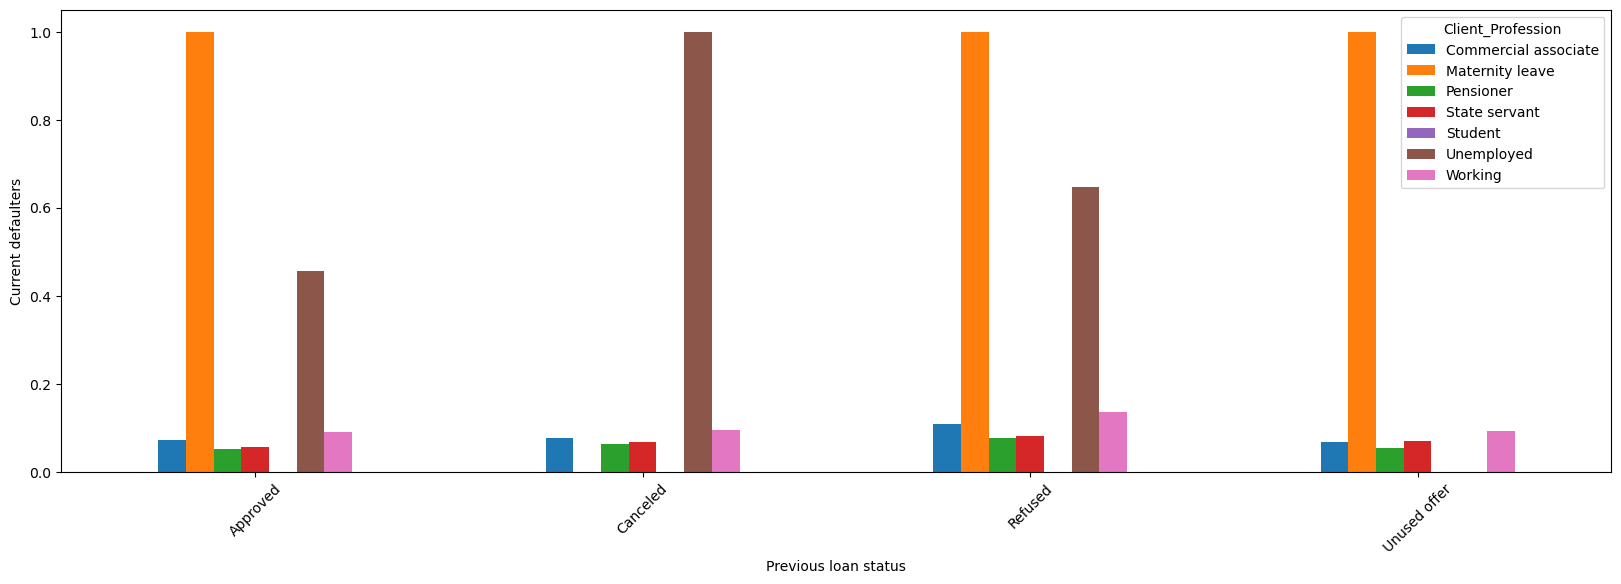

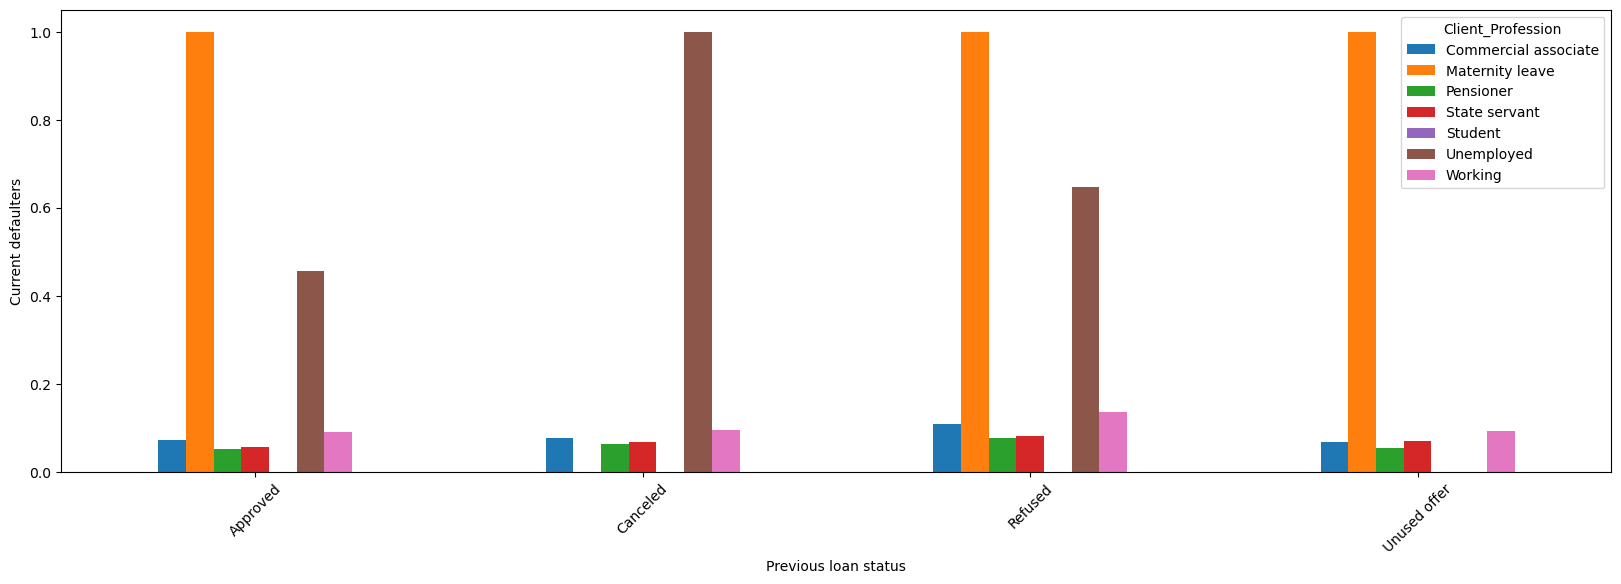

In [327]:
df_merged.pivot_table(values='FLAG_Defalter',index='Loan_Approval_Status_Previous',columns='Client_Profession',aggfunc='mean').plot.bar(figsize=(20,6),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')
plt.show()

**Observations**
1. Exceptionally High Risk in Certain Professions

- Maternity Leave and Unemployed categories show extremely high default rates, in some cases approaching 100% for certain previous loan statuses.

- This suggests a severe repayment capability issue for these groups, regardless of whether their previous loan was approved, canceled, or refused.

2. Breakdown by Previous Loan Status

- Approved Loans

> Maternity leave clients: 100% default rate — implies that approval in this group almost guarantees default.

> Unemployed clients: ~46% default rate, also very high.

> Other professions (Commercial associate, Pensioner, State servant, Working) show relatively low defaults (~5–10%).

- Canceled Loans

> Unemployed clients again show 100% defaults, making them the highest-risk category here.

> All other professions remain below ~11%.

- Refused Loans

> Maternity leave: 100% default rate.

> Unemployed: ~65%.

> Other professions stay in the 7–12% range.

- Unused Offers

> Maternity leave: 100% default rate.

> Unemployed: ~10%.

> Remaining categories stay consistently low (~6–10%).

## FINAL CONCLUSIONS

- **Lending should be prioritized to female borrowers, as they consistently show lower default rates across all previous loan statuses. Loans to males with a history of refusal should be approached with caution due to their significantly higher default risk.**

- **Lending should be prioritized to refreshed and repeater clients, as they show better repayment reliability. New clients, especially those with a history of canceled or refused loans, should be approached cautiously due to their consistently higher default rates.**


- **Loans should be prioritized for senior and mid-aged clients, as they consistently show lower default rates across all previous loan statuses. Young borrowers, particularly those with refused or canceled loan histories, represent a higher risk and should be assessed with stricter eligibility criteria.**

- **Loans should be favored for Cars and Cash loan applicants, as they consistently show lower default rates across all previous loan outcomes. Cards and POS loan borrowers, especially those with prior cancellations or refusals, pose a higher risk and should be subjected to stricter approval checks or offered lower exposure limits.**

- **Loans should be prioritized for high-score clients, as they consistently maintain very low default rates across all previous loan outcomes. Low-score clients, especially those with a history of refusal, represent the highest risk and should be either declined or approved only with strict conditions such as collateral or reduced loan amounts.**

- **Loans should be prioritized for commercial associates, pensioners, state servants, and working professionals, as they show consistently low default rates. Maternity leave and unemployed applicants present extremely high risk, with default rates reaching 100% in some cases, and should generally be avoided unless backed by strong collateral or guarantees.**

- **Loans should be prioritized for high-income borrowers, as they generally maintain the lowest default rates across most categories. 
Low-income borrowers with refused or canceled loan histories and medium-income borrowers with unused or approved loan histories 
show elevated risk and should be evaluated more cautiously before approval.**

- **Loans should be prioritized for businessmen, students, pensioners, state servants, and commercial associates, as they show low to zero default rates. 
Maternity leave and unemployed applicants represent the highest risk, 
while male working professionals also warrant closer scrutiny due to higher default rates compared to their female counterparts.**